# Regression Model in Keras

Building a Regression Model using Keras Library <br>
Classification Model Using dataset from **https://cocl.us/concrete_data** <br> <br>
Our Goal is to build a classification model to predict strength of concrete

# Part A

### Importing Libraries and Dataset

In [57]:
# Imports
import os
import warnings
warnings.filterwarnings('ignore')
import wget
import pandas as pd
import numpy as np
import statistics as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow
print("TensorFlow == ", tensorflow.__version__)
import keras
print("Keras == ", keras.__version__)

# Keras Library imports:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TensorFlow ==  1.15.0


Using TensorFlow backend.


Keras ==  2.2.4


In [3]:
!wget -O ConcreteData.csv https://cocl.us/concrete_data
    
df = pd.read_csv("ConcreteData.csv")
df.head()

--2021-06-08 09:42:30--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 52.116.122.240, 52.116.127.25
Connecting to cocl.us (cocl.us)|52.116.122.240|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2021-06-08 09:42:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘ConcreteData.csv’

ConcreteData.csv    100%[===================>]  57.61K   112KB/s    in 0.5s    

2021-06-08 09:42:36 (112 KB/s) - ‘C

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

### Data Exploration

In [4]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

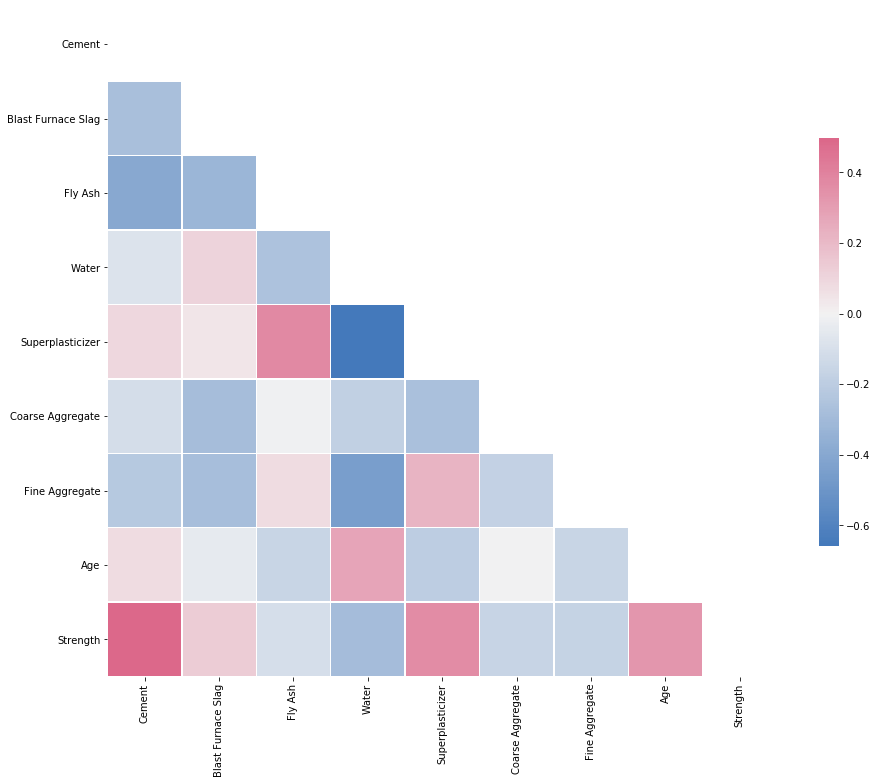

In [6]:
# Heatmap

corr = df.corr()     # Correlation matrix
mask = np.triu(np.ones_like(corr, dtype = bool))      # Generate mask for upper triangle

f, ax = plt.subplots(figsize = (15, 15))      # Matplotlib figure
cmap = sns.diverging_palette(250, 0, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

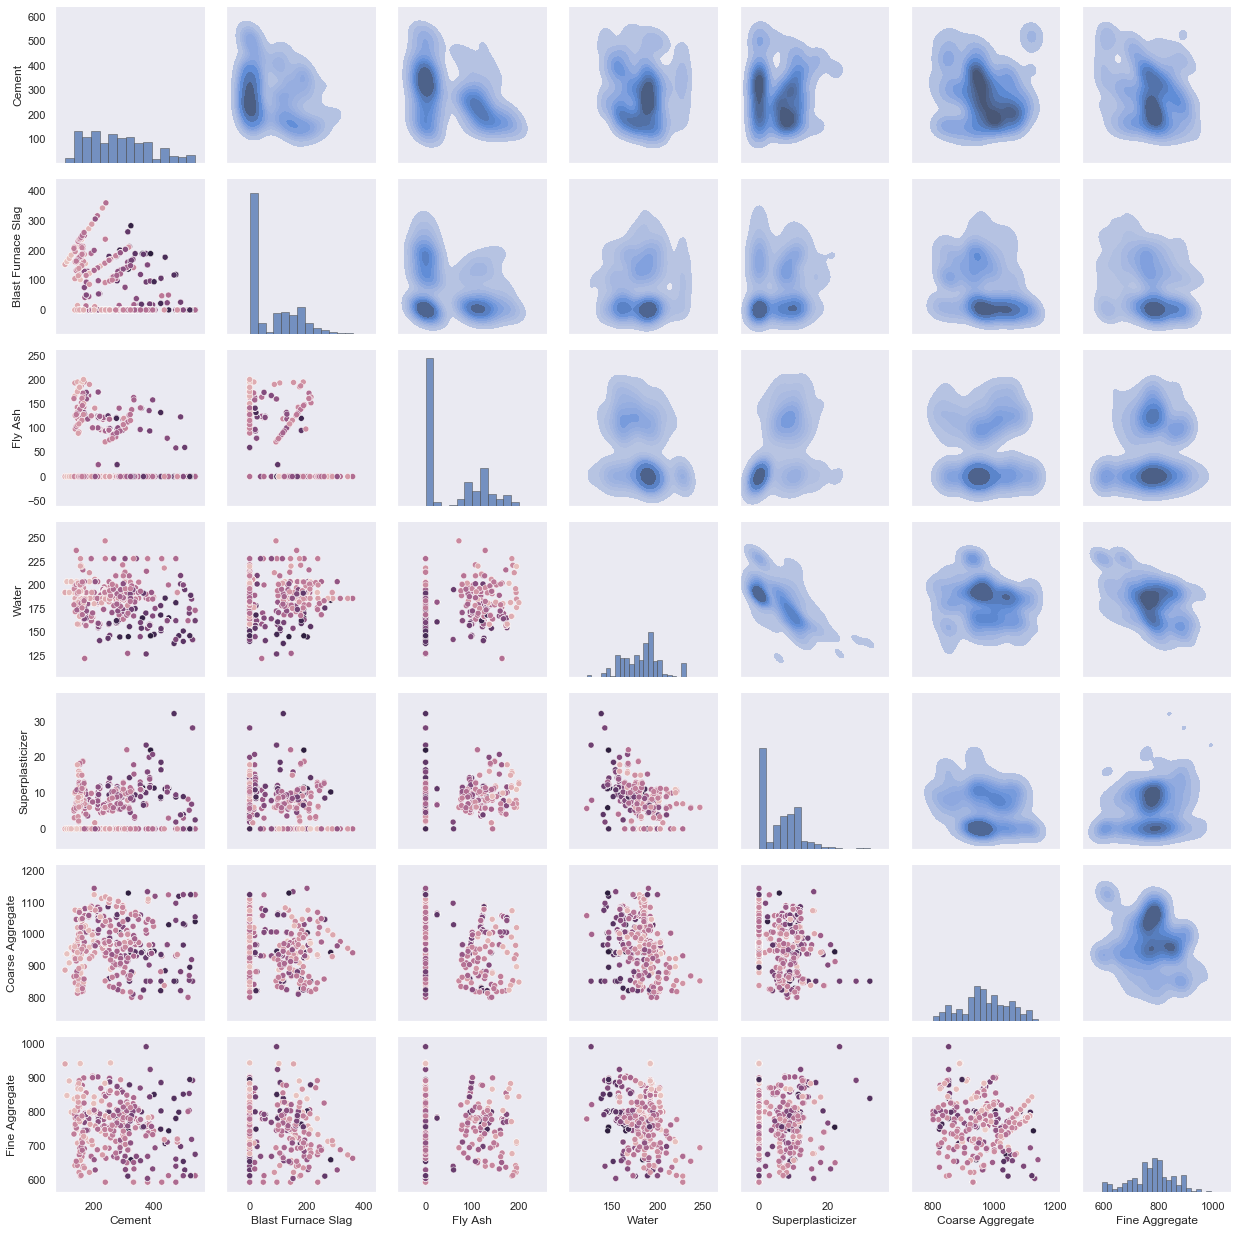

In [63]:
# Numerical Data Distribution

viz = df.drop(['Age', 'Strength'], axis = 1)
sns.set_theme(style = "dark")

g = sns.PairGrid(viz)
g = g.map_diag(sns.histplot, linewidth = .5, edgecolor = ".3", palette = "light:m_r")
g = g.map_lower(sns.scatterplot, hue = df['Strength'])
g = g.map_upper(sns.kdeplot, fill = True, shade_lowest = False)

### Preprocessing

**Train_test_split Dataset**

In [8]:
df_a = df.copy()
y = df_a.Strength.values
x_data = df_a.drop(['Strength'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

print("Size of training set = ", len(y_train))
print("Size of testing set = ", len(y_test))

Size of training set =  721
Size of testing set =  309


### Model Building

**Regression Model Building** <br>
In this model we will implement the entire dataset in a Neural Network to target heart disease. The model contains: <br>
1. Feature vector with 8 units
2. Input layer with 10 nodes
3. 1 hidden layer with 10 nodes
4. 1 output node <br>

The model will use **'relu'** activator; **'adam'** optimizer and **'mean_squared_error'** loss function in 50 epochs.

In [9]:
def regression_model():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])
    
    return model

In [10]:
model = regression_model()

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 50)

Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 0s 308us/sample - loss: 37009.4125 - mean_squared_error: 37009.4141 - val_loss: 22569.5191 - val_mean_squared_error: 22569.5176
Epoch 2/50
504/504 [==============================] - 0s 98us/sample - loss: 14445.7156 - mean_squared_error: 14445.7148 - val_loss: 9748.7392 - val_mean_squared_error: 9748.7383
Epoch 3/50
504/504 [==============================] - 0s 102us/sample - loss: 7511.2292 - mean_squared_error: 7511.2290 - val_loss: 7043.2254 - val_mean_squared_error: 7043.2251
Epoch 4/50
504/504 [==============================] - 0s 91us/sample - loss: 6083.0691 - mean_squared_error: 6083.0684 - val_loss: 6150.2142 - val_mean_squared_error: 6150.2144
Epoch 5/50
504/504 [==============================] - 0s 77us/sample - loss: 5438.5294 - mean_squared_error: 5438.5293 - val_loss: 5559.6303 - val_mean_squared_error: 5559.6309
Epoch 6/50
504/504 [==============================] - 0s 113u

### Model Evaluation

In [11]:
y_pred = model.predict(x_test)

mse_a = mean_squared_error(y_test, y_pred)
print("Mean Square Error = ", mse_a)

Mean Square Error =  234.54349000767542


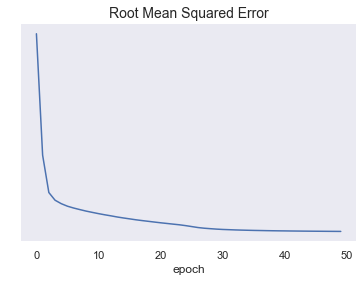

In [18]:
plt.plot(history.history['mean_squared_error'])
sns.despine(left = True, bottom = True)
sns.set_theme(style = "dark")
plt.tick_params(labelleft=False, left=False)
plt.title('Root Mean Squared Error', fontsize = 14)
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.ylabel(' ')
plt.show()

### Model Training

**Train 50 models** <br>
To iterate model training 50 times and to calculate mean $(\mu)$ and standard deviation $(\sigma)$ :
1. Create empty list *mse_list* to store the mse values obtained after every iteration
2. Loop through the model 50 times:
  * Randomly split x_data and y into train test dataset
  * Use train dataset to train model
  * Use test dataset to predict y
  * Calculate mse for each iteration and populate *mse_list*
3. Calculate mean $(\mu)$ and standard deviation $(\sigma)$ from *mse_list*

In [14]:
mse_list_a = []

for i in range(50):
    # Split train-test data
    x_train_a, x_test_a, y_train_a, y_test_A = train_test_split(x_data, y, test_size = 0.3, random_state = 0)
    
    # Train and fit model
    model = regression_model()
    print('\n\n\nTraining Model # ' , i+1 , '\n\n') # Print model number being trained
    model.fit(x_train_a, y_train_a, validation_split = 0.3, epochs = 50)
    print('\n')
    
    # Prediction and evaluation
    y_pred = model.predict(x_test)
    mse_a = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error for Training Model #', i+1 , ' = ', mse_a)
    
    # Append mse to mse_list
    mse_list_a.append(mse_a)




Training Model #  1 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 0s 316us/sample - loss: 30511.4882 - mean_squared_error: 30511.4883 - val_loss: 24556.1020 - val_mean_squared_error: 24556.1016
Epoch 2/50
504/504 [==============================] - 0s 76us/sample - loss: 19104.3869 - mean_squared_error: 19104.3848 - val_loss: 14747.0104 - val_mean_squared_error: 14747.0107
Epoch 3/50
504/504 [==============================] - 0s 89us/sample - loss: 10829.3373 - mean_squared_error: 10829.3369 - val_loss: 7628.3938 - val_mean_squared_error: 7628.3940
Epoch 4/50
504/504 [==============================] - 0s 106us/sample - loss: 5040.7771 - mean_squared_error: 5040.7773 - val_loss: 2999.9360 - val_mean_squared_error: 2999.9360
Epoch 5/50
504/504 [==============================] - 0s 86us/sample - loss: 1661.2110 - mean_squared_error: 1661.2109 - val_loss: 833.4517 - val_mean_squared_error: 833.4517
Epoch 6/50
504/504 [=============

504/504 [==============================] - 0s 116us/sample - loss: 1524.7015 - mean_squared_error: 1524.7015 - val_loss: 1411.1036 - val_mean_squared_error: 1411.1036
Epoch 43/50
504/504 [==============================] - 0s 118us/sample - loss: 1470.6510 - mean_squared_error: 1470.6508 - val_loss: 1360.8510 - val_mean_squared_error: 1360.8511
Epoch 44/50
504/504 [==============================] - 0s 93us/sample - loss: 1420.2728 - mean_squared_error: 1420.2727 - val_loss: 1313.1432 - val_mean_squared_error: 1313.1432
Epoch 45/50
504/504 [==============================] - 0s 77us/sample - loss: 1368.0694 - mean_squared_error: 1368.0693 - val_loss: 1263.9427 - val_mean_squared_error: 1263.9426
Epoch 46/50
504/504 [==============================] - 0s 87us/sample - loss: 1319.7765 - mean_squared_error: 1319.7765 - val_loss: 1218.2517 - val_mean_squared_error: 1218.2517
Epoch 47/50
504/504 [==============================] - 0s 77us/sample - loss: 1275.8169 - mean_squared_error: 1275.8170 

Epoch 38/50
504/504 [==============================] - 0s 94us/sample - loss: 108.6445 - mean_squared_error: 108.6445 - val_loss: 108.2199 - val_mean_squared_error: 108.2199
Epoch 39/50
504/504 [==============================] - 0s 91us/sample - loss: 112.5378 - mean_squared_error: 112.5378 - val_loss: 100.9166 - val_mean_squared_error: 100.9166
Epoch 40/50
504/504 [==============================] - 0s 87us/sample - loss: 108.6316 - mean_squared_error: 108.6316 - val_loss: 101.4243 - val_mean_squared_error: 101.4243
Epoch 41/50
504/504 [==============================] - 0s 104us/sample - loss: 107.6514 - mean_squared_error: 107.6514 - val_loss: 101.4331 - val_mean_squared_error: 101.4331
Epoch 42/50
504/504 [==============================] - 0s 116us/sample - loss: 109.8875 - mean_squared_error: 109.8875 - val_loss: 104.0967 - val_mean_squared_error: 104.0966
Epoch 43/50
504/504 [==============================] - 0s 70us/sample - loss: 106.7083 - mean_squared_error: 106.7083 - val_loss

Epoch 30/50
504/504 [==============================] - 0s 179us/sample - loss: 456.3780 - mean_squared_error: 456.3780 - val_loss: 446.6609 - val_mean_squared_error: 446.6609
Epoch 31/50
504/504 [==============================] - 0s 182us/sample - loss: 451.6160 - mean_squared_error: 451.6160 - val_loss: 442.0531 - val_mean_squared_error: 442.0531
Epoch 32/50
504/504 [==============================] - 0s 124us/sample - loss: 446.1961 - mean_squared_error: 446.1961 - val_loss: 436.4466 - val_mean_squared_error: 436.4466
Epoch 33/50
504/504 [==============================] - 0s 100us/sample - loss: 440.9884 - mean_squared_error: 440.9884 - val_loss: 431.0500 - val_mean_squared_error: 431.0500
Epoch 34/50
504/504 [==============================] - 0s 88us/sample - loss: 435.6100 - mean_squared_error: 435.6100 - val_loss: 426.0557 - val_mean_squared_error: 426.0557
Epoch 35/50
504/504 [==============================] - 0s 101us/sample - loss: 430.5508 - mean_squared_error: 430.5508 - val_l

504/504 [==============================] - 0s 85us/sample - loss: 192.2503 - mean_squared_error: 192.2502 - val_loss: 169.7968 - val_mean_squared_error: 169.7968
Epoch 27/50
504/504 [==============================] - 0s 94us/sample - loss: 187.0118 - mean_squared_error: 187.0118 - val_loss: 166.5975 - val_mean_squared_error: 166.5975
Epoch 28/50
504/504 [==============================] - 0s 91us/sample - loss: 180.9341 - mean_squared_error: 180.9341 - val_loss: 157.1800 - val_mean_squared_error: 157.1800
Epoch 29/50
504/504 [==============================] - 0s 92us/sample - loss: 179.7145 - mean_squared_error: 179.7145 - val_loss: 157.4816 - val_mean_squared_error: 157.4816
Epoch 30/50
504/504 [==============================] - 0s 75us/sample - loss: 170.3769 - mean_squared_error: 170.3769 - val_loss: 151.4402 - val_mean_squared_error: 151.4402
Epoch 31/50
504/504 [==============================] - 0s 85us/sample - loss: 167.5637 - mean_squared_error: 167.5637 - val_loss: 151.4935 - v

504/504 [==============================] - 0s 77us/sample - loss: 589.8422 - mean_squared_error: 589.8423 - val_loss: 610.5406 - val_mean_squared_error: 610.5405
Epoch 19/50
504/504 [==============================] - 0s 165us/sample - loss: 563.2391 - mean_squared_error: 563.2391 - val_loss: 574.9668 - val_mean_squared_error: 574.9668
Epoch 20/50
504/504 [==============================] - 0s 136us/sample - loss: 536.4968 - mean_squared_error: 536.4967 - val_loss: 556.2703 - val_mean_squared_error: 556.2703
Epoch 21/50
504/504 [==============================] - 0s 164us/sample - loss: 511.5148 - mean_squared_error: 511.5148 - val_loss: 529.2194 - val_mean_squared_error: 529.2195
Epoch 22/50
504/504 [==============================] - 0s 114us/sample - loss: 491.3758 - mean_squared_error: 491.3758 - val_loss: 510.2258 - val_mean_squared_error: 510.2258
Epoch 23/50
504/504 [==============================] - 0s 80us/sample - loss: 472.7209 - mean_squared_error: 472.7209 - val_loss: 491.6920

Epoch 14/50
504/504 [==============================] - 0s 116us/sample - loss: 11033.8887 - mean_squared_error: 11033.8877 - val_loss: 10467.0806 - val_mean_squared_error: 10467.0811
Epoch 15/50
504/504 [==============================] - 0s 98us/sample - loss: 10097.7802 - mean_squared_error: 10097.7803 - val_loss: 9569.4462 - val_mean_squared_error: 9569.4463
Epoch 16/50
504/504 [==============================] - 0s 114us/sample - loss: 9232.1403 - mean_squared_error: 9232.1406 - val_loss: 8876.6269 - val_mean_squared_error: 8876.6270
Epoch 17/50
504/504 [==============================] - 0s 166us/sample - loss: 8475.5846 - mean_squared_error: 8475.5840 - val_loss: 8194.4121 - val_mean_squared_error: 8194.4121
Epoch 18/50
504/504 [==============================] - 0s 134us/sample - loss: 7800.0470 - mean_squared_error: 7800.0474 - val_loss: 7581.9788 - val_mean_squared_error: 7581.9785
Epoch 19/50
504/504 [==============================] - 0s 129us/sample - loss: 7191.8866 - mean_squa

504/504 [==============================] - 0s 161us/sample - loss: 3427.7938 - mean_squared_error: 3427.7942 - val_loss: 2991.0128 - val_mean_squared_error: 2991.0129
Epoch 10/50
504/504 [==============================] - 0s 173us/sample - loss: 3161.4489 - mean_squared_error: 3161.4490 - val_loss: 2764.4754 - val_mean_squared_error: 2764.4756
Epoch 11/50
504/504 [==============================] - 0s 164us/sample - loss: 2926.5691 - mean_squared_error: 2926.5688 - val_loss: 2549.9335 - val_mean_squared_error: 2549.9333
Epoch 12/50
504/504 [==============================] - 0s 96us/sample - loss: 2706.5897 - mean_squared_error: 2706.5898 - val_loss: 2361.2545 - val_mean_squared_error: 2361.2544
Epoch 13/50
504/504 [==============================] - 0s 86us/sample - loss: 2495.4989 - mean_squared_error: 2495.4990 - val_loss: 2184.7275 - val_mean_squared_error: 2184.7275
Epoch 14/50
504/504 [==============================] - 0s 99us/sample - loss: 2309.7361 - mean_squared_error: 2309.7361

Epoch 5/50
504/504 [==============================] - 0s 196us/sample - loss: 16427.6557 - mean_squared_error: 16427.6562 - val_loss: 10182.7725 - val_mean_squared_error: 10182.7734
Epoch 6/50
504/504 [==============================] - 0s 150us/sample - loss: 7707.3192 - mean_squared_error: 7707.3193 - val_loss: 6428.3457 - val_mean_squared_error: 6428.3457
Epoch 7/50
504/504 [==============================] - 0s 160us/sample - loss: 5791.3010 - mean_squared_error: 5791.3008 - val_loss: 5793.2106 - val_mean_squared_error: 5793.2109
Epoch 8/50
504/504 [==============================] - 0s 94us/sample - loss: 5474.7705 - mean_squared_error: 5474.7705 - val_loss: 5562.2294 - val_mean_squared_error: 5562.2300
Epoch 9/50
504/504 [==============================] - 0s 91us/sample - loss: 5276.8840 - mean_squared_error: 5276.8838 - val_loss: 5328.6292 - val_mean_squared_error: 5328.6289
Epoch 10/50
504/504 [==============================] - 0s 187us/sample - loss: 5055.2736 - mean_squared_erro

Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 1s 1ms/sample - loss: 11089.0616 - mean_squared_error: 11089.0615 - val_loss: 9733.9623 - val_mean_squared_error: 9733.9619
Epoch 2/50
504/504 [==============================] - 0s 137us/sample - loss: 8187.9206 - mean_squared_error: 8187.9199 - val_loss: 7168.4536 - val_mean_squared_error: 7168.4541
Epoch 3/50
504/504 [==============================] - 0s 124us/sample - loss: 5907.1588 - mean_squared_error: 5907.1582 - val_loss: 4989.6448 - val_mean_squared_error: 4989.6450
Epoch 4/50
504/504 [==============================] - 0s 84us/sample - loss: 3871.3564 - mean_squared_error: 3871.3562 - val_loss: 3013.8278 - val_mean_squared_error: 3013.8279
Epoch 5/50
504/504 [==============================] - 0s 106us/sample - loss: 2138.3630 - mean_squared_error: 2138.3630 - val_loss: 1504.3239 - val_mean_squared_error: 1504.3239
Epoch 6/50
504/504 [==============================] - 0s 137us/sa

504/504 [==============================] - 0s 89us/sample - loss: 342.6819 - mean_squared_error: 342.6819 - val_loss: 276.5318 - val_mean_squared_error: 276.5318
Epoch 43/50
504/504 [==============================] - 0s 96us/sample - loss: 339.2058 - mean_squared_error: 339.2057 - val_loss: 272.8670 - val_mean_squared_error: 272.8670
Epoch 44/50
504/504 [==============================] - 0s 81us/sample - loss: 335.4415 - mean_squared_error: 335.4416 - val_loss: 270.3687 - val_mean_squared_error: 270.3687
Epoch 45/50
504/504 [==============================] - 0s 105us/sample - loss: 331.7651 - mean_squared_error: 331.7651 - val_loss: 268.6614 - val_mean_squared_error: 268.6614
Epoch 46/50
504/504 [==============================] - 0s 100us/sample - loss: 328.4206 - mean_squared_error: 328.4205 - val_loss: 265.7683 - val_mean_squared_error: 265.7683
Epoch 47/50
504/504 [==============================] - 0s 97us/sample - loss: 324.7591 - mean_squared_error: 324.7591 - val_loss: 263.3630 -

Epoch 33/50
504/504 [==============================] - 0s 148us/sample - loss: 448.4687 - mean_squared_error: 448.4686 - val_loss: 419.3907 - val_mean_squared_error: 419.3907
Epoch 34/50
504/504 [==============================] - 0s 97us/sample - loss: 430.1946 - mean_squared_error: 430.1946 - val_loss: 403.2764 - val_mean_squared_error: 403.2764
Epoch 35/50
504/504 [==============================] - 0s 85us/sample - loss: 413.1656 - mean_squared_error: 413.1656 - val_loss: 389.7383 - val_mean_squared_error: 389.7383
Epoch 36/50
504/504 [==============================] - 0s 85us/sample - loss: 397.9019 - mean_squared_error: 397.9019 - val_loss: 375.4929 - val_mean_squared_error: 375.4929
Epoch 37/50
504/504 [==============================] - 0s 107us/sample - loss: 383.6816 - mean_squared_error: 383.6815 - val_loss: 362.4690 - val_mean_squared_error: 362.4690
Epoch 38/50
504/504 [==============================] - 0s 170us/sample - loss: 370.9264 - mean_squared_error: 370.9265 - val_los

504/504 [==============================] - 0s 165us/sample - loss: 1065.6062 - mean_squared_error: 1065.6063 - val_loss: 963.9023 - val_mean_squared_error: 963.9023
Epoch 24/50
504/504 [==============================] - 0s 159us/sample - loss: 1054.8798 - mean_squared_error: 1054.8798 - val_loss: 954.0157 - val_mean_squared_error: 954.0157
Epoch 25/50
504/504 [==============================] - 0s 174us/sample - loss: 1044.6619 - mean_squared_error: 1044.6619 - val_loss: 943.3878 - val_mean_squared_error: 943.3878
Epoch 26/50
504/504 [==============================] - 0s 138us/sample - loss: 1032.3059 - mean_squared_error: 1032.3060 - val_loss: 933.2076 - val_mean_squared_error: 933.2076
Epoch 27/50
504/504 [==============================] - 0s 157us/sample - loss: 1022.0008 - mean_squared_error: 1022.0008 - val_loss: 923.3748 - val_mean_squared_error: 923.3748
Epoch 28/50
504/504 [==============================] - 0s 104us/sample - loss: 1010.8196 - mean_squared_error: 1010.8197 - val_

Epoch 19/50
504/504 [==============================] - 0s 100us/sample - loss: 981.4151 - mean_squared_error: 981.4152 - val_loss: 889.8098 - val_mean_squared_error: 889.8098
Epoch 20/50
504/504 [==============================] - 0s 89us/sample - loss: 921.1226 - mean_squared_error: 921.1226 - val_loss: 837.5689 - val_mean_squared_error: 837.5688
Epoch 21/50
504/504 [==============================] - 0s 89us/sample - loss: 865.3257 - mean_squared_error: 865.3256 - val_loss: 788.1433 - val_mean_squared_error: 788.1432
Epoch 22/50
504/504 [==============================] - 0s 101us/sample - loss: 817.6224 - mean_squared_error: 817.6224 - val_loss: 746.0403 - val_mean_squared_error: 746.0403
Epoch 23/50
504/504 [==============================] - 0s 136us/sample - loss: 764.5565 - mean_squared_error: 764.5564 - val_loss: 695.8620 - val_mean_squared_error: 695.8621
Epoch 24/50
504/504 [==============================] - 0s 145us/sample - loss: 719.9094 - mean_squared_error: 719.9095 - val_lo

Epoch 15/50
504/504 [==============================] - 0s 130us/sample - loss: 627.4195 - mean_squared_error: 627.4194 - val_loss: 550.6100 - val_mean_squared_error: 550.6100
Epoch 16/50
504/504 [==============================] - 0s 177us/sample - loss: 567.1250 - mean_squared_error: 567.1250 - val_loss: 496.9396 - val_mean_squared_error: 496.9396
Epoch 17/50
504/504 [==============================] - 0s 162us/sample - loss: 513.6161 - mean_squared_error: 513.6161 - val_loss: 444.0462 - val_mean_squared_error: 444.0462
Epoch 18/50
504/504 [==============================] - 0s 128us/sample - loss: 463.6402 - mean_squared_error: 463.6402 - val_loss: 403.1417 - val_mean_squared_error: 403.1417
Epoch 19/50
504/504 [==============================] - 0s 147us/sample - loss: 422.5054 - mean_squared_error: 422.5054 - val_loss: 372.5714 - val_mean_squared_error: 372.5714
Epoch 20/50
504/504 [==============================] - ETA: 0s - loss: 421.3584 - mean_squared_error: 421.35 - 0s 96us/sample

Epoch 6/50
504/504 [==============================] - 0s 99us/sample - loss: 3305.9757 - mean_squared_error: 3305.9756 - val_loss: 3194.8063 - val_mean_squared_error: 3194.8064
Epoch 7/50
504/504 [==============================] - 0s 94us/sample - loss: 3190.7787 - mean_squared_error: 3190.7788 - val_loss: 3060.2858 - val_mean_squared_error: 3060.2859
Epoch 8/50
504/504 [==============================] - 0s 93us/sample - loss: 3055.9957 - mean_squared_error: 3055.9956 - val_loss: 2943.8538 - val_mean_squared_error: 2943.8540
Epoch 9/50
504/504 [==============================] - 0s 94us/sample - loss: 2929.1403 - mean_squared_error: 2929.1401 - val_loss: 2828.2062 - val_mean_squared_error: 2828.2063
Epoch 10/50
504/504 [==============================] - 0s 115us/sample - loss: 2815.2647 - mean_squared_error: 2815.2646 - val_loss: 2715.7941 - val_mean_squared_error: 2715.7944
Epoch 11/50
504/504 [==============================] - 0s 91us/sample - loss: 2705.9081 - mean_squared_error: 270

504/504 [==============================] - 0s 97us/sample - loss: 118.7365 - mean_squared_error: 118.7365 - val_loss: 114.0479 - val_mean_squared_error: 114.0479
Epoch 49/50
504/504 [==============================] - 0s 97us/sample - loss: 117.0956 - mean_squared_error: 117.0956 - val_loss: 111.4028 - val_mean_squared_error: 111.4028
Epoch 50/50
504/504 [==============================] - 0s 89us/sample - loss: 115.7478 - mean_squared_error: 115.7478 - val_loss: 111.6756 - val_mean_squared_error: 111.6756


Mean Squared Error for Training Model # 22  =  100.63006097473706



Training Model #  23 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 1s 1ms/sample - loss: 44721.8899 - mean_squared_error: 44721.8984 - val_loss: 29966.2878 - val_mean_squared_error: 29966.2871
Epoch 2/50
504/504 [==============================] - 0s 114us/sample - loss: 20188.0160 - mean_squared_error: 20188.0156 - val_loss: 12414.3640 - val_mean_squared_error

Epoch 44/50
504/504 [==============================] - 0s 101us/sample - loss: 423.1257 - mean_squared_error: 423.1256 - val_loss: 423.5143 - val_mean_squared_error: 423.5143
Epoch 45/50
504/504 [==============================] - 0s 90us/sample - loss: 412.8674 - mean_squared_error: 412.8674 - val_loss: 414.1105 - val_mean_squared_error: 414.1105
Epoch 46/50
504/504 [==============================] - 0s 108us/sample - loss: 402.2085 - mean_squared_error: 402.2085 - val_loss: 405.1956 - val_mean_squared_error: 405.1956
Epoch 47/50
504/504 [==============================] - 0s 101us/sample - loss: 394.1413 - mean_squared_error: 394.1413 - val_loss: 397.4157 - val_mean_squared_error: 397.4157
Epoch 48/50
504/504 [==============================] - 0s 94us/sample - loss: 383.8675 - mean_squared_error: 383.8675 - val_loss: 387.6368 - val_mean_squared_error: 387.6368
Epoch 49/50
504/504 [==============================] - 0s 92us/sample - loss: 375.8191 - mean_squared_error: 375.8191 - val_los

504/504 [==============================] - 0s 122us/sample - loss: 194.1735 - mean_squared_error: 194.1735 - val_loss: 165.8206 - val_mean_squared_error: 165.8206
Epoch 36/50
504/504 [==============================] - 0s 127us/sample - loss: 190.1989 - mean_squared_error: 190.1989 - val_loss: 164.7823 - val_mean_squared_error: 164.7823
Epoch 37/50
504/504 [==============================] - 0s 127us/sample - loss: 183.7313 - mean_squared_error: 183.7313 - val_loss: 160.1496 - val_mean_squared_error: 160.1496
Epoch 38/50
504/504 [==============================] - 0s 132us/sample - loss: 182.8049 - mean_squared_error: 182.8049 - val_loss: 163.9550 - val_mean_squared_error: 163.9550
Epoch 39/50
504/504 [==============================] - 0s 120us/sample - loss: 180.9602 - mean_squared_error: 180.9602 - val_loss: 150.0936 - val_mean_squared_error: 150.0936
Epoch 40/50
504/504 [==============================] - 0s 129us/sample - loss: 173.8967 - mean_squared_error: 173.8967 - val_loss: 147.00

504/504 [==============================] - 0s 102us/sample - loss: 2647.9691 - mean_squared_error: 2647.9692 - val_loss: 2381.2767 - val_mean_squared_error: 2381.2766
Epoch 26/50
504/504 [==============================] - 0s 98us/sample - loss: 2427.0311 - mean_squared_error: 2427.0312 - val_loss: 2198.2137 - val_mean_squared_error: 2198.2136
Epoch 27/50
504/504 [==============================] - 0s 91us/sample - loss: 2226.5293 - mean_squared_error: 2226.5295 - val_loss: 2011.2494 - val_mean_squared_error: 2011.2493
Epoch 28/50
504/504 [==============================] - 0s 94us/sample - loss: 2052.1176 - mean_squared_error: 2052.1177 - val_loss: 1862.9244 - val_mean_squared_error: 1862.9242
Epoch 29/50
504/504 [==============================] - 0s 118us/sample - loss: 1895.8073 - mean_squared_error: 1895.8074 - val_loss: 1730.6054 - val_mean_squared_error: 1730.6055
Epoch 30/50
504/504 [==============================] - 0s 123us/sample - loss: 1745.9832 - mean_squared_error: 1745.9833

504/504 [==============================] - 0s 230us/sample - loss: 305.6841 - mean_squared_error: 305.6841 - val_loss: 238.2385 - val_mean_squared_error: 238.2385
Epoch 16/50
504/504 [==============================] - 0s 119us/sample - loss: 293.2563 - mean_squared_error: 293.2563 - val_loss: 233.4156 - val_mean_squared_error: 233.4156
Epoch 17/50
504/504 [==============================] - 0s 99us/sample - loss: 279.5284 - mean_squared_error: 279.5284 - val_loss: 220.6417 - val_mean_squared_error: 220.6418
Epoch 18/50
504/504 [==============================] - 0s 96us/sample - loss: 266.1521 - mean_squared_error: 266.1521 - val_loss: 215.1046 - val_mean_squared_error: 215.1046
Epoch 19/50
504/504 [==============================] - 0s 109us/sample - loss: 257.1331 - mean_squared_error: 257.1331 - val_loss: 206.1806 - val_mean_squared_error: 206.1806
Epoch 20/50
504/504 [==============================] - 0s 257us/sample - loss: 247.8288 - mean_squared_error: 247.8288 - val_loss: 202.7837

504/504 [==============================] - 0s 114us/sample - loss: 2159.2685 - mean_squared_error: 2159.2683 - val_loss: 2082.9163 - val_mean_squared_error: 2082.9163
Epoch 8/50
504/504 [==============================] - 0s 124us/sample - loss: 1965.2952 - mean_squared_error: 1965.2952 - val_loss: 1878.2437 - val_mean_squared_error: 1878.2437
Epoch 9/50
504/504 [==============================] - 0s 98us/sample - loss: 1791.7995 - mean_squared_error: 1791.7994 - val_loss: 1710.6886 - val_mean_squared_error: 1710.6886
Epoch 10/50
504/504 [==============================] - 0s 101us/sample - loss: 1628.7328 - mean_squared_error: 1628.7329 - val_loss: 1565.8628 - val_mean_squared_error: 1565.8628
Epoch 11/50
504/504 [==============================] - 0s 122us/sample - loss: 1491.3549 - mean_squared_error: 1491.3550 - val_loss: 1418.4923 - val_mean_squared_error: 1418.4923
Epoch 12/50
504/504 [==============================] - 0s 121us/sample - loss: 1364.7313 - mean_squared_error: 1364.7313

Epoch 3/50
504/504 [==============================] - 0s 107us/sample - loss: 6093.0751 - mean_squared_error: 6093.0747 - val_loss: 4121.6087 - val_mean_squared_error: 4121.6089
Epoch 4/50
504/504 [==============================] - 0s 104us/sample - loss: 3801.2011 - mean_squared_error: 3801.2014 - val_loss: 4051.4303 - val_mean_squared_error: 4051.4304
Epoch 5/50
504/504 [==============================] - 0s 226us/sample - loss: 3701.9754 - mean_squared_error: 3701.9756 - val_loss: 3904.2152 - val_mean_squared_error: 3904.2153
Epoch 6/50
504/504 [==============================] - 0s 214us/sample - loss: 3518.5072 - mean_squared_error: 3518.5073 - val_loss: 3686.2184 - val_mean_squared_error: 3686.2185
Epoch 7/50
504/504 [==============================] - 0s 210us/sample - loss: 3368.8257 - mean_squared_error: 3368.8257 - val_loss: 3528.0825 - val_mean_squared_error: 3528.0828
Epoch 8/50
504/504 [==============================] - 0s 160us/sample - loss: 3249.3144 - mean_squared_error: 

Epoch 49/50
504/504 [==============================] - 0s 98us/sample - loss: 765.3401 - mean_squared_error: 765.3401 - val_loss: 841.6882 - val_mean_squared_error: 841.6882
Epoch 50/50
504/504 [==============================] - 0s 94us/sample - loss: 754.1546 - mean_squared_error: 754.1547 - val_loss: 828.0217 - val_mean_squared_error: 828.0217


Mean Squared Error for Training Model # 32  =  744.5456114328153



Training Model #  33 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 1s 2ms/sample - loss: 101670.5217 - mean_squared_error: 101670.5156 - val_loss: 65489.5455 - val_mean_squared_error: 65489.5469
Epoch 2/50
504/504 [==============================] - 0s 128us/sample - loss: 45041.4730 - mean_squared_error: 45041.4727 - val_loss: 24163.6135 - val_mean_squared_error: 24163.6133
Epoch 3/50
504/504 [==============================] - 0s 133us/sample - loss: 15121.9842 - mean_squared_error: 15121.9834 - val_loss: 6759.6205 - va

504/504 [==============================] - 0s 174us/sample - loss: 281.3024 - mean_squared_error: 281.3024 - val_loss: 232.6771 - val_mean_squared_error: 232.6771
Epoch 41/50
504/504 [==============================] - 0s 196us/sample - loss: 274.9296 - mean_squared_error: 274.9296 - val_loss: 238.5405 - val_mean_squared_error: 238.5405
Epoch 42/50
504/504 [==============================] - 0s 208us/sample - loss: 268.6224 - mean_squared_error: 268.6224 - val_loss: 223.2333 - val_mean_squared_error: 223.2333
Epoch 43/50
504/504 [==============================] - 0s 190us/sample - loss: 259.9646 - mean_squared_error: 259.9646 - val_loss: 223.9212 - val_mean_squared_error: 223.9212
Epoch 44/50
504/504 [==============================] - 0s 218us/sample - loss: 255.0327 - mean_squared_error: 255.0326 - val_loss: 216.0374 - val_mean_squared_error: 216.0374
Epoch 45/50
504/504 [==============================] - 0s 233us/sample - loss: 250.7055 - mean_squared_error: 250.7055 - val_loss: 215.79

Epoch 31/50
504/504 [==============================] - 0s 123us/sample - loss: 128.8360 - mean_squared_error: 128.8360 - val_loss: 123.1918 - val_mean_squared_error: 123.1918
Epoch 32/50
504/504 [==============================] - 0s 116us/sample - loss: 122.2980 - mean_squared_error: 122.2980 - val_loss: 123.4084 - val_mean_squared_error: 123.4084
Epoch 33/50
504/504 [==============================] - 0s 126us/sample - loss: 123.0464 - mean_squared_error: 123.0464 - val_loss: 121.8875 - val_mean_squared_error: 121.8875
Epoch 34/50
504/504 [==============================] - 0s 153us/sample - loss: 120.0724 - mean_squared_error: 120.0724 - val_loss: 117.6714 - val_mean_squared_error: 117.6714
Epoch 35/50
504/504 [==============================] - 0s 208us/sample - loss: 118.4506 - mean_squared_error: 118.4506 - val_loss: 116.1178 - val_mean_squared_error: 116.1178
Epoch 36/50
504/504 [==============================] - 0s 158us/sample - loss: 117.4227 - mean_squared_error: 117.4227 - val_

Epoch 27/50
504/504 [==============================] - 0s 222us/sample - loss: 381.8327 - mean_squared_error: 381.8326 - val_loss: 407.9800 - val_mean_squared_error: 407.9799
Epoch 28/50
504/504 [==============================] - 0s 213us/sample - loss: 366.7179 - mean_squared_error: 366.7180 - val_loss: 396.1706 - val_mean_squared_error: 396.1706
Epoch 29/50
504/504 [==============================] - 0s 124us/sample - loss: 354.1020 - mean_squared_error: 354.1020 - val_loss: 378.4032 - val_mean_squared_error: 378.4033
Epoch 30/50
504/504 [==============================] - 0s 130us/sample - loss: 339.4705 - mean_squared_error: 339.4705 - val_loss: 363.0798 - val_mean_squared_error: 363.0798
Epoch 31/50
504/504 [==============================] - 0s 118us/sample - loss: 326.3189 - mean_squared_error: 326.3189 - val_loss: 355.0226 - val_mean_squared_error: 355.0226
Epoch 32/50
504/504 [==============================] - 0s 242us/sample - loss: 314.0163 - mean_squared_error: 314.0163 - val_

504/504 [==============================] - 0s 230us/sample - loss: 164.3558 - mean_squared_error: 164.3558 - val_loss: 144.2546 - val_mean_squared_error: 144.2546
Epoch 24/50
504/504 [==============================] - 0s 139us/sample - loss: 157.6606 - mean_squared_error: 157.6606 - val_loss: 141.8471 - val_mean_squared_error: 141.8471
Epoch 25/50
504/504 [==============================] - 0s 226us/sample - loss: 151.1451 - mean_squared_error: 151.1451 - val_loss: 137.4566 - val_mean_squared_error: 137.4566
Epoch 26/50
504/504 [==============================] - 0s 233us/sample - loss: 150.3582 - mean_squared_error: 150.3582 - val_loss: 132.4679 - val_mean_squared_error: 132.4679
Epoch 27/50
504/504 [==============================] - 0s 210us/sample - loss: 146.6518 - mean_squared_error: 146.6518 - val_loss: 130.3572 - val_mean_squared_error: 130.3572
Epoch 28/50
504/504 [==============================] - 0s 121us/sample - loss: 145.2074 - mean_squared_error: 145.2073 - val_loss: 134.01

504/504 [==============================] - 0s 127us/sample - loss: 13335.6169 - mean_squared_error: 13335.6152 - val_loss: 11865.7432 - val_mean_squared_error: 11865.7432
Epoch 14/50
504/504 [==============================] - 0s 124us/sample - loss: 12559.1656 - mean_squared_error: 12559.1660 - val_loss: 11327.4356 - val_mean_squared_error: 11327.4365
Epoch 15/50
504/504 [==============================] - 0s 123us/sample - loss: 12060.2299 - mean_squared_error: 12060.2314 - val_loss: 10896.7877 - val_mean_squared_error: 10896.7881
Epoch 16/50
504/504 [==============================] - 0s 119us/sample - loss: 11619.4810 - mean_squared_error: 11619.4814 - val_loss: 10491.3621 - val_mean_squared_error: 10491.3613
Epoch 17/50
504/504 [==============================] - 0s 122us/sample - loss: 11208.9938 - mean_squared_error: 11208.9951 - val_loss: 10074.8041 - val_mean_squared_error: 10074.8037
Epoch 18/50
504/504 [==============================] - 0s 127us/sample - loss: 10793.9996 - mean_

Epoch 8/50
504/504 [==============================] - 0s 126us/sample - loss: 2400.9799 - mean_squared_error: 2400.9800 - val_loss: 2283.4562 - val_mean_squared_error: 2283.4563
Epoch 9/50
504/504 [==============================] - 0s 125us/sample - loss: 2334.0982 - mean_squared_error: 2334.0979 - val_loss: 2217.9808 - val_mean_squared_error: 2217.9810
Epoch 10/50
504/504 [==============================] - 0s 125us/sample - loss: 2267.3651 - mean_squared_error: 2267.3650 - val_loss: 2152.6803 - val_mean_squared_error: 2152.6802
Epoch 11/50
504/504 [==============================] - 0s 125us/sample - loss: 2202.2913 - mean_squared_error: 2202.2915 - val_loss: 2085.4300 - val_mean_squared_error: 2085.4299
Epoch 12/50
504/504 [==============================] - 0s 122us/sample - loss: 2135.4301 - mean_squared_error: 2135.4302 - val_loss: 2019.9278 - val_mean_squared_error: 2019.9277
Epoch 13/50
504/504 [==============================] - 0s 139us/sample - loss: 2069.0405 - mean_squared_err

504/504 [==============================] - 0s 126us/sample - loss: 572.3673 - mean_squared_error: 572.3673 - val_loss: 482.8299 - val_mean_squared_error: 482.8299
Epoch 50/50
504/504 [==============================] - 0s 127us/sample - loss: 558.9230 - mean_squared_error: 558.9230 - val_loss: 468.7958 - val_mean_squared_error: 468.7958


Mean Squared Error for Training Model # 42  =  505.61759532590133



Training Model #  43 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 1s 2ms/sample - loss: 146757.7799 - mean_squared_error: 146757.7812 - val_loss: 91416.5565 - val_mean_squared_error: 91416.5625
Epoch 2/50
504/504 [==============================] - 0s 91us/sample - loss: 62611.0541 - mean_squared_error: 62611.0508 - val_loss: 33403.5803 - val_mean_squared_error: 33403.5820
Epoch 3/50
504/504 [==============================] - 0s 96us/sample - loss: 21351.5816 - mean_squared_error: 21351.5820 - val_loss: 10230.4589 - val_mean_squ

Epoch 40/50
504/504 [==============================] - 0s 258us/sample - loss: 523.3776 - mean_squared_error: 523.3777 - val_loss: 498.0712 - val_mean_squared_error: 498.0712
Epoch 41/50
504/504 [==============================] - 0s 211us/sample - loss: 509.3333 - mean_squared_error: 509.3333 - val_loss: 483.0491 - val_mean_squared_error: 483.0491
Epoch 42/50
504/504 [==============================] - 0s 330us/sample - loss: 495.1961 - mean_squared_error: 495.1961 - val_loss: 470.4959 - val_mean_squared_error: 470.4958
Epoch 43/50
504/504 [==============================] - 0s 197us/sample - loss: 482.0628 - mean_squared_error: 482.0628 - val_loss: 456.9203 - val_mean_squared_error: 456.9203
Epoch 44/50
504/504 [==============================] - 0s 173us/sample - loss: 469.0048 - mean_squared_error: 469.0047 - val_loss: 444.1246 - val_mean_squared_error: 444.1246
Epoch 45/50
504/504 [==============================] - 0s 238us/sample - loss: 457.1229 - mean_squared_error: 457.1230 - val_

Epoch 36/50
504/504 [==============================] - 0s 151us/sample - loss: 218.7109 - mean_squared_error: 218.7108 - val_loss: 195.8274 - val_mean_squared_error: 195.8273
Epoch 37/50
504/504 [==============================] - 0s 122us/sample - loss: 214.9920 - mean_squared_error: 214.9920 - val_loss: 191.6642 - val_mean_squared_error: 191.6642
Epoch 38/50
504/504 [==============================] - 0s 152us/sample - loss: 213.3561 - mean_squared_error: 213.3561 - val_loss: 193.5808 - val_mean_squared_error: 193.5808
Epoch 39/50
504/504 [==============================] - 0s 131us/sample - loss: 212.7273 - mean_squared_error: 212.7273 - val_loss: 188.3080 - val_mean_squared_error: 188.3080
Epoch 40/50
504/504 [==============================] - 0s 142us/sample - loss: 211.5491 - mean_squared_error: 211.5491 - val_loss: 194.3957 - val_mean_squared_error: 194.3957
Epoch 41/50
504/504 [==============================] - 0s 126us/sample - loss: 208.3380 - mean_squared_error: 208.3380 - val_

504/504 [==============================] - 0s 166us/sample - loss: 1425.8977 - mean_squared_error: 1425.8979 - val_loss: 1274.0974 - val_mean_squared_error: 1274.0975
Epoch 27/50
504/504 [==============================] - 0s 127us/sample - loss: 1410.0516 - mean_squared_error: 1410.0514 - val_loss: 1260.2897 - val_mean_squared_error: 1260.2896
Epoch 28/50
504/504 [==============================] - 0s 161us/sample - loss: 1395.4436 - mean_squared_error: 1395.4435 - val_loss: 1246.2171 - val_mean_squared_error: 1246.2172
Epoch 29/50
504/504 [==============================] - 0s 159us/sample - loss: 1379.2618 - mean_squared_error: 1379.2618 - val_loss: 1232.3052 - val_mean_squared_error: 1232.3053
Epoch 30/50
504/504 [==============================] - 0s 155us/sample - loss: 1362.9687 - mean_squared_error: 1362.9688 - val_loss: 1218.8522 - val_mean_squared_error: 1218.8523
Epoch 31/50
504/504 [==============================] - 0s 146us/sample - loss: 1347.8713 - mean_squared_error: 1347.8

Epoch 21/50
504/504 [==============================] - 0s 239us/sample - loss: 4799.7403 - mean_squared_error: 4799.7402 - val_loss: 4531.3039 - val_mean_squared_error: 4531.3037
Epoch 22/50
504/504 [==============================] - 0s 243us/sample - loss: 4667.9961 - mean_squared_error: 4667.9961 - val_loss: 4415.3285 - val_mean_squared_error: 4415.3286
Epoch 23/50
504/504 [==============================] - 0s 134us/sample - loss: 4541.7577 - mean_squared_error: 4541.7578 - val_loss: 4304.3879 - val_mean_squared_error: 4304.3882
Epoch 24/50
504/504 [==============================] - 0s 202us/sample - loss: 4420.1868 - mean_squared_error: 4420.1870 - val_loss: 4194.5132 - val_mean_squared_error: 4194.5132
Epoch 25/50
504/504 [==============================] - 0s 250us/sample - loss: 4301.6378 - mean_squared_error: 4301.6377 - val_loss: 4090.6048 - val_mean_squared_error: 4090.6047
Epoch 26/50
504/504 [==============================] - 0s 244us/sample - loss: 4194.2628 - mean_squared_e

Epoch 12/50
504/504 [==============================] - 0s 132us/sample - loss: 2272.1961 - mean_squared_error: 2272.1965 - val_loss: 2507.5316 - val_mean_squared_error: 2507.5317
Epoch 13/50
504/504 [==============================] - 0s 127us/sample - loss: 2193.9224 - mean_squared_error: 2193.9226 - val_loss: 2422.0423 - val_mean_squared_error: 2422.0422
Epoch 14/50
504/504 [==============================] - 0s 156us/sample - loss: 2110.5645 - mean_squared_error: 2110.5642 - val_loss: 2335.6783 - val_mean_squared_error: 2335.6782
Epoch 15/50
504/504 [==============================] - 0s 139us/sample - loss: 2029.8448 - mean_squared_error: 2029.8446 - val_loss: 2251.7238 - val_mean_squared_error: 2251.7239
Epoch 16/50
504/504 [==============================] - 0s 138us/sample - loss: 1954.1246 - mean_squared_error: 1954.1245 - val_loss: 2164.0961 - val_mean_squared_error: 2164.0962
Epoch 17/50
504/504 [==============================] - 0s 129us/sample - loss: 1877.1800 - mean_squared_e

In [15]:
# Calculate Mean of the MSE
mean_a = stats.mean(mse_list_a)

# Calculate Standard Deviation of the MSE
std_a = stats.stdev(mse_list_a)

print('\n\nMean of the MSE of 50 Models : ' , str(mean_a))
print('Standard Deviation of MSE of 50 Models : ' , str(std_a))



Mean of the MSE of 50 Models :  492.3506854548566
Standard Deviation of MSE of 50 Models :  615.2738620306096


___

# Part B

### Preprocessing
**Normalize Dataset**

In [16]:
df_b = df.copy()
df_b = (df_b - df_b.mean())/df_b.std()
df_b.head()

Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0  2.476712           -0.856472 -0.846733 -0.916319         -0.620147   
1  2.476712           -0.856472 -0.846733 -0.916319         -0.620147   
2  0.491187            0.795140 -0.846733  2.174405         -1.038638   
3  0.491187            0.795140 -0.846733  2.174405         -1.038638   
4 -0.790075            0.678079 -0.846733  0.488555         -1.038638   

   Coarse Aggregate  Fine Aggregate       Age  Strength  
0          0.862735       -1.217079 -0.279597  2.644123  
1          1.055651       -1.217079 -0.279597  1.560663  
2         -0.526262       -2.239829  3.551340  0.266498  
3         -0.526262       -2.239829  5.055221  0.313188  
4          0.070492        0.647569  4.976069  0.507732

**Train - Test - Split Data**

In [17]:
y = df_b.Strength.values
x_data = df_b.drop(['Strength'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

print("Size of training set = ", len(y_train))
print("Size of testing set = ", len(y_test))

Size of training set =  721
Size of testing set =  309


### Model Building

**Regression Model Building** <br>
In this model we will implement the entire dataset in a Neural Network to target heart disease. The model contains: <br>
1. Feature vector with 8 units
2. Input layer with 10 nodes
3. 1 hidden layer with 10 nodes
4. 1 output node <br>

The model will use **'relu'** activator; **'adam'** optimizer and **'mean_squared_error'** loss function in 50 epochs.

In [19]:
def regression_model():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])
    
    return model

In [20]:
model = regression_model()

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 50)

Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 1s 3ms/sample - loss: 1.2487 - mean_squared_error: 1.2487 - val_loss: 1.1445 - val_mean_squared_error: 1.1445
Epoch 2/50
504/504 [==============================] - 0s 135us/sample - loss: 1.0714 - mean_squared_error: 1.0714 - val_loss: 0.9888 - val_mean_squared_error: 0.9888
Epoch 3/50
504/504 [==============================] - 0s 138us/sample - loss: 0.9435 - mean_squared_error: 0.9435 - val_loss: 0.8811 - val_mean_squared_error: 0.8811
Epoch 4/50
504/504 [==============================] - 0s 178us/sample - loss: 0.8552 - mean_squared_error: 0.8552 - val_loss: 0.7997 - val_mean_squared_error: 0.7997
Epoch 5/50
504/504 [==============================] - 0s 184us/sample - loss: 0.7879 - mean_squared_error: 0.7879 - val_loss: 0.7405 - val_mean_squared_error: 0.7405
Epoch 6/50
504/504 [==============================] - 0s 194us/sample - loss: 0.7384 - mean_squared_error: 0.7384 - val_loss: 

Epoch 50/50
504/504 [==============================] - 0s 202us/sample - loss: 0.2397 - mean_squared_error: 0.2397 - val_loss: 0.2445 - val_mean_squared_error: 0.2445


### Model Evaluation

In [21]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error = ", mse)

Mean Square Error =  0.2053715438954376


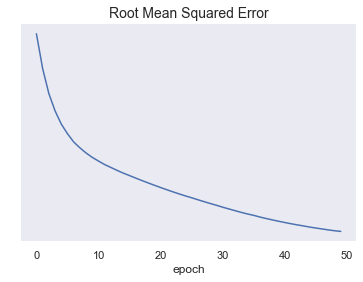

In [22]:
plt.plot(history.history['mean_squared_error'])
sns.despine(left = True, bottom = True)
sns.set_theme(style = "dark")
plt.tick_params(labelleft=False, left=False)
plt.title('Root Mean Squared Error', fontsize = 14)
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.ylabel(' ')
plt.show()

### Model Training

In [23]:
mse_list_b = []

for i in range(50):
    # Split train-test data
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)
    
    # Train and fit model
    model = regression_model()
    print('\n\n\nTraining Model # ' , i+1 , '\n\n') # Print model number being trained
    model.fit(x_train, y_train, validation_split = 0.3, epochs = 50)
    print('\n')
    
    # Prediction and evaluation
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error for Training Model #', i+1 , ' = ', mse)
    
    # Append mse to mse_list
    mse_list_b.append(mse)




Training Model #  1 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 1s 3ms/sample - loss: 0.9856 - mean_squared_error: 0.9856 - val_loss: 0.9812 - val_mean_squared_error: 0.9812
Epoch 2/50
504/504 [==============================] - 0s 173us/sample - loss: 0.8921 - mean_squared_error: 0.8921 - val_loss: 0.8876 - val_mean_squared_error: 0.8876
Epoch 3/50
504/504 [==============================] - 0s 141us/sample - loss: 0.8190 - mean_squared_error: 0.8190 - val_loss: 0.8125 - val_mean_squared_error: 0.8125
Epoch 4/50
504/504 [==============================] - 0s 180us/sample - loss: 0.7590 - mean_squared_error: 0.7590 - val_loss: 0.7526 - val_mean_squared_error: 0.7526
Epoch 5/50
504/504 [==============================] - 0s 137us/sample - loss: 0.7121 - mean_squared_error: 0.7121 - val_loss: 0.7040 - val_mean_squared_error: 0.7040
Epoch 6/50
504/504 [==============================] - 0s 185us/sample - loss: 0.6733 - mean_squared_

Epoch 50/50
504/504 [==============================] - 0s 134us/sample - loss: 0.3016 - mean_squared_error: 0.3016 - val_loss: 0.3272 - val_mean_squared_error: 0.3272


Mean Squared Error for Training Model # 1  =  0.27881519040933184



Training Model #  2 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 2s 3ms/sample - loss: 1.5596 - mean_squared_error: 1.5596 - val_loss: 1.5208 - val_mean_squared_error: 1.5208
Epoch 2/50
504/504 [==============================] - 0s 127us/sample - loss: 1.4061 - mean_squared_error: 1.4061 - val_loss: 1.3708 - val_mean_squared_error: 1.3708
Epoch 3/50
504/504 [==============================] - 0s 136us/sample - loss: 1.2693 - mean_squared_error: 1.2693 - val_loss: 1.2475 - val_mean_squared_error: 1.2475
Epoch 4/50
504/504 [==============================] - 0s 300us/sample - loss: 1.1562 - mean_squared_error: 1.1562 - val_loss: 1.1353 - val_mean_squared_error: 1.1353
Epoch 5/50
504/504 [===========

504/504 [==============================] - 0s 187us/sample - loss: 0.2687 - mean_squared_error: 0.2687 - val_loss: 0.2850 - val_mean_squared_error: 0.2850
Epoch 47/50
504/504 [==============================] - 0s 160us/sample - loss: 0.2644 - mean_squared_error: 0.2644 - val_loss: 0.2832 - val_mean_squared_error: 0.2832
Epoch 48/50
504/504 [==============================] - 0s 121us/sample - loss: 0.2607 - mean_squared_error: 0.2607 - val_loss: 0.2798 - val_mean_squared_error: 0.2798
Epoch 49/50
504/504 [==============================] - 0s 139us/sample - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 0.2774 - val_mean_squared_error: 0.2774
Epoch 50/50
504/504 [==============================] - 0s 163us/sample - loss: 0.2536 - mean_squared_error: 0.2536 - val_loss: 0.2730 - val_mean_squared_error: 0.2730


Mean Squared Error for Training Model # 3  =  0.23377595525723346



Training Model #  4 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [=================

504/504 [==============================] - 0s 268us/sample - loss: 0.4571 - mean_squared_error: 0.4571 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 43/50
504/504 [==============================] - 0s 162us/sample - loss: 0.4509 - mean_squared_error: 0.4509 - val_loss: 0.4352 - val_mean_squared_error: 0.4352
Epoch 44/50
504/504 [==============================] - 0s 136us/sample - loss: 0.4457 - mean_squared_error: 0.4457 - val_loss: 0.4311 - val_mean_squared_error: 0.4311
Epoch 45/50
504/504 [==============================] - 0s 133us/sample - loss: 0.4402 - mean_squared_error: 0.4402 - val_loss: 0.4268 - val_mean_squared_error: 0.4268
Epoch 46/50
504/504 [==============================] - 0s 138us/sample - loss: 0.4346 - mean_squared_error: 0.4346 - val_loss: 0.4231 - val_mean_squared_error: 0.4231
Epoch 47/50
504/504 [==============================] - 0s 177us/sample - loss: 0.4292 - mean_squared_error: 0.4292 - val_loss: 0.4196 - val_mean_squared_error: 0.4196
Epoch 48/5

504/504 [==============================] - 0s 184us/sample - loss: 0.3376 - mean_squared_error: 0.3376 - val_loss: 0.3502 - val_mean_squared_error: 0.3502
Epoch 41/50
504/504 [==============================] - 0s 268us/sample - loss: 0.3323 - mean_squared_error: 0.3323 - val_loss: 0.3468 - val_mean_squared_error: 0.3468
Epoch 42/50
504/504 [==============================] - 0s 130us/sample - loss: 0.3280 - mean_squared_error: 0.3280 - val_loss: 0.3426 - val_mean_squared_error: 0.3426
Epoch 43/50
504/504 [==============================] - 0s 129us/sample - loss: 0.3233 - mean_squared_error: 0.3233 - val_loss: 0.3390 - val_mean_squared_error: 0.3390
Epoch 44/50
504/504 [==============================] - 0s 234us/sample - loss: 0.3183 - mean_squared_error: 0.3183 - val_loss: 0.3349 - val_mean_squared_error: 0.3349
Epoch 45/50
504/504 [==============================] - 0s 204us/sample - loss: 0.3142 - mean_squared_error: 0.3142 - val_loss: 0.3315 - val_mean_squared_error: 0.3315
Epoch 46/5

504/504 [==============================] - 0s 141us/sample - loss: 0.2799 - mean_squared_error: 0.2799 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 37/50
504/504 [==============================] - 0s 139us/sample - loss: 0.2757 - mean_squared_error: 0.2757 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 38/50
504/504 [==============================] - 0s 139us/sample - loss: 0.2717 - mean_squared_error: 0.2717 - val_loss: 0.2618 - val_mean_squared_error: 0.2618
Epoch 39/50
504/504 [==============================] - 0s 138us/sample - loss: 0.2676 - mean_squared_error: 0.2676 - val_loss: 0.2582 - val_mean_squared_error: 0.2582
Epoch 40/50
504/504 [==============================] - 0s 164us/sample - loss: 0.2641 - mean_squared_error: 0.2641 - val_loss: 0.2559 - val_mean_squared_error: 0.2559
Epoch 41/50
504/504 [==============================] - 0s 136us/sample - loss: 0.2600 - mean_squared_error: 0.2600 - val_loss: 0.2517 - val_mean_squared_error: 0.2517
Epoch 42/5

504/504 [==============================] - 0s 169us/sample - loss: 0.3314 - mean_squared_error: 0.3314 - val_loss: 0.3650 - val_mean_squared_error: 0.3650
Epoch 33/50
504/504 [==============================] - 0s 137us/sample - loss: 0.3251 - mean_squared_error: 0.3251 - val_loss: 0.3617 - val_mean_squared_error: 0.3617
Epoch 34/50
504/504 [==============================] - 0s 143us/sample - loss: 0.3196 - mean_squared_error: 0.3196 - val_loss: 0.3580 - val_mean_squared_error: 0.3580
Epoch 35/50
504/504 [==============================] - 0s 132us/sample - loss: 0.3143 - mean_squared_error: 0.3143 - val_loss: 0.3542 - val_mean_squared_error: 0.3542
Epoch 36/50
504/504 [==============================] - 0s 130us/sample - loss: 0.3093 - mean_squared_error: 0.3093 - val_loss: 0.3509 - val_mean_squared_error: 0.3509
Epoch 37/50
504/504 [==============================] - 0s 164us/sample - loss: 0.3056 - mean_squared_error: 0.3056 - val_loss: 0.3487 - val_mean_squared_error: 0.3487
Epoch 38/5

504/504 [==============================] - 0s 176us/sample - loss: 0.4834 - mean_squared_error: 0.4834 - val_loss: 0.4922 - val_mean_squared_error: 0.4922
Epoch 29/50
504/504 [==============================] - 0s 140us/sample - loss: 0.4723 - mean_squared_error: 0.4723 - val_loss: 0.4800 - val_mean_squared_error: 0.4800
Epoch 30/50
504/504 [==============================] - 0s 140us/sample - loss: 0.4614 - mean_squared_error: 0.4614 - val_loss: 0.4677 - val_mean_squared_error: 0.4677
Epoch 31/50
504/504 [==============================] - 0s 140us/sample - loss: 0.4526 - mean_squared_error: 0.4526 - val_loss: 0.4565 - val_mean_squared_error: 0.4565
Epoch 32/50
504/504 [==============================] - 0s 142us/sample - loss: 0.4435 - mean_squared_error: 0.4435 - val_loss: 0.4471 - val_mean_squared_error: 0.4471
Epoch 33/50
504/504 [==============================] - 0s 136us/sample - loss: 0.4363 - mean_squared_error: 0.4363 - val_loss: 0.4391 - val_mean_squared_error: 0.4391
Epoch 34/5

504/504 [==============================] - 0s 167us/sample - loss: 0.3818 - mean_squared_error: 0.3818 - val_loss: 0.4542 - val_mean_squared_error: 0.4542
Epoch 25/50
504/504 [==============================] - 0s 151us/sample - loss: 0.3704 - mean_squared_error: 0.3704 - val_loss: 0.4425 - val_mean_squared_error: 0.4425
Epoch 26/50
504/504 [==============================] - 0s 166us/sample - loss: 0.3587 - mean_squared_error: 0.3587 - val_loss: 0.4339 - val_mean_squared_error: 0.4339
Epoch 27/50
504/504 [==============================] - 0s 163us/sample - loss: 0.3496 - mean_squared_error: 0.3496 - val_loss: 0.4256 - val_mean_squared_error: 0.4256
Epoch 28/50
504/504 [==============================] - 0s 161us/sample - loss: 0.3406 - mean_squared_error: 0.3406 - val_loss: 0.4185 - val_mean_squared_error: 0.4185
Epoch 29/50
504/504 [==============================] - 0s 141us/sample - loss: 0.3324 - mean_squared_error: 0.3324 - val_loss: 0.4120 - val_mean_squared_error: 0.4120
Epoch 30/5

504/504 [==============================] - 0s 168us/sample - loss: 0.6187 - mean_squared_error: 0.6187 - val_loss: 0.6870 - val_mean_squared_error: 0.6870
Epoch 21/50
504/504 [==============================] - 0s 143us/sample - loss: 0.6027 - mean_squared_error: 0.6027 - val_loss: 0.6715 - val_mean_squared_error: 0.6715
Epoch 22/50
504/504 [==============================] - 0s 164us/sample - loss: 0.5885 - mean_squared_error: 0.5885 - val_loss: 0.6579 - val_mean_squared_error: 0.6579
Epoch 23/50
504/504 [==============================] - 0s 140us/sample - loss: 0.5765 - mean_squared_error: 0.5765 - val_loss: 0.6443 - val_mean_squared_error: 0.6443
Epoch 24/50
504/504 [==============================] - 0s 143us/sample - loss: 0.5628 - mean_squared_error: 0.5628 - val_loss: 0.6331 - val_mean_squared_error: 0.6331
Epoch 25/50
504/504 [==============================] - 0s 146us/sample - loss: 0.5522 - mean_squared_error: 0.5522 - val_loss: 0.6228 - val_mean_squared_error: 0.6228
Epoch 26/5

504/504 [==============================] - 0s 276us/sample - loss: 0.4576 - mean_squared_error: 0.4576 - val_loss: 0.4473 - val_mean_squared_error: 0.4473
Epoch 17/50
504/504 [==============================] - 0s 267us/sample - loss: 0.4338 - mean_squared_error: 0.4338 - val_loss: 0.4248 - val_mean_squared_error: 0.4248
Epoch 18/50
504/504 [==============================] - 0s 193us/sample - loss: 0.4133 - mean_squared_error: 0.4133 - val_loss: 0.4072 - val_mean_squared_error: 0.4072
Epoch 19/50
504/504 [==============================] - 0s 170us/sample - loss: 0.3979 - mean_squared_error: 0.3979 - val_loss: 0.3928 - val_mean_squared_error: 0.3928
Epoch 20/50
504/504 [==============================] - 0s 175us/sample - loss: 0.3826 - mean_squared_error: 0.3826 - val_loss: 0.3817 - val_mean_squared_error: 0.3817
Epoch 21/50
504/504 [==============================] - 0s 165us/sample - loss: 0.3715 - mean_squared_error: 0.3715 - val_loss: 0.3718 - val_mean_squared_error: 0.3718
Epoch 22/5

504/504 [==============================] - 0s 217us/sample - loss: 0.6655 - mean_squared_error: 0.6655 - val_loss: 0.6160 - val_mean_squared_error: 0.6160
Epoch 13/50
504/504 [==============================] - 0s 168us/sample - loss: 0.6300 - mean_squared_error: 0.6300 - val_loss: 0.5843 - val_mean_squared_error: 0.5843
Epoch 14/50
504/504 [==============================] - 0s 181us/sample - loss: 0.6004 - mean_squared_error: 0.6004 - val_loss: 0.5559 - val_mean_squared_error: 0.5559
Epoch 15/50
504/504 [==============================] - 0s 166us/sample - loss: 0.5742 - mean_squared_error: 0.5742 - val_loss: 0.5309 - val_mean_squared_error: 0.5309
Epoch 16/50
504/504 [==============================] - 0s 172us/sample - loss: 0.5514 - mean_squared_error: 0.5514 - val_loss: 0.5093 - val_mean_squared_error: 0.5093
Epoch 17/50
504/504 [==============================] - 0s 167us/sample - loss: 0.5314 - mean_squared_error: 0.5314 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 18/5

504/504 [==============================] - 0s 207us/sample - loss: 0.6423 - mean_squared_error: 0.6423 - val_loss: 0.6142 - val_mean_squared_error: 0.6142
Epoch 9/50
504/504 [==============================] - 0s 185us/sample - loss: 0.6150 - mean_squared_error: 0.6150 - val_loss: 0.5927 - val_mean_squared_error: 0.5927
Epoch 10/50
504/504 [==============================] - 0s 171us/sample - loss: 0.5925 - mean_squared_error: 0.5925 - val_loss: 0.5712 - val_mean_squared_error: 0.5712
Epoch 11/50
504/504 [==============================] - 0s 173us/sample - loss: 0.5709 - mean_squared_error: 0.5709 - val_loss: 0.5545 - val_mean_squared_error: 0.5545
Epoch 12/50
504/504 [==============================] - 0s 168us/sample - loss: 0.5537 - mean_squared_error: 0.5537 - val_loss: 0.5396 - val_mean_squared_error: 0.5396
Epoch 13/50
504/504 [==============================] - 0s 173us/sample - loss: 0.5374 - mean_squared_error: 0.5374 - val_loss: 0.5255 - val_mean_squared_error: 0.5255
Epoch 14/50

504/504 [==============================] - 0s 212us/sample - loss: 0.9370 - mean_squared_error: 0.9370 - val_loss: 0.9156 - val_mean_squared_error: 0.9156
Epoch 5/50
504/504 [==============================] - 0s 172us/sample - loss: 0.8792 - mean_squared_error: 0.8792 - val_loss: 0.8580 - val_mean_squared_error: 0.8580
Epoch 6/50
504/504 [==============================] - 0s 199us/sample - loss: 0.8306 - mean_squared_error: 0.8306 - val_loss: 0.8119 - val_mean_squared_error: 0.8119
Epoch 7/50
504/504 [==============================] - 0s 174us/sample - loss: 0.7921 - mean_squared_error: 0.7921 - val_loss: 0.7693 - val_mean_squared_error: 0.7693
Epoch 8/50
504/504 [==============================] - 0s 192us/sample - loss: 0.7576 - mean_squared_error: 0.7576 - val_loss: 0.7317 - val_mean_squared_error: 0.7317
Epoch 9/50
504/504 [==============================] - 0s 182us/sample - loss: 0.7283 - mean_squared_error: 0.7283 - val_loss: 0.6999 - val_mean_squared_error: 0.6999
Epoch 10/50
504

Epoch 1/50
504/504 [==============================] - 2s 4ms/sample - loss: 2.1731 - mean_squared_error: 2.1731 - val_loss: 1.8609 - val_mean_squared_error: 1.8609
Epoch 2/50
504/504 [==============================] - 0s 172us/sample - loss: 1.8417 - mean_squared_error: 1.8417 - val_loss: 1.6053 - val_mean_squared_error: 1.6053
Epoch 3/50
504/504 [==============================] - 0s 175us/sample - loss: 1.5808 - mean_squared_error: 1.5808 - val_loss: 1.4160 - val_mean_squared_error: 1.4160
Epoch 4/50
504/504 [==============================] - 0s 183us/sample - loss: 1.3973 - mean_squared_error: 1.3973 - val_loss: 1.2638 - val_mean_squared_error: 1.2638
Epoch 5/50
504/504 [==============================] - 0s 191us/sample - loss: 1.2428 - mean_squared_error: 1.2428 - val_loss: 1.1543 - val_mean_squared_error: 1.1543
Epoch 6/50
504/504 [==============================] - 0s 194us/sample - loss: 1.1302 - mean_squared_error: 1.1302 - val_loss: 1.0636 - val_mean_squared_error: 1.0636
Epoch 

504/504 [==============================] - 0s 214us/sample - loss: 0.2878 - mean_squared_error: 0.2878 - val_loss: 0.3235 - val_mean_squared_error: 0.3235
Epoch 49/50
504/504 [==============================] - 0s 198us/sample - loss: 0.2839 - mean_squared_error: 0.2839 - val_loss: 0.3216 - val_mean_squared_error: 0.3216
Epoch 50/50
504/504 [==============================] - 0s 191us/sample - loss: 0.2811 - mean_squared_error: 0.2811 - val_loss: 0.3180 - val_mean_squared_error: 0.3180


Mean Squared Error for Training Model # 27  =  0.2784666512915683



Training Model #  28 


Train on 504 samples, validate on 217 samples
Epoch 1/50
504/504 [==============================] - 2s 4ms/sample - loss: 1.4698 - mean_squared_error: 1.4698 - val_loss: 1.3225 - val_mean_squared_error: 1.3225
Epoch 2/50
504/504 [==============================] - 0s 174us/sample - loss: 1.2859 - mean_squared_error: 1.2859 - val_loss: 1.1556 - val_mean_squared_error: 1.1556
Epoch 3/50
504/504 [====================

504/504 [==============================] - 0s 316us/sample - loss: 0.3033 - mean_squared_error: 0.3033 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 45/50
504/504 [==============================] - 0s 307us/sample - loss: 0.2981 - mean_squared_error: 0.2981 - val_loss: 0.3067 - val_mean_squared_error: 0.3067
Epoch 46/50
504/504 [==============================] - 0s 250us/sample - loss: 0.2935 - mean_squared_error: 0.2935 - val_loss: 0.3024 - val_mean_squared_error: 0.3024
Epoch 47/50
504/504 [==============================] - 0s 295us/sample - loss: 0.2883 - mean_squared_error: 0.2883 - val_loss: 0.2982 - val_mean_squared_error: 0.2982
Epoch 48/50
504/504 [==============================] - 0s 355us/sample - loss: 0.2834 - mean_squared_error: 0.2834 - val_loss: 0.2949 - val_mean_squared_error: 0.2949
Epoch 49/50
504/504 [==============================] - 0s 340us/sample - loss: 0.2798 - mean_squared_error: 0.2798 - val_loss: 0.2920 - val_mean_squared_error: 0.2920
Epoch 50/5

504/504 [==============================] - 0s 189us/sample - loss: 0.2979 - mean_squared_error: 0.2979 - val_loss: 0.3076 - val_mean_squared_error: 0.3076
Epoch 41/50
504/504 [==============================] - 0s 182us/sample - loss: 0.2931 - mean_squared_error: 0.2931 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 42/50
504/504 [==============================] - 0s 185us/sample - loss: 0.2881 - mean_squared_error: 0.2881 - val_loss: 0.3029 - val_mean_squared_error: 0.3029
Epoch 43/50
504/504 [==============================] - 0s 189us/sample - loss: 0.2840 - mean_squared_error: 0.2840 - val_loss: 0.3001 - val_mean_squared_error: 0.3001
Epoch 44/50
504/504 [==============================] - 0s 182us/sample - loss: 0.2793 - mean_squared_error: 0.2793 - val_loss: 0.2965 - val_mean_squared_error: 0.2965
Epoch 45/50
504/504 [==============================] - 0s 181us/sample - loss: 0.2745 - mean_squared_error: 0.2745 - val_loss: 0.2939 - val_mean_squared_error: 0.2939
Epoch 46/5

504/504 [==============================] - 0s 216us/sample - loss: 0.3029 - mean_squared_error: 0.3029 - val_loss: 0.3053 - val_mean_squared_error: 0.3053
Epoch 37/50
504/504 [==============================] - 0s 180us/sample - loss: 0.2984 - mean_squared_error: 0.2984 - val_loss: 0.3009 - val_mean_squared_error: 0.3009
Epoch 38/50
504/504 [==============================] - 0s 183us/sample - loss: 0.2934 - mean_squared_error: 0.2934 - val_loss: 0.2959 - val_mean_squared_error: 0.2959
Epoch 39/50
504/504 [==============================] - 0s 203us/sample - loss: 0.2895 - mean_squared_error: 0.2895 - val_loss: 0.2921 - val_mean_squared_error: 0.2921
Epoch 40/50
504/504 [==============================] - 0s 200us/sample - loss: 0.2852 - mean_squared_error: 0.2852 - val_loss: 0.2898 - val_mean_squared_error: 0.2898
Epoch 41/50
504/504 [==============================] - 0s 186us/sample - loss: 0.2817 - mean_squared_error: 0.2817 - val_loss: 0.2866 - val_mean_squared_error: 0.2866
Epoch 42/5

504/504 [==============================] - 0s 207us/sample - loss: 0.4828 - mean_squared_error: 0.4828 - val_loss: 0.4545 - val_mean_squared_error: 0.4545
Epoch 33/50
504/504 [==============================] - 0s 188us/sample - loss: 0.4734 - mean_squared_error: 0.4734 - val_loss: 0.4470 - val_mean_squared_error: 0.4470
Epoch 34/50
504/504 [==============================] - 0s 193us/sample - loss: 0.4647 - mean_squared_error: 0.4647 - val_loss: 0.4397 - val_mean_squared_error: 0.4397
Epoch 35/50
504/504 [==============================] - 0s 197us/sample - loss: 0.4566 - mean_squared_error: 0.4566 - val_loss: 0.4327 - val_mean_squared_error: 0.4327
Epoch 36/50
504/504 [==============================] - 0s 191us/sample - loss: 0.4484 - mean_squared_error: 0.4484 - val_loss: 0.4257 - val_mean_squared_error: 0.4257
Epoch 37/50
504/504 [==============================] - 0s 185us/sample - loss: 0.4399 - mean_squared_error: 0.4399 - val_loss: 0.4181 - val_mean_squared_error: 0.4181
Epoch 38/5

504/504 [==============================] - 0s 259us/sample - loss: 0.4399 - mean_squared_error: 0.4399 - val_loss: 0.5060 - val_mean_squared_error: 0.5060
Epoch 29/50
504/504 [==============================] - 0s 199us/sample - loss: 0.4283 - mean_squared_error: 0.4283 - val_loss: 0.4950 - val_mean_squared_error: 0.4950
Epoch 30/50
504/504 [==============================] - 0s 192us/sample - loss: 0.4172 - mean_squared_error: 0.4172 - val_loss: 0.4846 - val_mean_squared_error: 0.4846
Epoch 31/50
504/504 [==============================] - 0s 193us/sample - loss: 0.4067 - mean_squared_error: 0.4067 - val_loss: 0.4745 - val_mean_squared_error: 0.4745
Epoch 32/50
504/504 [==============================] - 0s 193us/sample - loss: 0.3964 - mean_squared_error: 0.3964 - val_loss: 0.4651 - val_mean_squared_error: 0.4651
Epoch 33/50
504/504 [==============================] - 0s 208us/sample - loss: 0.3867 - mean_squared_error: 0.3867 - val_loss: 0.4571 - val_mean_squared_error: 0.4571
Epoch 34/5

504/504 [==============================] - 0s 205us/sample - loss: 0.4550 - mean_squared_error: 0.4550 - val_loss: 0.4393 - val_mean_squared_error: 0.4393
Epoch 25/50
504/504 [==============================] - 0s 193us/sample - loss: 0.4452 - mean_squared_error: 0.4452 - val_loss: 0.4318 - val_mean_squared_error: 0.4318
Epoch 26/50
504/504 [==============================] - 0s 193us/sample - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 0.4235 - val_mean_squared_error: 0.4235
Epoch 27/50
504/504 [==============================] - 0s 202us/sample - loss: 0.4284 - mean_squared_error: 0.4284 - val_loss: 0.4162 - val_mean_squared_error: 0.4162
Epoch 28/50
504/504 [==============================] - 0s 202us/sample - loss: 0.4214 - mean_squared_error: 0.4214 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 29/50
504/504 [==============================] - 0s 194us/sample - loss: 0.4145 - mean_squared_error: 0.4145 - val_loss: 0.4035 - val_mean_squared_error: 0.4035
Epoch 30/5

504/504 [==============================] - 0s 202us/sample - loss: 0.5123 - mean_squared_error: 0.5123 - val_loss: 0.5092 - val_mean_squared_error: 0.5092
Epoch 21/50
504/504 [==============================] - 0s 207us/sample - loss: 0.4937 - mean_squared_error: 0.4937 - val_loss: 0.4912 - val_mean_squared_error: 0.4912
Epoch 22/50
504/504 [==============================] - 0s 189us/sample - loss: 0.4770 - mean_squared_error: 0.4770 - val_loss: 0.4770 - val_mean_squared_error: 0.4770
Epoch 23/50
504/504 [==============================] - 0s 190us/sample - loss: 0.4635 - mean_squared_error: 0.4635 - val_loss: 0.4616 - val_mean_squared_error: 0.4616
Epoch 24/50
504/504 [==============================] - 0s 194us/sample - loss: 0.4492 - mean_squared_error: 0.4492 - val_loss: 0.4482 - val_mean_squared_error: 0.4482
Epoch 25/50
504/504 [==============================] - 0s 198us/sample - loss: 0.4371 - mean_squared_error: 0.4371 - val_loss: 0.4360 - val_mean_squared_error: 0.4360
Epoch 26/5

504/504 [==============================] - 0s 224us/sample - loss: 0.4479 - mean_squared_error: 0.4479 - val_loss: 0.4300 - val_mean_squared_error: 0.4300
Epoch 17/50
504/504 [==============================] - 0s 202us/sample - loss: 0.4361 - mean_squared_error: 0.4361 - val_loss: 0.4207 - val_mean_squared_error: 0.4207
Epoch 18/50
504/504 [==============================] - 0s 188us/sample - loss: 0.4255 - mean_squared_error: 0.4255 - val_loss: 0.4134 - val_mean_squared_error: 0.4134
Epoch 19/50
504/504 [==============================] - 0s 194us/sample - loss: 0.4155 - mean_squared_error: 0.4155 - val_loss: 0.4059 - val_mean_squared_error: 0.4059
Epoch 20/50
504/504 [==============================] - 0s 194us/sample - loss: 0.4059 - mean_squared_error: 0.4059 - val_loss: 0.3994 - val_mean_squared_error: 0.3994
Epoch 21/50
504/504 [==============================] - 0s 206us/sample - loss: 0.3975 - mean_squared_error: 0.3975 - val_loss: 0.3935 - val_mean_squared_error: 0.3935
Epoch 22/5

504/504 [==============================] - 0s 223us/sample - loss: 0.8230 - mean_squared_error: 0.8230 - val_loss: 0.8156 - val_mean_squared_error: 0.8156
Epoch 13/50
504/504 [==============================] - 0s 201us/sample - loss: 0.7810 - mean_squared_error: 0.7810 - val_loss: 0.7761 - val_mean_squared_error: 0.7761
Epoch 14/50
504/504 [==============================] - 0s 203us/sample - loss: 0.7440 - mean_squared_error: 0.7440 - val_loss: 0.7426 - val_mean_squared_error: 0.7426
Epoch 15/50
504/504 [==============================] - 0s 197us/sample - loss: 0.7118 - mean_squared_error: 0.7118 - val_loss: 0.7156 - val_mean_squared_error: 0.7156
Epoch 16/50
504/504 [==============================] - 0s 197us/sample - loss: 0.6851 - mean_squared_error: 0.6851 - val_loss: 0.6900 - val_mean_squared_error: 0.6900
Epoch 17/50
504/504 [==============================] - 0s 202us/sample - loss: 0.6603 - mean_squared_error: 0.6603 - val_loss: 0.6685 - val_mean_squared_error: 0.6685
Epoch 18/5

504/504 [==============================] - 0s 248us/sample - loss: 0.5967 - mean_squared_error: 0.5967 - val_loss: 0.5512 - val_mean_squared_error: 0.5512
Epoch 9/50
504/504 [==============================] - 0s 254us/sample - loss: 0.5633 - mean_squared_error: 0.5633 - val_loss: 0.5222 - val_mean_squared_error: 0.5222
Epoch 10/50
504/504 [==============================] - 0s 213us/sample - loss: 0.5359 - mean_squared_error: 0.5359 - val_loss: 0.4989 - val_mean_squared_error: 0.4989
Epoch 11/50
504/504 [==============================] - 0s 218us/sample - loss: 0.5132 - mean_squared_error: 0.5132 - val_loss: 0.4763 - val_mean_squared_error: 0.4763
Epoch 12/50
504/504 [==============================] - 0s 232us/sample - loss: 0.4910 - mean_squared_error: 0.4910 - val_loss: 0.4583 - val_mean_squared_error: 0.4583
Epoch 13/50
504/504 [==============================] - 0s 225us/sample - loss: 0.4734 - mean_squared_error: 0.4734 - val_loss: 0.4414 - val_mean_squared_error: 0.4414
Epoch 14/50

504/504 [==============================] - 0s 258us/sample - loss: 1.2491 - mean_squared_error: 1.2491 - val_loss: 1.1973 - val_mean_squared_error: 1.1973
Epoch 5/50
504/504 [==============================] - 0s 240us/sample - loss: 1.1329 - mean_squared_error: 1.1329 - val_loss: 1.0850 - val_mean_squared_error: 1.0850
Epoch 6/50
504/504 [==============================] - 0s 246us/sample - loss: 1.0346 - mean_squared_error: 1.0346 - val_loss: 0.9917 - val_mean_squared_error: 0.9917
Epoch 7/50
504/504 [==============================] - 0s 275us/sample - loss: 0.9497 - mean_squared_error: 0.9497 - val_loss: 0.9180 - val_mean_squared_error: 0.9180
Epoch 8/50
504/504 [==============================] - 0s 254us/sample - loss: 0.8839 - mean_squared_error: 0.8839 - val_loss: 0.8517 - val_mean_squared_error: 0.8517
Epoch 9/50
504/504 [==============================] - 0s 263us/sample - loss: 0.8245 - mean_squared_error: 0.8245 - val_loss: 0.7958 - val_mean_squared_error: 0.7958
Epoch 10/50
504



Mean Squared Error for Training Model # 50  =  0.24234031104460624


In [24]:
# Calculate Mean of the MSE
mean_b = stats.mean(mse_list_b)

# Calculate Standard Deviation of the MSE
std_b = stats.stdev(mse_list_b)

print('\n\nMean of the MSE of 50 Models : ' , str(mean_b))
print('Standard Deviation of MSE of 50 Models : ' , str(std_b))



Mean of the MSE of 50 Models :  0.2590430032705435
Standard Deviation of MSE of 50 Models :  0.040484331426500444


___

# Part C

### Model Building

**Regression Model Building** <br>
In this model we will implement the entire dataset in a Neural Network to target heart disease. The model contains: <br>
1. Feature vector with 8 units
2. Input layer with 10 nodes
3. 1 hidden layer with 10 nodes
4. 1 output node <br>

The model will use **'relu'** activator; **'adam'** optimizer and **'mean_squared_error'** loss function in 100 epochs.

In [25]:
def regression_model():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])
    
    return model

In [26]:
model = regression_model()

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100)

Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 3s 5ms/sample - loss: 2.1381 - mean_squared_error: 2.1381 - val_loss: 2.0639 - val_mean_squared_error: 2.0639
Epoch 2/100
504/504 [==============================] - 0s 231us/sample - loss: 1.8845 - mean_squared_error: 1.8845 - val_loss: 1.8327 - val_mean_squared_error: 1.8327
Epoch 3/100
504/504 [==============================] - 0s 230us/sample - loss: 1.6762 - mean_squared_error: 1.6762 - val_loss: 1.6339 - val_mean_squared_error: 1.6339
Epoch 4/100
504/504 [==============================] - 0s 227us/sample - loss: 1.4930 - mean_squared_error: 1.4930 - val_loss: 1.4678 - val_mean_squared_error: 1.4678
Epoch 5/100
504/504 [==============================] - 0s 215us/sample - loss: 1.3413 - mean_squared_error: 1.3413 - val_loss: 1.3180 - val_mean_squared_error: 1.3180
Epoch 6/100
504/504 [==============================] - 0s 233us/sample - loss: 1.2063 - mean_squared_error: 1.2063 - val_

Epoch 98/100
504/504 [==============================] - 0s 218us/sample - loss: 0.1744 - mean_squared_error: 0.1744 - val_loss: 0.2165 - val_mean_squared_error: 0.2165
Epoch 99/100
504/504 [==============================] - 0s 198us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.2161 - val_mean_squared_error: 0.2161
Epoch 100/100
504/504 [==============================] - 0s 209us/sample - loss: 0.1727 - mean_squared_error: 0.1727 - val_loss: 0.2151 - val_mean_squared_error: 0.2151


### Model Evaluation

In [27]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error = ", mse)

Mean Square Error =  0.1915891841626726


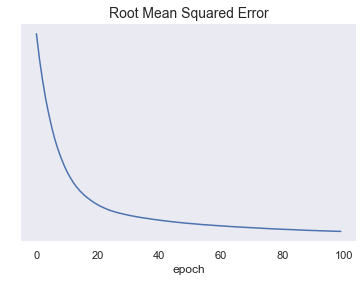

In [28]:
plt.plot(history.history['mean_squared_error'])
sns.despine(left = True, bottom = True)
sns.set_theme(style = "dark")
plt.tick_params(labelleft=False, left=False)
plt.title('Root Mean Squared Error', fontsize = 14)
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.ylabel(' ')
plt.show()

### Model Training

In [29]:
mse_list_c = []

for i in range(50):
    # Split train-test data
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)
    
    # Train and fit model
    model = regression_model()
    print('\n\n\nTraining Model # ' , i+1 , '\n\n') # Print model number being trained
    model.fit(x_train, y_train, validation_split = 0.3, epochs = 100)
    print('\n')
    
    # Prediction and evaluation
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error for Training Model #', i+1 , ' = ', mse)
    
    # Append mse to mse_list
    mse_list_c.append(mse)




Training Model #  1 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 3s 7ms/sample - loss: 1.1516 - mean_squared_error: 1.1516 - val_loss: 1.1737 - val_mean_squared_error: 1.1737
Epoch 2/100
504/504 [==============================] - 0s 232us/sample - loss: 1.0254 - mean_squared_error: 1.0254 - val_loss: 1.0426 - val_mean_squared_error: 1.0426
Epoch 3/100
504/504 [==============================] - 0s 237us/sample - loss: 0.9232 - mean_squared_error: 0.9232 - val_loss: 0.9424 - val_mean_squared_error: 0.9424
Epoch 4/100
504/504 [==============================] - 0s 475us/sample - loss: 0.8472 - mean_squared_error: 0.8472 - val_loss: 0.8575 - val_mean_squared_error: 0.8575
Epoch 5/100
504/504 [==============================] - 0s 454us/sample - loss: 0.7833 - mean_squared_error: 0.7833 - val_loss: 0.7855 - val_mean_squared_error: 0.7855
Epoch 6/100
504/504 [==============================] - 0s 392us/sample - loss: 0.7290 - mean_sq

Epoch 98/100
504/504 [==============================] - 0s 209us/sample - loss: 0.1530 - mean_squared_error: 0.1530 - val_loss: 0.1655 - val_mean_squared_error: 0.1655
Epoch 99/100
504/504 [==============================] - 0s 193us/sample - loss: 0.1518 - mean_squared_error: 0.1518 - val_loss: 0.1641 - val_mean_squared_error: 0.1641
Epoch 100/100
504/504 [==============================] - 0s 199us/sample - loss: 0.1507 - mean_squared_error: 0.1507 - val_loss: 0.1650 - val_mean_squared_error: 0.1650


Mean Squared Error for Training Model # 1  =  0.16944008274998895



Training Model #  2 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 3s 5ms/sample - loss: 1.0012 - mean_squared_error: 1.0012 - val_loss: 0.8993 - val_mean_squared_error: 0.8993
Epoch 2/100
504/504 [==============================] - 0s 218us/sample - loss: 0.9011 - mean_squared_error: 0.9011 - val_loss: 0.8198 - val_mean_squared_error: 0.8198
Epoch 3/100
504/504 [==

Epoch 46/100
504/504 [==============================] - 0s 197us/sample - loss: 0.2902 - mean_squared_error: 0.2902 - val_loss: 0.3064 - val_mean_squared_error: 0.3064
Epoch 47/100
504/504 [==============================] - 0s 261us/sample - loss: 0.2876 - mean_squared_error: 0.2876 - val_loss: 0.3027 - val_mean_squared_error: 0.3027
Epoch 48/100
504/504 [==============================] - 0s 452us/sample - loss: 0.2857 - mean_squared_error: 0.2857 - val_loss: 0.3012 - val_mean_squared_error: 0.3012
Epoch 49/100
504/504 [==============================] - 0s 208us/sample - loss: 0.2822 - mean_squared_error: 0.2822 - val_loss: 0.2997 - val_mean_squared_error: 0.2997
Epoch 50/100
504/504 [==============================] - 0s 358us/sample - loss: 0.2795 - mean_squared_error: 0.2795 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 51/100
504/504 [==============================] - 0s 362us/sample - loss: 0.2776 - mean_squared_error: 0.2776 - val_loss: 0.2939 - val_mean_squared_error:

Epoch 95/100
504/504 [==============================] - 0s 290us/sample - loss: 0.2109 - mean_squared_error: 0.2109 - val_loss: 0.2499 - val_mean_squared_error: 0.2499
Epoch 96/100
504/504 [==============================] - 0s 277us/sample - loss: 0.2097 - mean_squared_error: 0.2097 - val_loss: 0.2495 - val_mean_squared_error: 0.2495
Epoch 97/100
504/504 [==============================] - 0s 206us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - val_loss: 0.2478 - val_mean_squared_error: 0.2478
Epoch 98/100
504/504 [==============================] - 0s 220us/sample - loss: 0.2084 - mean_squared_error: 0.2084 - val_loss: 0.2472 - val_mean_squared_error: 0.2472
Epoch 99/100
504/504 [==============================] - 0s 335us/sample - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 100/100
504/504 [==============================] - 0s 209us/sample - loss: 0.2059 - mean_squared_error: 0.2059 - val_loss: 0.2452 - val_mean_squared_error

Epoch 43/100
504/504 [==============================] - 0s 221us/sample - loss: 0.3484 - mean_squared_error: 0.3484 - val_loss: 0.3528 - val_mean_squared_error: 0.3528
Epoch 44/100
504/504 [==============================] - 0s 206us/sample - loss: 0.3401 - mean_squared_error: 0.3401 - val_loss: 0.3465 - val_mean_squared_error: 0.3465
Epoch 45/100
504/504 [==============================] - 0s 208us/sample - loss: 0.3335 - mean_squared_error: 0.3335 - val_loss: 0.3405 - val_mean_squared_error: 0.3405
Epoch 46/100
504/504 [==============================] - 0s 206us/sample - loss: 0.3247 - mean_squared_error: 0.3247 - val_loss: 0.3340 - val_mean_squared_error: 0.3340
Epoch 47/100
504/504 [==============================] - 0s 201us/sample - loss: 0.3176 - mean_squared_error: 0.3176 - val_loss: 0.3282 - val_mean_squared_error: 0.3282
Epoch 48/100
504/504 [==============================] - 0s 206us/sample - loss: 0.3106 - mean_squared_error: 0.3106 - val_loss: 0.3215 - val_mean_squared_error:

Epoch 92/100
504/504 [==============================] - 0s 221us/sample - loss: 0.1641 - mean_squared_error: 0.1641 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Epoch 93/100
504/504 [==============================] - 0s 217us/sample - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 94/100
504/504 [==============================] - 0s 213us/sample - loss: 0.1619 - mean_squared_error: 0.1619 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 95/100
504/504 [==============================] - 0s 208us/sample - loss: 0.1611 - mean_squared_error: 0.1611 - val_loss: 0.2222 - val_mean_squared_error: 0.2222
Epoch 96/100
504/504 [==============================] - 0s 271us/sample - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 97/100
504/504 [==============================] - 0s 261us/sample - loss: 0.1581 - mean_squared_error: 0.1581 - val_loss: 0.2199 - val_mean_squared_error:

Epoch 40/100
504/504 [==============================] - 0s 214us/sample - loss: 0.3703 - mean_squared_error: 0.3703 - val_loss: 0.3974 - val_mean_squared_error: 0.3974
Epoch 41/100
504/504 [==============================] - 0s 206us/sample - loss: 0.3646 - mean_squared_error: 0.3646 - val_loss: 0.3955 - val_mean_squared_error: 0.3955
Epoch 42/100
504/504 [==============================] - 0s 210us/sample - loss: 0.3606 - mean_squared_error: 0.3606 - val_loss: 0.3923 - val_mean_squared_error: 0.3923
Epoch 43/100
504/504 [==============================] - 0s 209us/sample - loss: 0.3560 - mean_squared_error: 0.3560 - val_loss: 0.3893 - val_mean_squared_error: 0.3893
Epoch 44/100
504/504 [==============================] - 0s 201us/sample - loss: 0.3526 - mean_squared_error: 0.3526 - val_loss: 0.3863 - val_mean_squared_error: 0.3863
Epoch 45/100
504/504 [==============================] - 0s 211us/sample - loss: 0.3476 - mean_squared_error: 0.3476 - val_loss: 0.3827 - val_mean_squared_error:

Epoch 89/100
504/504 [==============================] - 0s 213us/sample - loss: 0.1971 - mean_squared_error: 0.1971 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 90/100
504/504 [==============================] - 0s 223us/sample - loss: 0.1948 - mean_squared_error: 0.1948 - val_loss: 0.2329 - val_mean_squared_error: 0.2329
Epoch 91/100
504/504 [==============================] - 0s 204us/sample - loss: 0.1916 - mean_squared_error: 0.1916 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 92/100
504/504 [==============================] - 0s 211us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 93/100
504/504 [==============================] - 0s 203us/sample - loss: 0.1866 - mean_squared_error: 0.1866 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 94/100
504/504 [==============================] - 0s 206us/sample - loss: 0.1845 - mean_squared_error: 0.1845 - val_loss: 0.2241 - val_mean_squared_error:

Epoch 37/100
504/504 [==============================] - 0s 217us/sample - loss: 0.3285 - mean_squared_error: 0.3285 - val_loss: 0.3995 - val_mean_squared_error: 0.3995
Epoch 38/100
504/504 [==============================] - 0s 214us/sample - loss: 0.3242 - mean_squared_error: 0.3242 - val_loss: 0.3944 - val_mean_squared_error: 0.3944
Epoch 39/100
504/504 [==============================] - 0s 206us/sample - loss: 0.3208 - mean_squared_error: 0.3208 - val_loss: 0.3922 - val_mean_squared_error: 0.3922
Epoch 40/100
504/504 [==============================] - 0s 210us/sample - loss: 0.3178 - mean_squared_error: 0.3178 - val_loss: 0.3863 - val_mean_squared_error: 0.3863
Epoch 41/100
504/504 [==============================] - 0s 214us/sample - loss: 0.3138 - mean_squared_error: 0.3138 - val_loss: 0.3854 - val_mean_squared_error: 0.3854
Epoch 42/100
504/504 [==============================] - 0s 207us/sample - loss: 0.3102 - mean_squared_error: 0.3102 - val_loss: 0.3818 - val_mean_squared_error:

Epoch 86/100
504/504 [==============================] - 0s 214us/sample - loss: 0.1959 - mean_squared_error: 0.1959 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 87/100
504/504 [==============================] - 0s 210us/sample - loss: 0.1942 - mean_squared_error: 0.1942 - val_loss: 0.2560 - val_mean_squared_error: 0.2560
Epoch 88/100
504/504 [==============================] - 0s 205us/sample - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.2529 - val_mean_squared_error: 0.2529
Epoch 89/100
504/504 [==============================] - 0s 210us/sample - loss: 0.1913 - mean_squared_error: 0.1913 - val_loss: 0.2523 - val_mean_squared_error: 0.2523
Epoch 90/100
504/504 [==============================] - 0s 208us/sample - loss: 0.1898 - mean_squared_error: 0.1898 - val_loss: 0.2506 - val_mean_squared_error: 0.2506
Epoch 91/100
504/504 [==============================] - 0s 211us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 0.2489 - val_mean_squared_error:

Epoch 34/100
504/504 [==============================] - 0s 207us/sample - loss: 0.3873 - mean_squared_error: 0.3873 - val_loss: 0.3918 - val_mean_squared_error: 0.3918
Epoch 35/100
504/504 [==============================] - 0s 210us/sample - loss: 0.3812 - mean_squared_error: 0.3812 - val_loss: 0.3871 - val_mean_squared_error: 0.3871
Epoch 36/100
504/504 [==============================] - 0s 208us/sample - loss: 0.3765 - mean_squared_error: 0.3765 - val_loss: 0.3837 - val_mean_squared_error: 0.3837
Epoch 37/100
504/504 [==============================] - 0s 207us/sample - loss: 0.3700 - mean_squared_error: 0.3700 - val_loss: 0.3790 - val_mean_squared_error: 0.3790
Epoch 38/100
504/504 [==============================] - 0s 209us/sample - loss: 0.3652 - mean_squared_error: 0.3652 - val_loss: 0.3750 - val_mean_squared_error: 0.3750
Epoch 39/100
504/504 [==============================] - 0s 204us/sample - loss: 0.3603 - mean_squared_error: 0.3603 - val_loss: 0.3715 - val_mean_squared_error:

Epoch 83/100
504/504 [==============================] - 0s 317us/sample - loss: 0.2517 - mean_squared_error: 0.2517 - val_loss: 0.3031 - val_mean_squared_error: 0.3031
Epoch 84/100
504/504 [==============================] - 0s 305us/sample - loss: 0.2503 - mean_squared_error: 0.2503 - val_loss: 0.3046 - val_mean_squared_error: 0.3046
Epoch 85/100
504/504 [==============================] - 0s 279us/sample - loss: 0.2488 - mean_squared_error: 0.2488 - val_loss: 0.3047 - val_mean_squared_error: 0.3047
Epoch 86/100
504/504 [==============================] - 0s 320us/sample - loss: 0.2470 - mean_squared_error: 0.2470 - val_loss: 0.3022 - val_mean_squared_error: 0.3022
Epoch 87/100
504/504 [==============================] - 0s 292us/sample - loss: 0.2464 - mean_squared_error: 0.2464 - val_loss: 0.3035 - val_mean_squared_error: 0.3035
Epoch 88/100
504/504 [==============================] - 0s 287us/sample - loss: 0.2447 - mean_squared_error: 0.2447 - val_loss: 0.3005 - val_mean_squared_error:

Epoch 31/100
504/504 [==============================] - 0s 224us/sample - loss: 0.4128 - mean_squared_error: 0.4128 - val_loss: 0.4345 - val_mean_squared_error: 0.4345
Epoch 32/100
504/504 [==============================] - 0s 215us/sample - loss: 0.4075 - mean_squared_error: 0.4075 - val_loss: 0.4306 - val_mean_squared_error: 0.4306
Epoch 33/100
504/504 [==============================] - 0s 211us/sample - loss: 0.4020 - mean_squared_error: 0.4020 - val_loss: 0.4255 - val_mean_squared_error: 0.4255
Epoch 34/100
504/504 [==============================] - 0s 221us/sample - loss: 0.3964 - mean_squared_error: 0.3964 - val_loss: 0.4216 - val_mean_squared_error: 0.4216
Epoch 35/100
504/504 [==============================] - 0s 221us/sample - loss: 0.3913 - mean_squared_error: 0.3913 - val_loss: 0.4175 - val_mean_squared_error: 0.4175
Epoch 36/100
504/504 [==============================] - 0s 208us/sample - loss: 0.3870 - mean_squared_error: 0.3870 - val_loss: 0.4144 - val_mean_squared_error:

Epoch 80/100
504/504 [==============================] - 0s 224us/sample - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.2817 - val_mean_squared_error: 0.2817
Epoch 81/100
504/504 [==============================] - 0s 214us/sample - loss: 0.2215 - mean_squared_error: 0.2215 - val_loss: 0.2796 - val_mean_squared_error: 0.2796
Epoch 82/100
504/504 [==============================] - 0s 214us/sample - loss: 0.2190 - mean_squared_error: 0.2190 - val_loss: 0.2774 - val_mean_squared_error: 0.2774
Epoch 83/100
504/504 [==============================] - 0s 216us/sample - loss: 0.2163 - mean_squared_error: 0.2163 - val_loss: 0.2756 - val_mean_squared_error: 0.2756
Epoch 84/100
504/504 [==============================] - 0s 210us/sample - loss: 0.2136 - mean_squared_error: 0.2136 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 85/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2108 - mean_squared_error: 0.2108 - val_loss: 0.2695 - val_mean_squared_error:

Epoch 28/100
504/504 [==============================] - 0s 222us/sample - loss: 0.4731 - mean_squared_error: 0.4731 - val_loss: 0.4807 - val_mean_squared_error: 0.4807
Epoch 29/100
504/504 [==============================] - 0s 213us/sample - loss: 0.4656 - mean_squared_error: 0.4656 - val_loss: 0.4744 - val_mean_squared_error: 0.4744
Epoch 30/100
504/504 [==============================] - 0s 212us/sample - loss: 0.4577 - mean_squared_error: 0.4577 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 31/100
504/504 [==============================] - 0s 210us/sample - loss: 0.4498 - mean_squared_error: 0.4498 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 32/100
504/504 [==============================] - 0s 212us/sample - loss: 0.4426 - mean_squared_error: 0.4426 - val_loss: 0.4552 - val_mean_squared_error: 0.4552
Epoch 33/100
504/504 [==============================] - 0s 216us/sample - loss: 0.4352 - mean_squared_error: 0.4352 - val_loss: 0.4495 - val_mean_squared_error:

Epoch 77/100
504/504 [==============================] - 0s 215us/sample - loss: 0.2458 - mean_squared_error: 0.2458 - val_loss: 0.3121 - val_mean_squared_error: 0.3121
Epoch 78/100
504/504 [==============================] - 0s 210us/sample - loss: 0.2435 - mean_squared_error: 0.2435 - val_loss: 0.3079 - val_mean_squared_error: 0.3079
Epoch 79/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2406 - mean_squared_error: 0.2406 - val_loss: 0.3053 - val_mean_squared_error: 0.3053
Epoch 80/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2387 - mean_squared_error: 0.2387 - val_loss: 0.3025 - val_mean_squared_error: 0.3025
Epoch 81/100
504/504 [==============================] - 0s 207us/sample - loss: 0.2358 - mean_squared_error: 0.2358 - val_loss: 0.2989 - val_mean_squared_error: 0.2989
Epoch 82/100
504/504 [==============================] - 0s 217us/sample - loss: 0.2330 - mean_squared_error: 0.2330 - val_loss: 0.2964 - val_mean_squared_error:

Epoch 25/100
504/504 [==============================] - 0s 222us/sample - loss: 0.4939 - mean_squared_error: 0.4939 - val_loss: 0.5700 - val_mean_squared_error: 0.5700
Epoch 26/100
504/504 [==============================] - 0s 217us/sample - loss: 0.4864 - mean_squared_error: 0.4864 - val_loss: 0.5631 - val_mean_squared_error: 0.5631
Epoch 27/100
504/504 [==============================] - 0s 221us/sample - loss: 0.4795 - mean_squared_error: 0.4795 - val_loss: 0.5558 - val_mean_squared_error: 0.5558
Epoch 28/100
504/504 [==============================] - 0s 215us/sample - loss: 0.4714 - mean_squared_error: 0.4714 - val_loss: 0.5488 - val_mean_squared_error: 0.5488
Epoch 29/100
504/504 [==============================] - 0s 220us/sample - loss: 0.4655 - mean_squared_error: 0.4655 - val_loss: 0.5412 - val_mean_squared_error: 0.5412
Epoch 30/100
504/504 [==============================] - 0s 217us/sample - loss: 0.4573 - mean_squared_error: 0.4573 - val_loss: 0.5347 - val_mean_squared_error:

Epoch 74/100
504/504 [==============================] - 0s 214us/sample - loss: 0.2699 - mean_squared_error: 0.2699 - val_loss: 0.3268 - val_mean_squared_error: 0.3268
Epoch 75/100
504/504 [==============================] - 0s 214us/sample - loss: 0.2665 - mean_squared_error: 0.2665 - val_loss: 0.3237 - val_mean_squared_error: 0.3237
Epoch 76/100
504/504 [==============================] - 0s 217us/sample - loss: 0.2639 - mean_squared_error: 0.2639 - val_loss: 0.3203 - val_mean_squared_error: 0.3203
Epoch 77/100
504/504 [==============================] - 0s 229us/sample - loss: 0.2614 - mean_squared_error: 0.2614 - val_loss: 0.3170 - val_mean_squared_error: 0.3170
Epoch 78/100
504/504 [==============================] - 0s 213us/sample - loss: 0.2591 - mean_squared_error: 0.2591 - val_loss: 0.3135 - val_mean_squared_error: 0.3135
Epoch 79/100
504/504 [==============================] - 0s 218us/sample - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 0.3080 - val_mean_squared_error:

Epoch 22/100
504/504 [==============================] - 0s 226us/sample - loss: 0.3957 - mean_squared_error: 0.3957 - val_loss: 0.4044 - val_mean_squared_error: 0.4044
Epoch 23/100
504/504 [==============================] - 0s 209us/sample - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 0.3973 - val_mean_squared_error: 0.3973
Epoch 24/100
504/504 [==============================] - 0s 224us/sample - loss: 0.3790 - mean_squared_error: 0.3790 - val_loss: 0.3907 - val_mean_squared_error: 0.3907
Epoch 25/100
504/504 [==============================] - 0s 216us/sample - loss: 0.3712 - mean_squared_error: 0.3712 - val_loss: 0.3840 - val_mean_squared_error: 0.3840
Epoch 26/100
504/504 [==============================] - 0s 221us/sample - loss: 0.3637 - mean_squared_error: 0.3637 - val_loss: 0.3770 - val_mean_squared_error: 0.3770
Epoch 27/100
504/504 [==============================] - 0s 228us/sample - loss: 0.3562 - mean_squared_error: 0.3562 - val_loss: 0.3702 - val_mean_squared_error:

Epoch 71/100
504/504 [==============================] - 0s 216us/sample - loss: 0.2098 - mean_squared_error: 0.2098 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 72/100
504/504 [==============================] - 0s 215us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 73/100
504/504 [==============================] - 0s 224us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - val_loss: 0.2560 - val_mean_squared_error: 0.2560
Epoch 74/100
504/504 [==============================] - 0s 215us/sample - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.2545 - val_mean_squared_error: 0.2545
Epoch 75/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2058 - mean_squared_error: 0.2058 - val_loss: 0.2532 - val_mean_squared_error: 0.2532
Epoch 76/100
504/504 [==============================] - 0s 224us/sample - loss: 0.2045 - mean_squared_error: 0.2045 - val_loss: 0.2529 - val_mean_squared_error:

Epoch 19/100
504/504 [==============================] - 0s 218us/sample - loss: 0.5222 - mean_squared_error: 0.5222 - val_loss: 0.5123 - val_mean_squared_error: 0.5123
Epoch 20/100
504/504 [==============================] - 0s 218us/sample - loss: 0.5032 - mean_squared_error: 0.5032 - val_loss: 0.4954 - val_mean_squared_error: 0.4954
Epoch 21/100
504/504 [==============================] - 0s 219us/sample - loss: 0.4866 - mean_squared_error: 0.4866 - val_loss: 0.4793 - val_mean_squared_error: 0.4793
Epoch 22/100
504/504 [==============================] - 0s 216us/sample - loss: 0.4721 - mean_squared_error: 0.4721 - val_loss: 0.4647 - val_mean_squared_error: 0.4647
Epoch 23/100
504/504 [==============================] - 0s 217us/sample - loss: 0.4588 - mean_squared_error: 0.4588 - val_loss: 0.4521 - val_mean_squared_error: 0.4521
Epoch 24/100
504/504 [==============================] - 0s 225us/sample - loss: 0.4460 - mean_squared_error: 0.4460 - val_loss: 0.4408 - val_mean_squared_error:

Epoch 68/100
504/504 [==============================] - 0s 215us/sample - loss: 0.2010 - mean_squared_error: 0.2010 - val_loss: 0.2428 - val_mean_squared_error: 0.2428
Epoch 69/100
504/504 [==============================] - 0s 213us/sample - loss: 0.1985 - mean_squared_error: 0.1985 - val_loss: 0.2422 - val_mean_squared_error: 0.2422
Epoch 70/100
504/504 [==============================] - 0s 220us/sample - loss: 0.1964 - mean_squared_error: 0.1964 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 71/100
504/504 [==============================] - 0s 215us/sample - loss: 0.1946 - mean_squared_error: 0.1946 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 72/100
504/504 [==============================] - 0s 222us/sample - loss: 0.1929 - mean_squared_error: 0.1929 - val_loss: 0.2373 - val_mean_squared_error: 0.2373
Epoch 73/100
504/504 [==============================] - 0s 216us/sample - loss: 0.1904 - mean_squared_error: 0.1904 - val_loss: 0.2356 - val_mean_squared_error:

Epoch 16/100
504/504 [==============================] - 0s 231us/sample - loss: 0.4255 - mean_squared_error: 0.4255 - val_loss: 0.4115 - val_mean_squared_error: 0.4115
Epoch 17/100
504/504 [==============================] - 0s 213us/sample - loss: 0.4172 - mean_squared_error: 0.4172 - val_loss: 0.4033 - val_mean_squared_error: 0.4033
Epoch 18/100
504/504 [==============================] - 0s 217us/sample - loss: 0.4093 - mean_squared_error: 0.4093 - val_loss: 0.3970 - val_mean_squared_error: 0.3970
Epoch 19/100
504/504 [==============================] - 0s 220us/sample - loss: 0.4018 - mean_squared_error: 0.4018 - val_loss: 0.3903 - val_mean_squared_error: 0.3903
Epoch 20/100
504/504 [==============================] - 0s 222us/sample - loss: 0.3943 - mean_squared_error: 0.3943 - val_loss: 0.3837 - val_mean_squared_error: 0.3837
Epoch 21/100
504/504 [==============================] - 0s 223us/sample - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 0.3793 - val_mean_squared_error:

Epoch 65/100
504/504 [==============================] - 0s 221us/sample - loss: 0.1987 - mean_squared_error: 0.1987 - val_loss: 0.2388 - val_mean_squared_error: 0.2388
Epoch 66/100
504/504 [==============================] - 0s 213us/sample - loss: 0.1971 - mean_squared_error: 0.1971 - val_loss: 0.2378 - val_mean_squared_error: 0.2378
Epoch 67/100
504/504 [==============================] - 0s 217us/sample - loss: 0.1942 - mean_squared_error: 0.1942 - val_loss: 0.2351 - val_mean_squared_error: 0.2351
Epoch 68/100
504/504 [==============================] - 0s 218us/sample - loss: 0.1927 - mean_squared_error: 0.1927 - val_loss: 0.2353 - val_mean_squared_error: 0.2353
Epoch 69/100
504/504 [==============================] - 0s 218us/sample - loss: 0.1905 - mean_squared_error: 0.1905 - val_loss: 0.2336 - val_mean_squared_error: 0.2336
Epoch 70/100
504/504 [==============================] - 0s 225us/sample - loss: 0.1875 - mean_squared_error: 0.1875 - val_loss: 0.2314 - val_mean_squared_error:

Epoch 13/100
504/504 [==============================] - 0s 231us/sample - loss: 0.4406 - mean_squared_error: 0.4406 - val_loss: 0.4125 - val_mean_squared_error: 0.4125
Epoch 14/100
504/504 [==============================] - 0s 214us/sample - loss: 0.4289 - mean_squared_error: 0.4289 - val_loss: 0.4041 - val_mean_squared_error: 0.4041
Epoch 15/100
504/504 [==============================] - 0s 218us/sample - loss: 0.4189 - mean_squared_error: 0.4189 - val_loss: 0.3947 - val_mean_squared_error: 0.3947
Epoch 16/100
504/504 [==============================] - 0s 215us/sample - loss: 0.4105 - mean_squared_error: 0.4105 - val_loss: 0.3886 - val_mean_squared_error: 0.3886
Epoch 17/100
504/504 [==============================] - 0s 228us/sample - loss: 0.4037 - mean_squared_error: 0.4037 - val_loss: 0.3826 - val_mean_squared_error: 0.3826
Epoch 18/100
504/504 [==============================] - 0s 216us/sample - loss: 0.3956 - mean_squared_error: 0.3956 - val_loss: 0.3773 - val_mean_squared_error:

Epoch 62/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 0.2386 - val_mean_squared_error: 0.2386
Epoch 63/100
504/504 [==============================] - 0s 212us/sample - loss: 0.2235 - mean_squared_error: 0.2235 - val_loss: 0.2351 - val_mean_squared_error: 0.2351
Epoch 64/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 0.2357 - val_mean_squared_error: 0.2357
Epoch 65/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2183 - mean_squared_error: 0.2183 - val_loss: 0.2348 - val_mean_squared_error: 0.2348
Epoch 66/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2166 - mean_squared_error: 0.2166 - val_loss: 0.2329 - val_mean_squared_error: 0.2329
Epoch 67/100
504/504 [==============================] - 0s 218us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.2316 - val_mean_squared_error:

Epoch 10/100
504/504 [==============================] - 0s 233us/sample - loss: 0.6836 - mean_squared_error: 0.6836 - val_loss: 0.6363 - val_mean_squared_error: 0.6363
Epoch 11/100
504/504 [==============================] - 0s 221us/sample - loss: 0.6393 - mean_squared_error: 0.6393 - val_loss: 0.5901 - val_mean_squared_error: 0.5901
Epoch 12/100
504/504 [==============================] - 0s 219us/sample - loss: 0.6005 - mean_squared_error: 0.6005 - val_loss: 0.5506 - val_mean_squared_error: 0.5506
Epoch 13/100
504/504 [==============================] - 0s 221us/sample - loss: 0.5664 - mean_squared_error: 0.5664 - val_loss: 0.5182 - val_mean_squared_error: 0.5182
Epoch 14/100
504/504 [==============================] - 0s 218us/sample - loss: 0.5407 - mean_squared_error: 0.5407 - val_loss: 0.4883 - val_mean_squared_error: 0.4883
Epoch 15/100
504/504 [==============================] - 0s 219us/sample - loss: 0.5153 - mean_squared_error: 0.5153 - val_loss: 0.4681 - val_mean_squared_error:

Epoch 59/100
504/504 [==============================] - 0s 215us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.2422 - val_mean_squared_error: 0.2422
Epoch 60/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2101 - mean_squared_error: 0.2101 - val_loss: 0.2414 - val_mean_squared_error: 0.2414
Epoch 61/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - val_loss: 0.2395 - val_mean_squared_error: 0.2395
Epoch 62/100
504/504 [==============================] - 0s 221us/sample - loss: 0.2046 - mean_squared_error: 0.2046 - val_loss: 0.2376 - val_mean_squared_error: 0.2376
Epoch 63/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2025 - mean_squared_error: 0.2025 - val_loss: 0.2359 - val_mean_squared_error: 0.2359
Epoch 64/100
504/504 [==============================] - 0s 220us/sample - loss: 0.1986 - mean_squared_error: 0.1986 - val_loss: 0.2343 - val_mean_squared_error:

Epoch 7/100
504/504 [==============================] - 0s 219us/sample - loss: 0.8061 - mean_squared_error: 0.8061 - val_loss: 0.7666 - val_mean_squared_error: 0.7666
Epoch 8/100
504/504 [==============================] - 0s 217us/sample - loss: 0.7687 - mean_squared_error: 0.7687 - val_loss: 0.7268 - val_mean_squared_error: 0.7268
Epoch 9/100
504/504 [==============================] - 0s 220us/sample - loss: 0.7361 - mean_squared_error: 0.7361 - val_loss: 0.6937 - val_mean_squared_error: 0.6937
Epoch 10/100
504/504 [==============================] - 0s 220us/sample - loss: 0.7077 - mean_squared_error: 0.7077 - val_loss: 0.6644 - val_mean_squared_error: 0.6644
Epoch 11/100
504/504 [==============================] - 0s 222us/sample - loss: 0.6847 - mean_squared_error: 0.6847 - val_loss: 0.6368 - val_mean_squared_error: 0.6368
Epoch 12/100
504/504 [==============================] - 0s 222us/sample - loss: 0.6633 - mean_squared_error: 0.6633 - val_loss: 0.6121 - val_mean_squared_error: 0.

Epoch 56/100
504/504 [==============================] - 0s 218us/sample - loss: 0.2315 - mean_squared_error: 0.2315 - val_loss: 0.2400 - val_mean_squared_error: 0.2400
Epoch 57/100
504/504 [==============================] - 0s 216us/sample - loss: 0.2283 - mean_squared_error: 0.2283 - val_loss: 0.2378 - val_mean_squared_error: 0.2378
Epoch 58/100
504/504 [==============================] - 0s 216us/sample - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 0.2357 - val_mean_squared_error: 0.2357
Epoch 59/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2230 - mean_squared_error: 0.2230 - val_loss: 0.2339 - val_mean_squared_error: 0.2339
Epoch 60/100
504/504 [==============================] - 0s 221us/sample - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.2327 - val_mean_squared_error: 0.2327
Epoch 61/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2180 - mean_squared_error: 0.2180 - val_loss: 0.2311 - val_mean_squared_error:

Epoch 4/100
504/504 [==============================] - 0s 221us/sample - loss: 1.3909 - mean_squared_error: 1.3909 - val_loss: 1.2951 - val_mean_squared_error: 1.2951
Epoch 5/100
504/504 [==============================] - 0s 213us/sample - loss: 1.2168 - mean_squared_error: 1.2168 - val_loss: 1.1528 - val_mean_squared_error: 1.1528
Epoch 6/100
504/504 [==============================] - 0s 218us/sample - loss: 1.0842 - mean_squared_error: 1.0842 - val_loss: 1.0339 - val_mean_squared_error: 1.0339
Epoch 7/100
504/504 [==============================] - 0s 214us/sample - loss: 0.9750 - mean_squared_error: 0.9750 - val_loss: 0.9402 - val_mean_squared_error: 0.9402
Epoch 8/100
504/504 [==============================] - 0s 224us/sample - loss: 0.8912 - mean_squared_error: 0.8912 - val_loss: 0.8574 - val_mean_squared_error: 0.8574
Epoch 9/100
504/504 [==============================] - 0s 224us/sample - loss: 0.8205 - mean_squared_error: 0.8205 - val_loss: 0.7933 - val_mean_squared_error: 0.793

Epoch 53/100
504/504 [==============================] - 0s 217us/sample - loss: 0.2772 - mean_squared_error: 0.2772 - val_loss: 0.2893 - val_mean_squared_error: 0.2893
Epoch 54/100
504/504 [==============================] - 0s 215us/sample - loss: 0.2743 - mean_squared_error: 0.2743 - val_loss: 0.2867 - val_mean_squared_error: 0.2867
Epoch 55/100
504/504 [==============================] - 0s 218us/sample - loss: 0.2697 - mean_squared_error: 0.2697 - val_loss: 0.2821 - val_mean_squared_error: 0.2821
Epoch 56/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2661 - mean_squared_error: 0.2661 - val_loss: 0.2797 - val_mean_squared_error: 0.2797
Epoch 57/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2624 - mean_squared_error: 0.2624 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 58/100
504/504 [==============================] - 0s 220us/sample - loss: 0.2594 - mean_squared_error: 0.2594 - val_loss: 0.2725 - val_mean_squared_error:

Epoch 1/100
504/504 [==============================] - 4s 8ms/sample - loss: 1.8614 - mean_squared_error: 1.8614 - val_loss: 1.9167 - val_mean_squared_error: 1.9167
Epoch 2/100
504/504 [==============================] - 0s 436us/sample - loss: 1.6203 - mean_squared_error: 1.6203 - val_loss: 1.6728 - val_mean_squared_error: 1.6728
Epoch 3/100
504/504 [==============================] - 0s 315us/sample - loss: 1.4213 - mean_squared_error: 1.4213 - val_loss: 1.4697 - val_mean_squared_error: 1.4697
Epoch 4/100
504/504 [==============================] - 0s 481us/sample - loss: 1.2616 - mean_squared_error: 1.2616 - val_loss: 1.3008 - val_mean_squared_error: 1.3008
Epoch 5/100
504/504 [==============================] - 0s 256us/sample - loss: 1.1242 - mean_squared_error: 1.1242 - val_loss: 1.1627 - val_mean_squared_error: 1.1627
Epoch 6/100
504/504 [==============================] - 0s 414us/sample - loss: 1.0139 - mean_squared_error: 1.0139 - val_loss: 1.0423 - val_mean_squared_error: 1.0423


Epoch 50/100
504/504 [==============================] - 0s 414us/sample - loss: 0.3095 - mean_squared_error: 0.3095 - val_loss: 0.3408 - val_mean_squared_error: 0.3408
Epoch 51/100
504/504 [==============================] - 0s 410us/sample - loss: 0.3064 - mean_squared_error: 0.3064 - val_loss: 0.3387 - val_mean_squared_error: 0.3387
Epoch 52/100
504/504 [==============================] - 0s 317us/sample - loss: 0.3036 - mean_squared_error: 0.3036 - val_loss: 0.3334 - val_mean_squared_error: 0.3334
Epoch 53/100
504/504 [==============================] - 0s 307us/sample - loss: 0.2995 - mean_squared_error: 0.2995 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 54/100
504/504 [==============================] - 0s 502us/sample - loss: 0.2971 - mean_squared_error: 0.2971 - val_loss: 0.3271 - val_mean_squared_error: 0.3271
Epoch 55/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2934 - mean_squared_error: 0.2934 - val_loss: 0.3263 - val_mean_squared_error:

Epoch 99/100
504/504 [==============================] - 0s 247us/sample - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 100/100
504/504 [==============================] - 0s 242us/sample - loss: 0.2050 - mean_squared_error: 0.2050 - val_loss: 0.2658 - val_mean_squared_error: 0.2658


Mean Squared Error for Training Model # 17  =  0.21547433988186265



Training Model #  18 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 3s 6ms/sample - loss: 1.5896 - mean_squared_error: 1.5896 - val_loss: 1.5385 - val_mean_squared_error: 1.5385
Epoch 2/100
504/504 [==============================] - 0s 225us/sample - loss: 1.4029 - mean_squared_error: 1.4029 - val_loss: 1.3445 - val_mean_squared_error: 1.3445
Epoch 3/100
504/504 [==============================] - 0s 223us/sample - loss: 1.2439 - mean_squared_error: 1.2439 - val_loss: 1.1969 - val_mean_squared_error: 1.1969
Epoch 4/100
504/504 [=

Epoch 47/100
504/504 [==============================] - 0s 221us/sample - loss: 0.3063 - mean_squared_error: 0.3063 - val_loss: 0.3053 - val_mean_squared_error: 0.3053
Epoch 48/100
504/504 [==============================] - 0s 218us/sample - loss: 0.3020 - mean_squared_error: 0.3020 - val_loss: 0.3035 - val_mean_squared_error: 0.3035
Epoch 49/100
504/504 [==============================] - 0s 230us/sample - loss: 0.2977 - mean_squared_error: 0.2977 - val_loss: 0.3019 - val_mean_squared_error: 0.3019
Epoch 50/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2939 - mean_squared_error: 0.2939 - val_loss: 0.2988 - val_mean_squared_error: 0.2988
Epoch 51/100
504/504 [==============================] - 0s 221us/sample - loss: 0.2903 - mean_squared_error: 0.2903 - val_loss: 0.2966 - val_mean_squared_error: 0.2966
Epoch 52/100
504/504 [==============================] - 0s 219us/sample - loss: 0.2868 - mean_squared_error: 0.2868 - val_loss: 0.2945 - val_mean_squared_error:

Epoch 96/100
504/504 [==============================] - 0s 223us/sample - loss: 0.1947 - mean_squared_error: 0.1947 - val_loss: 0.2286 - val_mean_squared_error: 0.2286
Epoch 97/100
504/504 [==============================] - 0s 217us/sample - loss: 0.1929 - mean_squared_error: 0.1929 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 98/100
504/504 [==============================] - 0s 223us/sample - loss: 0.1915 - mean_squared_error: 0.1915 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 99/100
504/504 [==============================] - 0s 220us/sample - loss: 0.1904 - mean_squared_error: 0.1904 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 100/100
504/504 [==============================] - 0s 227us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 0.2238 - val_mean_squared_error: 0.2238


Mean Squared Error for Training Model # 18  =  0.20141281472894235



Training Model #  19 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/5

Epoch 44/100
504/504 [==============================] - 0s 227us/sample - loss: 0.2720 - mean_squared_error: 0.2720 - val_loss: 0.3524 - val_mean_squared_error: 0.3524
Epoch 45/100
504/504 [==============================] - 0s 229us/sample - loss: 0.2695 - mean_squared_error: 0.2695 - val_loss: 0.3490 - val_mean_squared_error: 0.3490
Epoch 46/100
504/504 [==============================] - 0s 226us/sample - loss: 0.2662 - mean_squared_error: 0.2662 - val_loss: 0.3436 - val_mean_squared_error: 0.3436
Epoch 47/100
504/504 [==============================] - 0s 225us/sample - loss: 0.2635 - mean_squared_error: 0.2635 - val_loss: 0.3408 - val_mean_squared_error: 0.3408
Epoch 48/100
504/504 [==============================] - 0s 231us/sample - loss: 0.2610 - mean_squared_error: 0.2610 - val_loss: 0.3376 - val_mean_squared_error: 0.3376
Epoch 49/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2585 - mean_squared_error: 0.2585 - val_loss: 0.3336 - val_mean_squared_error:

Epoch 93/100
504/504 [==============================] - 0s 229us/sample - loss: 0.1795 - mean_squared_error: 0.1795 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 94/100
504/504 [==============================] - 0s 239us/sample - loss: 0.1783 - mean_squared_error: 0.1783 - val_loss: 0.2378 - val_mean_squared_error: 0.2378
Epoch 95/100
504/504 [==============================] - 0s 225us/sample - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.2363 - val_mean_squared_error: 0.2363
Epoch 96/100
504/504 [==============================] - 0s 222us/sample - loss: 0.1764 - mean_squared_error: 0.1764 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 97/100
504/504 [==============================] - 0s 229us/sample - loss: 0.1758 - mean_squared_error: 0.1758 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 98/100
504/504 [==============================] - 0s 236us/sample - loss: 0.1747 - mean_squared_error: 0.1747 - val_loss: 0.2332 - val_mean_squared_error:

Epoch 41/100
504/504 [==============================] - 0s 228us/sample - loss: 0.2580 - mean_squared_error: 0.2580 - val_loss: 0.2798 - val_mean_squared_error: 0.2798
Epoch 42/100
504/504 [==============================] - 0s 233us/sample - loss: 0.2550 - mean_squared_error: 0.2550 - val_loss: 0.2773 - val_mean_squared_error: 0.2773
Epoch 43/100
504/504 [==============================] - 0s 227us/sample - loss: 0.2509 - mean_squared_error: 0.2509 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 44/100
504/504 [==============================] - 0s 224us/sample - loss: 0.2469 - mean_squared_error: 0.2469 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 45/100
504/504 [==============================] - 0s 230us/sample - loss: 0.2442 - mean_squared_error: 0.2442 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 46/100
504/504 [==============================] - 0s 232us/sample - loss: 0.2403 - mean_squared_error: 0.2403 - val_loss: 0.2646 - val_mean_squared_error:

Epoch 90/100
504/504 [==============================] - 0s 227us/sample - loss: 0.1573 - mean_squared_error: 0.1573 - val_loss: 0.1931 - val_mean_squared_error: 0.1931
Epoch 91/100
504/504 [==============================] - 0s 222us/sample - loss: 0.1562 - mean_squared_error: 0.1562 - val_loss: 0.1940 - val_mean_squared_error: 0.1940
Epoch 92/100
504/504 [==============================] - 0s 226us/sample - loss: 0.1557 - mean_squared_error: 0.1557 - val_loss: 0.1915 - val_mean_squared_error: 0.1915
Epoch 93/100
504/504 [==============================] - 0s 233us/sample - loss: 0.1548 - mean_squared_error: 0.1548 - val_loss: 0.1908 - val_mean_squared_error: 0.1908
Epoch 94/100
504/504 [==============================] - 0s 231us/sample - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 0.1912 - val_mean_squared_error: 0.1912
Epoch 95/100
504/504 [==============================] - 0s 229us/sample - loss: 0.1531 - mean_squared_error: 0.1531 - val_loss: 0.1908 - val_mean_squared_error:

Epoch 38/100
504/504 [==============================] - 0s 225us/sample - loss: 0.3968 - mean_squared_error: 0.3968 - val_loss: 0.4245 - val_mean_squared_error: 0.4245
Epoch 39/100
504/504 [==============================] - 0s 223us/sample - loss: 0.3911 - mean_squared_error: 0.3911 - val_loss: 0.4193 - val_mean_squared_error: 0.4193
Epoch 40/100
504/504 [==============================] - 0s 226us/sample - loss: 0.3862 - mean_squared_error: 0.3862 - val_loss: 0.4137 - val_mean_squared_error: 0.4137
Epoch 41/100
504/504 [==============================] - 0s 236us/sample - loss: 0.3810 - mean_squared_error: 0.3810 - val_loss: 0.4086 - val_mean_squared_error: 0.4086
Epoch 42/100
504/504 [==============================] - 0s 230us/sample - loss: 0.3765 - mean_squared_error: 0.3765 - val_loss: 0.4040 - val_mean_squared_error: 0.4040
Epoch 43/100
504/504 [==============================] - 0s 228us/sample - loss: 0.3718 - mean_squared_error: 0.3718 - val_loss: 0.4000 - val_mean_squared_error:

Epoch 87/100
504/504 [==============================] - 0s 238us/sample - loss: 0.2212 - mean_squared_error: 0.2212 - val_loss: 0.2648 - val_mean_squared_error: 0.2648
Epoch 88/100
504/504 [==============================] - 0s 228us/sample - loss: 0.2191 - mean_squared_error: 0.2191 - val_loss: 0.2613 - val_mean_squared_error: 0.2613
Epoch 89/100
504/504 [==============================] - 0s 238us/sample - loss: 0.2167 - mean_squared_error: 0.2167 - val_loss: 0.2588 - val_mean_squared_error: 0.2588
Epoch 90/100
504/504 [==============================] - 0s 226us/sample - loss: 0.2144 - mean_squared_error: 0.2144 - val_loss: 0.2571 - val_mean_squared_error: 0.2571
Epoch 91/100
504/504 [==============================] - 0s 223us/sample - loss: 0.2119 - mean_squared_error: 0.2119 - val_loss: 0.2547 - val_mean_squared_error: 0.2547
Epoch 92/100
504/504 [==============================] - 0s 225us/sample - loss: 0.2097 - mean_squared_error: 0.2097 - val_loss: 0.2526 - val_mean_squared_error:

Epoch 35/100
504/504 [==============================] - 0s 230us/sample - loss: 0.2969 - mean_squared_error: 0.2969 - val_loss: 0.3063 - val_mean_squared_error: 0.3063
Epoch 36/100
504/504 [==============================] - 0s 228us/sample - loss: 0.2935 - mean_squared_error: 0.2935 - val_loss: 0.3030 - val_mean_squared_error: 0.3030
Epoch 37/100
504/504 [==============================] - 0s 224us/sample - loss: 0.2898 - mean_squared_error: 0.2898 - val_loss: 0.3008 - val_mean_squared_error: 0.3008
Epoch 38/100
504/504 [==============================] - 0s 232us/sample - loss: 0.2862 - mean_squared_error: 0.2862 - val_loss: 0.2969 - val_mean_squared_error: 0.2969
Epoch 39/100
504/504 [==============================] - 0s 239us/sample - loss: 0.2830 - mean_squared_error: 0.2830 - val_loss: 0.2929 - val_mean_squared_error: 0.2929
Epoch 40/100
504/504 [==============================] - 0s 224us/sample - loss: 0.2798 - mean_squared_error: 0.2798 - val_loss: 0.2910 - val_mean_squared_error:

Epoch 84/100
504/504 [==============================] - 0s 230us/sample - loss: 0.1855 - mean_squared_error: 0.1855 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 85/100
504/504 [==============================] - 0s 235us/sample - loss: 0.1843 - mean_squared_error: 0.1843 - val_loss: 0.2047 - val_mean_squared_error: 0.2047
Epoch 86/100
504/504 [==============================] - 0s 233us/sample - loss: 0.1827 - mean_squared_error: 0.1827 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 87/100
504/504 [==============================] - 0s 225us/sample - loss: 0.1819 - mean_squared_error: 0.1819 - val_loss: 0.2023 - val_mean_squared_error: 0.2023
Epoch 88/100
504/504 [==============================] - 0s 238us/sample - loss: 0.1807 - mean_squared_error: 0.1807 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch 89/100
504/504 [==============================] - 0s 236us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.2010 - val_mean_squared_error:

Epoch 32/100
504/504 [==============================] - 0s 229us/sample - loss: 0.3712 - mean_squared_error: 0.3712 - val_loss: 0.3767 - val_mean_squared_error: 0.3767
Epoch 33/100
504/504 [==============================] - 0s 243us/sample - loss: 0.3646 - mean_squared_error: 0.3646 - val_loss: 0.3700 - val_mean_squared_error: 0.3700
Epoch 34/100
504/504 [==============================] - 0s 232us/sample - loss: 0.3584 - mean_squared_error: 0.3584 - val_loss: 0.3633 - val_mean_squared_error: 0.3633
Epoch 35/100
504/504 [==============================] - 0s 242us/sample - loss: 0.3519 - mean_squared_error: 0.3519 - val_loss: 0.3577 - val_mean_squared_error: 0.3577
Epoch 36/100
504/504 [==============================] - 0s 229us/sample - loss: 0.3462 - mean_squared_error: 0.3462 - val_loss: 0.3523 - val_mean_squared_error: 0.3523
Epoch 37/100
504/504 [==============================] - 0s 235us/sample - loss: 0.3411 - mean_squared_error: 0.3411 - val_loss: 0.3464 - val_mean_squared_error:

Epoch 81/100
504/504 [==============================] - 0s 231us/sample - loss: 0.1896 - mean_squared_error: 0.1896 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 82/100
504/504 [==============================] - 0s 236us/sample - loss: 0.1882 - mean_squared_error: 0.1882 - val_loss: 0.2160 - val_mean_squared_error: 0.2160
Epoch 83/100
504/504 [==============================] - 0s 229us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.2142 - val_mean_squared_error: 0.2142
Epoch 84/100
504/504 [==============================] - 0s 229us/sample - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Epoch 85/100
504/504 [==============================] - 0s 235us/sample - loss: 0.1831 - mean_squared_error: 0.1831 - val_loss: 0.2125 - val_mean_squared_error: 0.2125
Epoch 86/100
504/504 [==============================] - 0s 238us/sample - loss: 0.1817 - mean_squared_error: 0.1817 - val_loss: 0.2112 - val_mean_squared_error:

Epoch 29/100
504/504 [==============================] - 0s 248us/sample - loss: 0.3910 - mean_squared_error: 0.3910 - val_loss: 0.3821 - val_mean_squared_error: 0.3821
Epoch 30/100
504/504 [==============================] - 0s 239us/sample - loss: 0.3835 - mean_squared_error: 0.3835 - val_loss: 0.3761 - val_mean_squared_error: 0.3761
Epoch 31/100
504/504 [==============================] - 0s 234us/sample - loss: 0.3757 - mean_squared_error: 0.3757 - val_loss: 0.3714 - val_mean_squared_error: 0.3714
Epoch 32/100
504/504 [==============================] - 0s 244us/sample - loss: 0.3684 - mean_squared_error: 0.3684 - val_loss: 0.3669 - val_mean_squared_error: 0.3669
Epoch 33/100
504/504 [==============================] - 0s 235us/sample - loss: 0.3611 - mean_squared_error: 0.3611 - val_loss: 0.3611 - val_mean_squared_error: 0.3611
Epoch 34/100
504/504 [==============================] - 0s 238us/sample - loss: 0.3533 - mean_squared_error: 0.3533 - val_loss: 0.3552 - val_mean_squared_error:

Epoch 78/100
504/504 [==============================] - 0s 234us/sample - loss: 0.1537 - mean_squared_error: 0.1537 - val_loss: 0.2057 - val_mean_squared_error: 0.2057
Epoch 79/100
504/504 [==============================] - 0s 231us/sample - loss: 0.1523 - mean_squared_error: 0.1523 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 80/100
504/504 [==============================] - 0s 227us/sample - loss: 0.1507 - mean_squared_error: 0.1507 - val_loss: 0.2032 - val_mean_squared_error: 0.2032
Epoch 81/100
504/504 [==============================] - 0s 241us/sample - loss: 0.1492 - mean_squared_error: 0.1492 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 82/100
504/504 [==============================] - 0s 248us/sample - loss: 0.1483 - mean_squared_error: 0.1483 - val_loss: 0.2029 - val_mean_squared_error: 0.2029
Epoch 83/100
504/504 [==============================] - 0s 237us/sample - loss: 0.1470 - mean_squared_error: 0.1470 - val_loss: 0.2008 - val_mean_squared_error:

Epoch 26/100
504/504 [==============================] - 0s 248us/sample - loss: 0.3912 - mean_squared_error: 0.3912 - val_loss: 0.3993 - val_mean_squared_error: 0.3993
Epoch 27/100
504/504 [==============================] - 0s 229us/sample - loss: 0.3849 - mean_squared_error: 0.3849 - val_loss: 0.3951 - val_mean_squared_error: 0.3951
Epoch 28/100
504/504 [==============================] - 0s 237us/sample - loss: 0.3791 - mean_squared_error: 0.3791 - val_loss: 0.3912 - val_mean_squared_error: 0.3912
Epoch 29/100
504/504 [==============================] - 0s 228us/sample - loss: 0.3740 - mean_squared_error: 0.3740 - val_loss: 0.3877 - val_mean_squared_error: 0.3877
Epoch 30/100
504/504 [==============================] - 0s 230us/sample - loss: 0.3689 - mean_squared_error: 0.3689 - val_loss: 0.3843 - val_mean_squared_error: 0.3843
Epoch 31/100
504/504 [==============================] - 0s 246us/sample - loss: 0.3638 - mean_squared_error: 0.3638 - val_loss: 0.3816 - val_mean_squared_error:

Epoch 75/100
504/504 [==============================] - 0s 244us/sample - loss: 0.1918 - mean_squared_error: 0.1918 - val_loss: 0.2555 - val_mean_squared_error: 0.2555
Epoch 76/100
504/504 [==============================] - 0s 236us/sample - loss: 0.1890 - mean_squared_error: 0.1890 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 77/100
504/504 [==============================] - 0s 239us/sample - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 0.2525 - val_mean_squared_error: 0.2525
Epoch 78/100
504/504 [==============================] - 0s 241us/sample - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.2519 - val_mean_squared_error: 0.2519
Epoch 79/100
504/504 [==============================] - 0s 236us/sample - loss: 0.1832 - mean_squared_error: 0.1832 - val_loss: 0.2474 - val_mean_squared_error: 0.2474
Epoch 80/100
504/504 [==============================] - 0s 246us/sample - loss: 0.1810 - mean_squared_error: 0.1810 - val_loss: 0.2481 - val_mean_squared_error:

Epoch 23/100
504/504 [==============================] - 0s 237us/sample - loss: 0.4052 - mean_squared_error: 0.4052 - val_loss: 0.4263 - val_mean_squared_error: 0.4263
Epoch 24/100
504/504 [==============================] - 0s 241us/sample - loss: 0.3903 - mean_squared_error: 0.3903 - val_loss: 0.4134 - val_mean_squared_error: 0.4134
Epoch 25/100
504/504 [==============================] - 0s 229us/sample - loss: 0.3776 - mean_squared_error: 0.3776 - val_loss: 0.4037 - val_mean_squared_error: 0.4037
Epoch 26/100
504/504 [==============================] - 0s 250us/sample - loss: 0.3671 - mean_squared_error: 0.3671 - val_loss: 0.3955 - val_mean_squared_error: 0.3955
Epoch 27/100
504/504 [==============================] - 0s 236us/sample - loss: 0.3583 - mean_squared_error: 0.3583 - val_loss: 0.3882 - val_mean_squared_error: 0.3882
Epoch 28/100
504/504 [==============================] - 0s 240us/sample - loss: 0.3507 - mean_squared_error: 0.3507 - val_loss: 0.3830 - val_mean_squared_error:

Epoch 72/100
504/504 [==============================] - 0s 243us/sample - loss: 0.1843 - mean_squared_error: 0.1843 - val_loss: 0.2511 - val_mean_squared_error: 0.2511
Epoch 73/100
504/504 [==============================] - 0s 237us/sample - loss: 0.1827 - mean_squared_error: 0.1827 - val_loss: 0.2500 - val_mean_squared_error: 0.2500
Epoch 74/100
504/504 [==============================] - 0s 244us/sample - loss: 0.1813 - mean_squared_error: 0.1813 - val_loss: 0.2491 - val_mean_squared_error: 0.2491
Epoch 75/100
504/504 [==============================] - 0s 230us/sample - loss: 0.1804 - mean_squared_error: 0.1804 - val_loss: 0.2457 - val_mean_squared_error: 0.2457
Epoch 76/100
504/504 [==============================] - 0s 244us/sample - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.2477 - val_mean_squared_error: 0.2477
Epoch 77/100
504/504 [==============================] - 0s 236us/sample - loss: 0.1768 - mean_squared_error: 0.1768 - val_loss: 0.2464 - val_mean_squared_error:

Epoch 20/100
504/504 [==============================] - 0s 250us/sample - loss: 0.4815 - mean_squared_error: 0.4815 - val_loss: 0.4585 - val_mean_squared_error: 0.4585
Epoch 21/100
504/504 [==============================] - 0s 239us/sample - loss: 0.4718 - mean_squared_error: 0.4718 - val_loss: 0.4486 - val_mean_squared_error: 0.4486
Epoch 22/100
504/504 [==============================] - 0s 255us/sample - loss: 0.4610 - mean_squared_error: 0.4610 - val_loss: 0.4390 - val_mean_squared_error: 0.4390
Epoch 23/100
504/504 [==============================] - 0s 243us/sample - loss: 0.4518 - mean_squared_error: 0.4518 - val_loss: 0.4300 - val_mean_squared_error: 0.4300
Epoch 24/100
504/504 [==============================] - 0s 245us/sample - loss: 0.4423 - mean_squared_error: 0.4423 - val_loss: 0.4206 - val_mean_squared_error: 0.4206
Epoch 25/100
504/504 [==============================] - 0s 243us/sample - loss: 0.4333 - mean_squared_error: 0.4333 - val_loss: 0.4125 - val_mean_squared_error:

Epoch 69/100
504/504 [==============================] - 0s 252us/sample - loss: 0.1927 - mean_squared_error: 0.1927 - val_loss: 0.2170 - val_mean_squared_error: 0.2170
Epoch 70/100
504/504 [==============================] - 0s 260us/sample - loss: 0.1908 - mean_squared_error: 0.1908 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 71/100
504/504 [==============================] - 0s 237us/sample - loss: 0.1890 - mean_squared_error: 0.1890 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 72/100
504/504 [==============================] - 0s 247us/sample - loss: 0.1875 - mean_squared_error: 0.1875 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 73/100
504/504 [==============================] - 0s 254us/sample - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.2124 - val_mean_squared_error: 0.2124
Epoch 74/100
504/504 [==============================] - 0s 287us/sample - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.2115 - val_mean_squared_error:

Epoch 17/100
504/504 [==============================] - 0s 260us/sample - loss: 0.4427 - mean_squared_error: 0.4427 - val_loss: 0.4244 - val_mean_squared_error: 0.4244
Epoch 18/100
504/504 [==============================] - 0s 236us/sample - loss: 0.4319 - mean_squared_error: 0.4319 - val_loss: 0.4172 - val_mean_squared_error: 0.4172
Epoch 19/100
504/504 [==============================] - 0s 249us/sample - loss: 0.4220 - mean_squared_error: 0.4220 - val_loss: 0.4103 - val_mean_squared_error: 0.4103
Epoch 20/100
504/504 [==============================] - 0s 249us/sample - loss: 0.4116 - mean_squared_error: 0.4116 - val_loss: 0.4009 - val_mean_squared_error: 0.4009
Epoch 21/100
504/504 [==============================] - 0s 247us/sample - loss: 0.4029 - mean_squared_error: 0.4029 - val_loss: 0.3935 - val_mean_squared_error: 0.3935
Epoch 22/100
504/504 [==============================] - 0s 235us/sample - loss: 0.3938 - mean_squared_error: 0.3938 - val_loss: 0.3847 - val_mean_squared_error:

Epoch 66/100
504/504 [==============================] - 0s 251us/sample - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 67/100
504/504 [==============================] - 0s 244us/sample - loss: 0.1919 - mean_squared_error: 0.1919 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 68/100
504/504 [==============================] - 0s 254us/sample - loss: 0.1901 - mean_squared_error: 0.1901 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 69/100
504/504 [==============================] - 0s 257us/sample - loss: 0.1888 - mean_squared_error: 0.1888 - val_loss: 0.2290 - val_mean_squared_error: 0.2290
Epoch 70/100
504/504 [==============================] - 0s 246us/sample - loss: 0.1876 - mean_squared_error: 0.1876 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 71/100
504/504 [==============================] - 0s 255us/sample - loss: 0.1870 - mean_squared_error: 0.1870 - val_loss: 0.2260 - val_mean_squared_error:

Epoch 14/100
504/504 [==============================] - 0s 243us/sample - loss: 0.5523 - mean_squared_error: 0.5523 - val_loss: 0.5156 - val_mean_squared_error: 0.5156
Epoch 15/100
504/504 [==============================] - 0s 259us/sample - loss: 0.5370 - mean_squared_error: 0.5370 - val_loss: 0.4992 - val_mean_squared_error: 0.4992
Epoch 16/100
504/504 [==============================] - 0s 243us/sample - loss: 0.5228 - mean_squared_error: 0.5228 - val_loss: 0.4855 - val_mean_squared_error: 0.4855
Epoch 17/100
504/504 [==============================] - 0s 255us/sample - loss: 0.5116 - mean_squared_error: 0.5116 - val_loss: 0.4728 - val_mean_squared_error: 0.4728
Epoch 18/100
504/504 [==============================] - 0s 253us/sample - loss: 0.5008 - mean_squared_error: 0.5008 - val_loss: 0.4616 - val_mean_squared_error: 0.4616
Epoch 19/100
504/504 [==============================] - 0s 255us/sample - loss: 0.4897 - mean_squared_error: 0.4897 - val_loss: 0.4531 - val_mean_squared_error:

Epoch 63/100
504/504 [==============================] - 0s 270us/sample - loss: 0.2308 - mean_squared_error: 0.2308 - val_loss: 0.2383 - val_mean_squared_error: 0.2383
Epoch 64/100
504/504 [==============================] - 0s 265us/sample - loss: 0.2278 - mean_squared_error: 0.2278 - val_loss: 0.2353 - val_mean_squared_error: 0.2353
Epoch 65/100
504/504 [==============================] - 0s 264us/sample - loss: 0.2249 - mean_squared_error: 0.2249 - val_loss: 0.2355 - val_mean_squared_error: 0.2355
Epoch 66/100
504/504 [==============================] - 0s 268us/sample - loss: 0.2218 - mean_squared_error: 0.2218 - val_loss: 0.2346 - val_mean_squared_error: 0.2346
Epoch 67/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2185 - mean_squared_error: 0.2185 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 68/100
504/504 [==============================] - 0s 259us/sample - loss: 0.2164 - mean_squared_error: 0.2164 - val_loss: 0.2310 - val_mean_squared_error:

Epoch 11/100
504/504 [==============================] - 0s 243us/sample - loss: 0.8404 - mean_squared_error: 0.8404 - val_loss: 0.8215 - val_mean_squared_error: 0.8215
Epoch 12/100
504/504 [==============================] - 0s 250us/sample - loss: 0.7876 - mean_squared_error: 0.7876 - val_loss: 0.7624 - val_mean_squared_error: 0.7624
Epoch 13/100
504/504 [==============================] - 0s 245us/sample - loss: 0.7350 - mean_squared_error: 0.7350 - val_loss: 0.7119 - val_mean_squared_error: 0.7119
Epoch 14/100
504/504 [==============================] - 0s 250us/sample - loss: 0.6891 - mean_squared_error: 0.6891 - val_loss: 0.6657 - val_mean_squared_error: 0.6657
Epoch 15/100
504/504 [==============================] - 0s 244us/sample - loss: 0.6483 - mean_squared_error: 0.6483 - val_loss: 0.6233 - val_mean_squared_error: 0.6233
Epoch 16/100
504/504 [==============================] - 0s 251us/sample - loss: 0.6099 - mean_squared_error: 0.6099 - val_loss: 0.5873 - val_mean_squared_error:

Epoch 60/100
504/504 [==============================] - 0s 254us/sample - loss: 0.2412 - mean_squared_error: 0.2412 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 61/100
504/504 [==============================] - 0s 252us/sample - loss: 0.2384 - mean_squared_error: 0.2384 - val_loss: 0.2615 - val_mean_squared_error: 0.2615
Epoch 62/100
504/504 [==============================] - 0s 253us/sample - loss: 0.2347 - mean_squared_error: 0.2347 - val_loss: 0.2595 - val_mean_squared_error: 0.2595
Epoch 63/100
504/504 [==============================] - 0s 245us/sample - loss: 0.2318 - mean_squared_error: 0.2318 - val_loss: 0.2567 - val_mean_squared_error: 0.2567
Epoch 64/100
504/504 [==============================] - 0s 237us/sample - loss: 0.2297 - mean_squared_error: 0.2297 - val_loss: 0.2542 - val_mean_squared_error: 0.2542
Epoch 65/100
504/504 [==============================] - 0s 251us/sample - loss: 0.2264 - mean_squared_error: 0.2264 - val_loss: 0.2518 - val_mean_squared_error:

Epoch 8/100
504/504 [==============================] - 0s 257us/sample - loss: 0.5599 - mean_squared_error: 0.5599 - val_loss: 0.5184 - val_mean_squared_error: 0.5184
Epoch 9/100
504/504 [==============================] - 0s 253us/sample - loss: 0.5186 - mean_squared_error: 0.5186 - val_loss: 0.4859 - val_mean_squared_error: 0.4859
Epoch 10/100
504/504 [==============================] - 0s 254us/sample - loss: 0.4854 - mean_squared_error: 0.4854 - val_loss: 0.4617 - val_mean_squared_error: 0.4617
Epoch 11/100
504/504 [==============================] - 0s 252us/sample - loss: 0.4586 - mean_squared_error: 0.4586 - val_loss: 0.4427 - val_mean_squared_error: 0.4427
Epoch 12/100
504/504 [==============================] - 0s 250us/sample - loss: 0.4366 - mean_squared_error: 0.4366 - val_loss: 0.4276 - val_mean_squared_error: 0.4276
Epoch 13/100
504/504 [==============================] - 0s 251us/sample - loss: 0.4186 - mean_squared_error: 0.4186 - val_loss: 0.4151 - val_mean_squared_error: 0

Epoch 57/100
504/504 [==============================] - 0s 257us/sample - loss: 0.1980 - mean_squared_error: 0.1980 - val_loss: 0.2269 - val_mean_squared_error: 0.2269
Epoch 58/100
504/504 [==============================] - 0s 250us/sample - loss: 0.1958 - mean_squared_error: 0.1958 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 59/100
504/504 [==============================] - 0s 247us/sample - loss: 0.1939 - mean_squared_error: 0.1939 - val_loss: 0.2242 - val_mean_squared_error: 0.2242
Epoch 60/100
504/504 [==============================] - 0s 243us/sample - loss: 0.1927 - mean_squared_error: 0.1927 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 61/100
504/504 [==============================] - 0s 238us/sample - loss: 0.1920 - mean_squared_error: 0.1920 - val_loss: 0.2195 - val_mean_squared_error: 0.2195
Epoch 62/100
504/504 [==============================] - 0s 256us/sample - loss: 0.1897 - mean_squared_error: 0.1897 - val_loss: 0.2172 - val_mean_squared_error:

Epoch 5/100
504/504 [==============================] - 0s 254us/sample - loss: 1.0476 - mean_squared_error: 1.0476 - val_loss: 0.9915 - val_mean_squared_error: 0.9915
Epoch 6/100
504/504 [==============================] - 0s 251us/sample - loss: 0.9551 - mean_squared_error: 0.9551 - val_loss: 0.8977 - val_mean_squared_error: 0.8977
Epoch 7/100
504/504 [==============================] - 0s 252us/sample - loss: 0.8738 - mean_squared_error: 0.8738 - val_loss: 0.8197 - val_mean_squared_error: 0.8197
Epoch 8/100
504/504 [==============================] - 0s 247us/sample - loss: 0.8072 - mean_squared_error: 0.8072 - val_loss: 0.7502 - val_mean_squared_error: 0.7502
Epoch 9/100
504/504 [==============================] - 0s 244us/sample - loss: 0.7509 - mean_squared_error: 0.7509 - val_loss: 0.6894 - val_mean_squared_error: 0.6894
Epoch 10/100
504/504 [==============================] - 0s 252us/sample - loss: 0.6997 - mean_squared_error: 0.6997 - val_loss: 0.6397 - val_mean_squared_error: 0.63

Epoch 54/100
504/504 [==============================] - 0s 241us/sample - loss: 0.2764 - mean_squared_error: 0.2764 - val_loss: 0.3121 - val_mean_squared_error: 0.3121
Epoch 55/100
504/504 [==============================] - 0s 255us/sample - loss: 0.2746 - mean_squared_error: 0.2746 - val_loss: 0.3095 - val_mean_squared_error: 0.3095
Epoch 56/100
504/504 [==============================] - 0s 251us/sample - loss: 0.2707 - mean_squared_error: 0.2707 - val_loss: 0.3073 - val_mean_squared_error: 0.3073
Epoch 57/100
504/504 [==============================] - 0s 243us/sample - loss: 0.2681 - mean_squared_error: 0.2681 - val_loss: 0.3063 - val_mean_squared_error: 0.3063
Epoch 58/100
504/504 [==============================] - 0s 256us/sample - loss: 0.2659 - mean_squared_error: 0.2659 - val_loss: 0.3051 - val_mean_squared_error: 0.3051
Epoch 59/100
504/504 [==============================] - 0s 244us/sample - loss: 0.2631 - mean_squared_error: 0.2631 - val_loss: 0.3029 - val_mean_squared_error:

Epoch 2/100
504/504 [==============================] - 0s 244us/sample - loss: 1.6185 - mean_squared_error: 1.6185 - val_loss: 1.5568 - val_mean_squared_error: 1.5568
Epoch 3/100
504/504 [==============================] - 0s 257us/sample - loss: 1.3797 - mean_squared_error: 1.3797 - val_loss: 1.3298 - val_mean_squared_error: 1.3298
Epoch 4/100
504/504 [==============================] - 0s 257us/sample - loss: 1.1934 - mean_squared_error: 1.1934 - val_loss: 1.1423 - val_mean_squared_error: 1.1423
Epoch 5/100
504/504 [==============================] - 0s 255us/sample - loss: 1.0415 - mean_squared_error: 1.0415 - val_loss: 0.9932 - val_mean_squared_error: 0.9932
Epoch 6/100
504/504 [==============================] - 0s 247us/sample - loss: 0.9234 - mean_squared_error: 0.9234 - val_loss: 0.8724 - val_mean_squared_error: 0.8724
Epoch 7/100
504/504 [==============================] - 0s 255us/sample - loss: 0.8231 - mean_squared_error: 0.8231 - val_loss: 0.7763 - val_mean_squared_error: 0.776

Epoch 51/100
504/504 [==============================] - 0s 241us/sample - loss: 0.2212 - mean_squared_error: 0.2212 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 52/100
504/504 [==============================] - 0s 245us/sample - loss: 0.2188 - mean_squared_error: 0.2188 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 53/100
504/504 [==============================] - 0s 251us/sample - loss: 0.2162 - mean_squared_error: 0.2162 - val_loss: 0.2624 - val_mean_squared_error: 0.2624
Epoch 54/100
504/504 [==============================] - 0s 243us/sample - loss: 0.2130 - mean_squared_error: 0.2130 - val_loss: 0.2589 - val_mean_squared_error: 0.2589
Epoch 55/100
504/504 [==============================] - 0s 243us/sample - loss: 0.2097 - mean_squared_error: 0.2097 - val_loss: 0.2561 - val_mean_squared_error: 0.2561
Epoch 56/100
504/504 [==============================] - 0s 252us/sample - loss: 0.2069 - mean_squared_error: 0.2069 - val_loss: 0.2560 - val_mean_squared_error:

Epoch 100/100
504/504 [==============================] - 0s 245us/sample - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.2191 - val_mean_squared_error: 0.2191


Mean Squared Error for Training Model # 33  =  0.18325655077017455



Training Model #  34 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 3s 7ms/sample - loss: 1.9380 - mean_squared_error: 1.9380 - val_loss: 1.9354 - val_mean_squared_error: 1.9354
Epoch 2/100
504/504 [==============================] - 0s 243us/sample - loss: 1.7108 - mean_squared_error: 1.7108 - val_loss: 1.7138 - val_mean_squared_error: 1.7138
Epoch 3/100
504/504 [==============================] - 0s 261us/sample - loss: 1.5303 - mean_squared_error: 1.5303 - val_loss: 1.5369 - val_mean_squared_error: 1.5369
Epoch 4/100
504/504 [==============================] - 0s 266us/sample - loss: 1.3821 - mean_squared_error: 1.3821 - val_loss: 1.3908 - val_mean_squared_error: 1.3908
Epoch 5/100
504/504 [==

Epoch 48/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2964 - mean_squared_error: 0.2964 - val_loss: 0.2884 - val_mean_squared_error: 0.2884
Epoch 49/100
504/504 [==============================] - 0s 256us/sample - loss: 0.2910 - mean_squared_error: 0.2910 - val_loss: 0.2833 - val_mean_squared_error: 0.2833
Epoch 50/100
504/504 [==============================] - 0s 242us/sample - loss: 0.2842 - mean_squared_error: 0.2842 - val_loss: 0.2794 - val_mean_squared_error: 0.2794
Epoch 51/100
504/504 [==============================] - 0s 255us/sample - loss: 0.2793 - mean_squared_error: 0.2793 - val_loss: 0.2750 - val_mean_squared_error: 0.2750
Epoch 52/100
504/504 [==============================] - 0s 258us/sample - loss: 0.2740 - mean_squared_error: 0.2740 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 53/100
504/504 [==============================] - 0s 253us/sample - loss: 0.2693 - mean_squared_error: 0.2693 - val_loss: 0.2672 - val_mean_squared_error:

Epoch 97/100
504/504 [==============================] - 0s 258us/sample - loss: 0.1708 - mean_squared_error: 0.1708 - val_loss: 0.1890 - val_mean_squared_error: 0.1890
Epoch 98/100
504/504 [==============================] - 0s 248us/sample - loss: 0.1691 - mean_squared_error: 0.1691 - val_loss: 0.1892 - val_mean_squared_error: 0.1892
Epoch 99/100
504/504 [==============================] - 0s 254us/sample - loss: 0.1686 - mean_squared_error: 0.1686 - val_loss: 0.1891 - val_mean_squared_error: 0.1891
Epoch 100/100
504/504 [==============================] - 0s 260us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - val_loss: 0.1885 - val_mean_squared_error: 0.1885


Mean Squared Error for Training Model # 34  =  0.1832984088250454



Training Model #  35 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 3s 7ms/sample - loss: 1.9351 - mean_squared_error: 1.9351 - val_loss: 1.7830 - val_mean_squared_error: 1.7830
Epoch 2/100
504/504 [

Epoch 45/100
504/504 [==============================] - 0s 248us/sample - loss: 0.3507 - mean_squared_error: 0.3507 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 46/100
504/504 [==============================] - 0s 251us/sample - loss: 0.3471 - mean_squared_error: 0.3471 - val_loss: 0.3846 - val_mean_squared_error: 0.3846
Epoch 47/100
504/504 [==============================] - 0s 251us/sample - loss: 0.3435 - mean_squared_error: 0.3435 - val_loss: 0.3794 - val_mean_squared_error: 0.3794
Epoch 48/100
504/504 [==============================] - 0s 263us/sample - loss: 0.3397 - mean_squared_error: 0.3397 - val_loss: 0.3752 - val_mean_squared_error: 0.3752
Epoch 49/100
504/504 [==============================] - 0s 250us/sample - loss: 0.3366 - mean_squared_error: 0.3366 - val_loss: 0.3714 - val_mean_squared_error: 0.3714
Epoch 50/100
504/504 [==============================] - 0s 261us/sample - loss: 0.3330 - mean_squared_error: 0.3330 - val_loss: 0.3670 - val_mean_squared_error:

Epoch 94/100
504/504 [==============================] - 0s 253us/sample - loss: 0.1957 - mean_squared_error: 0.1957 - val_loss: 0.2195 - val_mean_squared_error: 0.2195
Epoch 95/100
504/504 [==============================] - 0s 250us/sample - loss: 0.1924 - mean_squared_error: 0.1924 - val_loss: 0.2173 - val_mean_squared_error: 0.2173
Epoch 96/100
504/504 [==============================] - 0s 250us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 97/100
504/504 [==============================] - 0s 253us/sample - loss: 0.1867 - mean_squared_error: 0.1867 - val_loss: 0.2121 - val_mean_squared_error: 0.2121
Epoch 98/100
504/504 [==============================] - 0s 255us/sample - loss: 0.1838 - mean_squared_error: 0.1838 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 99/100
504/504 [==============================] - 0s 255us/sample - loss: 0.1814 - mean_squared_error: 0.1814 - val_loss: 0.2072 - val_mean_squared_error:

Epoch 42/100
504/504 [==============================] - 0s 258us/sample - loss: 0.4253 - mean_squared_error: 0.4253 - val_loss: 0.4304 - val_mean_squared_error: 0.4304
Epoch 43/100
504/504 [==============================] - 0s 255us/sample - loss: 0.4194 - mean_squared_error: 0.4194 - val_loss: 0.4260 - val_mean_squared_error: 0.4260
Epoch 44/100
504/504 [==============================] - 0s 254us/sample - loss: 0.4140 - mean_squared_error: 0.4140 - val_loss: 0.4223 - val_mean_squared_error: 0.4223
Epoch 45/100
504/504 [==============================] - 0s 258us/sample - loss: 0.4084 - mean_squared_error: 0.4084 - val_loss: 0.4171 - val_mean_squared_error: 0.4171
Epoch 46/100
504/504 [==============================] - 0s 264us/sample - loss: 0.4028 - mean_squared_error: 0.4028 - val_loss: 0.4126 - val_mean_squared_error: 0.4126
Epoch 47/100
504/504 [==============================] - 0s 248us/sample - loss: 0.3977 - mean_squared_error: 0.3977 - val_loss: 0.4099 - val_mean_squared_error:

Epoch 91/100
504/504 [==============================] - 0s 254us/sample - loss: 0.2335 - mean_squared_error: 0.2335 - val_loss: 0.2841 - val_mean_squared_error: 0.2841
Epoch 92/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2314 - mean_squared_error: 0.2314 - val_loss: 0.2824 - val_mean_squared_error: 0.2824
Epoch 93/100
504/504 [==============================] - 0s 256us/sample - loss: 0.2293 - mean_squared_error: 0.2293 - val_loss: 0.2811 - val_mean_squared_error: 0.2811
Epoch 94/100
504/504 [==============================] - 0s 244us/sample - loss: 0.2273 - mean_squared_error: 0.2273 - val_loss: 0.2799 - val_mean_squared_error: 0.2799
Epoch 95/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2256 - mean_squared_error: 0.2256 - val_loss: 0.2785 - val_mean_squared_error: 0.2785
Epoch 96/100
504/504 [==============================] - 0s 260us/sample - loss: 0.2237 - mean_squared_error: 0.2237 - val_loss: 0.2780 - val_mean_squared_error:

Epoch 39/100
504/504 [==============================] - 0s 260us/sample - loss: 0.2721 - mean_squared_error: 0.2721 - val_loss: 0.2677 - val_mean_squared_error: 0.2677
Epoch 40/100
504/504 [==============================] - 0s 243us/sample - loss: 0.2674 - mean_squared_error: 0.2674 - val_loss: 0.2660 - val_mean_squared_error: 0.2660
Epoch 41/100
504/504 [==============================] - 0s 256us/sample - loss: 0.2636 - mean_squared_error: 0.2636 - val_loss: 0.2621 - val_mean_squared_error: 0.2621
Epoch 42/100
504/504 [==============================] - 0s 260us/sample - loss: 0.2592 - mean_squared_error: 0.2592 - val_loss: 0.2607 - val_mean_squared_error: 0.2607
Epoch 43/100
504/504 [==============================] - 0s 247us/sample - loss: 0.2552 - mean_squared_error: 0.2552 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 44/100
504/504 [==============================] - 0s 258us/sample - loss: 0.2519 - mean_squared_error: 0.2519 - val_loss: 0.2565 - val_mean_squared_error:

Epoch 88/100
504/504 [==============================] - 0s 250us/sample - loss: 0.1641 - mean_squared_error: 0.1641 - val_loss: 0.2133 - val_mean_squared_error: 0.2133
Epoch 89/100
504/504 [==============================] - 0s 249us/sample - loss: 0.1631 - mean_squared_error: 0.1631 - val_loss: 0.2144 - val_mean_squared_error: 0.2144
Epoch 90/100
504/504 [==============================] - 0s 252us/sample - loss: 0.1625 - mean_squared_error: 0.1625 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 91/100
504/504 [==============================] - 0s 250us/sample - loss: 0.1615 - mean_squared_error: 0.1615 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 92/100
504/504 [==============================] - 0s 262us/sample - loss: 0.1603 - mean_squared_error: 0.1603 - val_loss: 0.2112 - val_mean_squared_error: 0.2112
Epoch 93/100
504/504 [==============================] - 0s 244us/sample - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 0.2107 - val_mean_squared_error:

Epoch 36/100
504/504 [==============================] - 0s 251us/sample - loss: 0.2831 - mean_squared_error: 0.2831 - val_loss: 0.3220 - val_mean_squared_error: 0.3220
Epoch 37/100
504/504 [==============================] - 0s 245us/sample - loss: 0.2767 - mean_squared_error: 0.2767 - val_loss: 0.3168 - val_mean_squared_error: 0.3168
Epoch 38/100
504/504 [==============================] - 0s 258us/sample - loss: 0.2704 - mean_squared_error: 0.2704 - val_loss: 0.3132 - val_mean_squared_error: 0.3132
Epoch 39/100
504/504 [==============================] - 0s 247us/sample - loss: 0.2653 - mean_squared_error: 0.2653 - val_loss: 0.3096 - val_mean_squared_error: 0.3096
Epoch 40/100
504/504 [==============================] - 0s 253us/sample - loss: 0.2601 - mean_squared_error: 0.2601 - val_loss: 0.3056 - val_mean_squared_error: 0.3056
Epoch 41/100
504/504 [==============================] - 0s 256us/sample - loss: 0.2557 - mean_squared_error: 0.2557 - val_loss: 0.3019 - val_mean_squared_error:

Epoch 85/100
504/504 [==============================] - 0s 258us/sample - loss: 0.1575 - mean_squared_error: 0.1575 - val_loss: 0.2375 - val_mean_squared_error: 0.2375
Epoch 86/100
504/504 [==============================] - 0s 248us/sample - loss: 0.1564 - mean_squared_error: 0.1564 - val_loss: 0.2352 - val_mean_squared_error: 0.2352
Epoch 87/100
504/504 [==============================] - 0s 257us/sample - loss: 0.1556 - mean_squared_error: 0.1556 - val_loss: 0.2366 - val_mean_squared_error: 0.2366
Epoch 88/100
504/504 [==============================] - 0s 248us/sample - loss: 0.1553 - mean_squared_error: 0.1553 - val_loss: 0.2345 - val_mean_squared_error: 0.2345
Epoch 89/100
504/504 [==============================] - 0s 256us/sample - loss: 0.1533 - mean_squared_error: 0.1533 - val_loss: 0.2339 - val_mean_squared_error: 0.2339
Epoch 90/100
504/504 [==============================] - 0s 244us/sample - loss: 0.1519 - mean_squared_error: 0.1519 - val_loss: 0.2324 - val_mean_squared_error:

Epoch 33/100
504/504 [==============================] - 0s 270us/sample - loss: 0.4026 - mean_squared_error: 0.4026 - val_loss: 0.4427 - val_mean_squared_error: 0.4427
Epoch 34/100
504/504 [==============================] - 0s 267us/sample - loss: 0.3973 - mean_squared_error: 0.3973 - val_loss: 0.4358 - val_mean_squared_error: 0.4358
Epoch 35/100
504/504 [==============================] - 0s 262us/sample - loss: 0.3910 - mean_squared_error: 0.3910 - val_loss: 0.4292 - val_mean_squared_error: 0.4292
Epoch 36/100
504/504 [==============================] - 0s 266us/sample - loss: 0.3843 - mean_squared_error: 0.3843 - val_loss: 0.4234 - val_mean_squared_error: 0.4234
Epoch 37/100
504/504 [==============================] - 0s 252us/sample - loss: 0.3786 - mean_squared_error: 0.3786 - val_loss: 0.4157 - val_mean_squared_error: 0.4157
Epoch 38/100
504/504 [==============================] - 0s 253us/sample - loss: 0.3728 - mean_squared_error: 0.3728 - val_loss: 0.4093 - val_mean_squared_error:

Epoch 82/100
504/504 [==============================] - 0s 263us/sample - loss: 0.1994 - mean_squared_error: 0.1994 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 83/100
504/504 [==============================] - 0s 248us/sample - loss: 0.1975 - mean_squared_error: 0.1975 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 84/100
504/504 [==============================] - 0s 265us/sample - loss: 0.1953 - mean_squared_error: 0.1953 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 85/100
504/504 [==============================] - 0s 267us/sample - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 86/100
504/504 [==============================] - 0s 262us/sample - loss: 0.1921 - mean_squared_error: 0.1921 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 87/100
504/504 [==============================] - 0s 249us/sample - loss: 0.1903 - mean_squared_error: 0.1903 - val_loss: 0.2113 - val_mean_squared_error:

Epoch 30/100
504/504 [==============================] - 0s 262us/sample - loss: 0.3316 - mean_squared_error: 0.3316 - val_loss: 0.3071 - val_mean_squared_error: 0.3071
Epoch 31/100
504/504 [==============================] - 0s 255us/sample - loss: 0.3253 - mean_squared_error: 0.3253 - val_loss: 0.3021 - val_mean_squared_error: 0.3021
Epoch 32/100
504/504 [==============================] - 0s 249us/sample - loss: 0.3195 - mean_squared_error: 0.3195 - val_loss: 0.2967 - val_mean_squared_error: 0.2967
Epoch 33/100
504/504 [==============================] - 0s 257us/sample - loss: 0.3138 - mean_squared_error: 0.3138 - val_loss: 0.2917 - val_mean_squared_error: 0.2917
Epoch 34/100
504/504 [==============================] - 0s 248us/sample - loss: 0.3081 - mean_squared_error: 0.3081 - val_loss: 0.2874 - val_mean_squared_error: 0.2874
Epoch 35/100
504/504 [==============================] - 0s 270us/sample - loss: 0.3033 - mean_squared_error: 0.3033 - val_loss: 0.2832 - val_mean_squared_error:

Epoch 79/100
504/504 [==============================] - 0s 270us/sample - loss: 0.1949 - mean_squared_error: 0.1949 - val_loss: 0.2126 - val_mean_squared_error: 0.2126
Epoch 80/100
504/504 [==============================] - 0s 259us/sample - loss: 0.1936 - mean_squared_error: 0.1936 - val_loss: 0.2111 - val_mean_squared_error: 0.2111
Epoch 81/100
504/504 [==============================] - 0s 257us/sample - loss: 0.1928 - mean_squared_error: 0.1928 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 82/100
504/504 [==============================] - 0s 253us/sample - loss: 0.1918 - mean_squared_error: 0.1918 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 83/100
504/504 [==============================] - 0s 250us/sample - loss: 0.1907 - mean_squared_error: 0.1907 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 84/100
504/504 [==============================] - 0s 252us/sample - loss: 0.1895 - mean_squared_error: 0.1895 - val_loss: 0.2089 - val_mean_squared_error:

Epoch 27/100
504/504 [==============================] - 0s 277us/sample - loss: 0.4082 - mean_squared_error: 0.4082 - val_loss: 0.3897 - val_mean_squared_error: 0.3897
Epoch 28/100
504/504 [==============================] - 0s 267us/sample - loss: 0.3980 - mean_squared_error: 0.3980 - val_loss: 0.3804 - val_mean_squared_error: 0.3804
Epoch 29/100
504/504 [==============================] - 0s 258us/sample - loss: 0.3892 - mean_squared_error: 0.3892 - val_loss: 0.3720 - val_mean_squared_error: 0.3720
Epoch 30/100
504/504 [==============================] - 0s 255us/sample - loss: 0.3815 - mean_squared_error: 0.3815 - val_loss: 0.3649 - val_mean_squared_error: 0.3649
Epoch 31/100
504/504 [==============================] - 0s 258us/sample - loss: 0.3744 - mean_squared_error: 0.3744 - val_loss: 0.3586 - val_mean_squared_error: 0.3586
Epoch 32/100
504/504 [==============================] - 0s 264us/sample - loss: 0.3671 - mean_squared_error: 0.3671 - val_loss: 0.3541 - val_mean_squared_error:

Epoch 76/100
504/504 [==============================] - 0s 271us/sample - loss: 0.2275 - mean_squared_error: 0.2275 - val_loss: 0.2352 - val_mean_squared_error: 0.2352
Epoch 77/100
504/504 [==============================] - 0s 351us/sample - loss: 0.2257 - mean_squared_error: 0.2257 - val_loss: 0.2351 - val_mean_squared_error: 0.2351
Epoch 78/100
504/504 [==============================] - 0s 372us/sample - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.2328 - val_mean_squared_error: 0.2328
Epoch 79/100
504/504 [==============================] - 0s 355us/sample - loss: 0.2231 - mean_squared_error: 0.2231 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 80/100
504/504 [==============================] - 0s 420us/sample - loss: 0.2217 - mean_squared_error: 0.2217 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 81/100
504/504 [==============================] - 0s 390us/sample - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 0.2301 - val_mean_squared_error:

Epoch 24/100
504/504 [==============================] - 0s 252us/sample - loss: 0.4146 - mean_squared_error: 0.4146 - val_loss: 0.4350 - val_mean_squared_error: 0.4350
Epoch 25/100
504/504 [==============================] - 0s 248us/sample - loss: 0.4062 - mean_squared_error: 0.4062 - val_loss: 0.4277 - val_mean_squared_error: 0.4277
Epoch 26/100
504/504 [==============================] - 0s 246us/sample - loss: 0.3980 - mean_squared_error: 0.3980 - val_loss: 0.4204 - val_mean_squared_error: 0.4204
Epoch 27/100
504/504 [==============================] - 0s 260us/sample - loss: 0.3901 - mean_squared_error: 0.3901 - val_loss: 0.4141 - val_mean_squared_error: 0.4141
Epoch 28/100
504/504 [==============================] - 0s 254us/sample - loss: 0.3836 - mean_squared_error: 0.3836 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 29/100
504/504 [==============================] - 0s 249us/sample - loss: 0.3767 - mean_squared_error: 0.3767 - val_loss: 0.4018 - val_mean_squared_error:

Epoch 73/100
504/504 [==============================] - 0s 612us/sample - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 0.2708 - val_mean_squared_error: 0.2708
Epoch 74/100
504/504 [==============================] - 0s 419us/sample - loss: 0.2175 - mean_squared_error: 0.2175 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 75/100
504/504 [==============================] - 0s 347us/sample - loss: 0.2163 - mean_squared_error: 0.2163 - val_loss: 0.2637 - val_mean_squared_error: 0.2637
Epoch 76/100
504/504 [==============================] - 0s 241us/sample - loss: 0.2125 - mean_squared_error: 0.2125 - val_loss: 0.2612 - val_mean_squared_error: 0.2612
Epoch 77/100
504/504 [==============================] - 0s 259us/sample - loss: 0.2102 - mean_squared_error: 0.2102 - val_loss: 0.2592 - val_mean_squared_error: 0.2592
Epoch 78/100
504/504 [==============================] - 0s 263us/sample - loss: 0.2084 - mean_squared_error: 0.2084 - val_loss: 0.2570 - val_mean_squared_error:

Epoch 21/100
504/504 [==============================] - 0s 388us/sample - loss: 0.6778 - mean_squared_error: 0.6778 - val_loss: 0.6581 - val_mean_squared_error: 0.6581
Epoch 22/100
504/504 [==============================] - 0s 372us/sample - loss: 0.6537 - mean_squared_error: 0.6537 - val_loss: 0.6337 - val_mean_squared_error: 0.6337
Epoch 23/100
504/504 [==============================] - 0s 443us/sample - loss: 0.6323 - mean_squared_error: 0.6323 - val_loss: 0.6119 - val_mean_squared_error: 0.6119
Epoch 24/100
504/504 [==============================] - 0s 384us/sample - loss: 0.6121 - mean_squared_error: 0.6121 - val_loss: 0.5915 - val_mean_squared_error: 0.5915
Epoch 25/100
504/504 [==============================] - 0s 388us/sample - loss: 0.5937 - mean_squared_error: 0.5937 - val_loss: 0.5733 - val_mean_squared_error: 0.5733
Epoch 26/100
504/504 [==============================] - 0s 397us/sample - loss: 0.5781 - mean_squared_error: 0.5781 - val_loss: 0.5564 - val_mean_squared_error:

Epoch 70/100
504/504 [==============================] - 0s 403us/sample - loss: 0.3229 - mean_squared_error: 0.3229 - val_loss: 0.3291 - val_mean_squared_error: 0.3291
Epoch 71/100
504/504 [==============================] - 0s 333us/sample - loss: 0.3189 - mean_squared_error: 0.3189 - val_loss: 0.3265 - val_mean_squared_error: 0.3265
Epoch 72/100
504/504 [==============================] - 0s 565us/sample - loss: 0.3152 - mean_squared_error: 0.3152 - val_loss: 0.3242 - val_mean_squared_error: 0.3242
Epoch 73/100
504/504 [==============================] - 0s 266us/sample - loss: 0.3121 - mean_squared_error: 0.3121 - val_loss: 0.3211 - val_mean_squared_error: 0.3211
Epoch 74/100
504/504 [==============================] - 0s 255us/sample - loss: 0.3090 - mean_squared_error: 0.3090 - val_loss: 0.3186 - val_mean_squared_error: 0.3186
Epoch 75/100
504/504 [==============================] - 0s 247us/sample - loss: 0.3059 - mean_squared_error: 0.3059 - val_loss: 0.3157 - val_mean_squared_error:

Epoch 18/100
504/504 [==============================] - 0s 253us/sample - loss: 0.7206 - mean_squared_error: 0.7206 - val_loss: 0.6716 - val_mean_squared_error: 0.6716
Epoch 19/100
504/504 [==============================] - 0s 247us/sample - loss: 0.6810 - mean_squared_error: 0.6810 - val_loss: 0.6373 - val_mean_squared_error: 0.6373
Epoch 20/100
504/504 [==============================] - 0s 254us/sample - loss: 0.6461 - mean_squared_error: 0.6461 - val_loss: 0.6087 - val_mean_squared_error: 0.6087
Epoch 21/100
504/504 [==============================] - 0s 257us/sample - loss: 0.6155 - mean_squared_error: 0.6155 - val_loss: 0.5828 - val_mean_squared_error: 0.5828
Epoch 22/100
504/504 [==============================] - 0s 246us/sample - loss: 0.5890 - mean_squared_error: 0.5890 - val_loss: 0.5605 - val_mean_squared_error: 0.5605
Epoch 23/100
504/504 [==============================] - 0s 265us/sample - loss: 0.5648 - mean_squared_error: 0.5648 - val_loss: 0.5422 - val_mean_squared_error:

Epoch 67/100
504/504 [==============================] - 0s 251us/sample - loss: 0.2847 - mean_squared_error: 0.2847 - val_loss: 0.3578 - val_mean_squared_error: 0.3578
Epoch 68/100
504/504 [==============================] - 0s 252us/sample - loss: 0.2819 - mean_squared_error: 0.2819 - val_loss: 0.3564 - val_mean_squared_error: 0.3564
Epoch 69/100
504/504 [==============================] - 0s 246us/sample - loss: 0.2801 - mean_squared_error: 0.2801 - val_loss: 0.3540 - val_mean_squared_error: 0.3540
Epoch 70/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2780 - mean_squared_error: 0.2780 - val_loss: 0.3527 - val_mean_squared_error: 0.3527
Epoch 71/100
504/504 [==============================] - 0s 247us/sample - loss: 0.2759 - mean_squared_error: 0.2759 - val_loss: 0.3500 - val_mean_squared_error: 0.3500
Epoch 72/100
504/504 [==============================] - 0s 259us/sample - loss: 0.2741 - mean_squared_error: 0.2741 - val_loss: 0.3473 - val_mean_squared_error:

Epoch 15/100
504/504 [==============================] - 0s 260us/sample - loss: 0.4722 - mean_squared_error: 0.4722 - val_loss: 0.4818 - val_mean_squared_error: 0.4818
Epoch 16/100
504/504 [==============================] - 0s 252us/sample - loss: 0.4604 - mean_squared_error: 0.4604 - val_loss: 0.4702 - val_mean_squared_error: 0.4702
Epoch 17/100
504/504 [==============================] - 0s 272us/sample - loss: 0.4495 - mean_squared_error: 0.4495 - val_loss: 0.4606 - val_mean_squared_error: 0.4606
Epoch 18/100
504/504 [==============================] - 0s 263us/sample - loss: 0.4394 - mean_squared_error: 0.4394 - val_loss: 0.4521 - val_mean_squared_error: 0.4521
Epoch 19/100
504/504 [==============================] - 0s 254us/sample - loss: 0.4304 - mean_squared_error: 0.4304 - val_loss: 0.4451 - val_mean_squared_error: 0.4451
Epoch 20/100
504/504 [==============================] - 0s 255us/sample - loss: 0.4225 - mean_squared_error: 0.4225 - val_loss: 0.4386 - val_mean_squared_error:

Epoch 64/100
504/504 [==============================] - 0s 262us/sample - loss: 0.2379 - mean_squared_error: 0.2379 - val_loss: 0.2920 - val_mean_squared_error: 0.2920
Epoch 65/100
504/504 [==============================] - 0s 255us/sample - loss: 0.2345 - mean_squared_error: 0.2345 - val_loss: 0.2883 - val_mean_squared_error: 0.2883
Epoch 66/100
504/504 [==============================] - 0s 254us/sample - loss: 0.2325 - mean_squared_error: 0.2325 - val_loss: 0.2859 - val_mean_squared_error: 0.2859
Epoch 67/100
504/504 [==============================] - 0s 256us/sample - loss: 0.2302 - mean_squared_error: 0.2302 - val_loss: 0.2843 - val_mean_squared_error: 0.2843
Epoch 68/100
504/504 [==============================] - 0s 268us/sample - loss: 0.2277 - mean_squared_error: 0.2277 - val_loss: 0.2819 - val_mean_squared_error: 0.2819
Epoch 69/100
504/504 [==============================] - 0s 258us/sample - loss: 0.2254 - mean_squared_error: 0.2254 - val_loss: 0.2792 - val_mean_squared_error:

Epoch 12/100
504/504 [==============================] - 0s 261us/sample - loss: 0.7745 - mean_squared_error: 0.7745 - val_loss: 0.7741 - val_mean_squared_error: 0.7741
Epoch 13/100
504/504 [==============================] - 0s 254us/sample - loss: 0.7212 - mean_squared_error: 0.7212 - val_loss: 0.7171 - val_mean_squared_error: 0.7171
Epoch 14/100
504/504 [==============================] - 0s 253us/sample - loss: 0.6703 - mean_squared_error: 0.6703 - val_loss: 0.6682 - val_mean_squared_error: 0.6682
Epoch 15/100
504/504 [==============================] - 0s 253us/sample - loss: 0.6253 - mean_squared_error: 0.6253 - val_loss: 0.6226 - val_mean_squared_error: 0.6226
Epoch 16/100
504/504 [==============================] - 0s 259us/sample - loss: 0.5869 - mean_squared_error: 0.5869 - val_loss: 0.5796 - val_mean_squared_error: 0.5796
Epoch 17/100
504/504 [==============================] - 0s 270us/sample - loss: 0.5504 - mean_squared_error: 0.5504 - val_loss: 0.5429 - val_mean_squared_error:

Epoch 61/100
504/504 [==============================] - 0s 250us/sample - loss: 0.2342 - mean_squared_error: 0.2342 - val_loss: 0.2419 - val_mean_squared_error: 0.2419
Epoch 62/100
504/504 [==============================] - 0s 255us/sample - loss: 0.2325 - mean_squared_error: 0.2325 - val_loss: 0.2390 - val_mean_squared_error: 0.2390
Epoch 63/100
504/504 [==============================] - 0s 254us/sample - loss: 0.2309 - mean_squared_error: 0.2309 - val_loss: 0.2379 - val_mean_squared_error: 0.2379
Epoch 64/100
504/504 [==============================] - 0s 262us/sample - loss: 0.2296 - mean_squared_error: 0.2296 - val_loss: 0.2382 - val_mean_squared_error: 0.2382
Epoch 65/100
504/504 [==============================] - 0s 260us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.2372 - val_mean_squared_error: 0.2372
Epoch 66/100
504/504 [==============================] - 0s 262us/sample - loss: 0.2256 - mean_squared_error: 0.2256 - val_loss: 0.2354 - val_mean_squared_error:

Epoch 9/100
504/504 [==============================] - 0s 272us/sample - loss: 0.7850 - mean_squared_error: 0.7850 - val_loss: 0.8561 - val_mean_squared_error: 0.8561
Epoch 10/100
504/504 [==============================] - 0s 255us/sample - loss: 0.7504 - mean_squared_error: 0.7504 - val_loss: 0.8235 - val_mean_squared_error: 0.8235
Epoch 11/100
504/504 [==============================] - 0s 257us/sample - loss: 0.7193 - mean_squared_error: 0.7193 - val_loss: 0.7907 - val_mean_squared_error: 0.7907
Epoch 12/100
504/504 [==============================] - 0s 263us/sample - loss: 0.6901 - mean_squared_error: 0.6901 - val_loss: 0.7603 - val_mean_squared_error: 0.7603
Epoch 13/100
504/504 [==============================] - 0s 265us/sample - loss: 0.6627 - mean_squared_error: 0.6627 - val_loss: 0.7298 - val_mean_squared_error: 0.7298
Epoch 14/100
504/504 [==============================] - 0s 261us/sample - loss: 0.6347 - mean_squared_error: 0.6347 - val_loss: 0.7013 - val_mean_squared_error: 

Epoch 58/100
504/504 [==============================] - 0s 270us/sample - loss: 0.2413 - mean_squared_error: 0.2413 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 59/100
504/504 [==============================] - 0s 261us/sample - loss: 0.2392 - mean_squared_error: 0.2392 - val_loss: 0.2879 - val_mean_squared_error: 0.2879
Epoch 60/100
504/504 [==============================] - 0s 257us/sample - loss: 0.2361 - mean_squared_error: 0.2361 - val_loss: 0.2856 - val_mean_squared_error: 0.2856
Epoch 61/100
504/504 [==============================] - 0s 269us/sample - loss: 0.2327 - mean_squared_error: 0.2327 - val_loss: 0.2821 - val_mean_squared_error: 0.2821
Epoch 62/100
504/504 [==============================] - 0s 265us/sample - loss: 0.2301 - mean_squared_error: 0.2301 - val_loss: 0.2793 - val_mean_squared_error: 0.2793
Epoch 63/100
504/504 [==============================] - 0s 259us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.2739 - val_mean_squared_error:

Epoch 6/100
504/504 [==============================] - 0s 265us/sample - loss: 0.7156 - mean_squared_error: 0.7156 - val_loss: 0.6851 - val_mean_squared_error: 0.6851
Epoch 7/100
504/504 [==============================] - 0s 266us/sample - loss: 0.6569 - mean_squared_error: 0.6569 - val_loss: 0.6319 - val_mean_squared_error: 0.6319
Epoch 8/100
504/504 [==============================] - 0s 269us/sample - loss: 0.6073 - mean_squared_error: 0.6073 - val_loss: 0.5883 - val_mean_squared_error: 0.5883
Epoch 9/100
504/504 [==============================] - 0s 253us/sample - loss: 0.5693 - mean_squared_error: 0.5693 - val_loss: 0.5489 - val_mean_squared_error: 0.5489
Epoch 10/100
504/504 [==============================] - 0s 263us/sample - loss: 0.5344 - mean_squared_error: 0.5344 - val_loss: 0.5181 - val_mean_squared_error: 0.5181
Epoch 11/100
504/504 [==============================] - 0s 262us/sample - loss: 0.5058 - mean_squared_error: 0.5058 - val_loss: 0.4927 - val_mean_squared_error: 0.4

Epoch 55/100
504/504 [==============================] - 0s 260us/sample - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 0.2826 - val_mean_squared_error: 0.2826
Epoch 56/100
504/504 [==============================] - 0s 273us/sample - loss: 0.2182 - mean_squared_error: 0.2182 - val_loss: 0.2804 - val_mean_squared_error: 0.2804
Epoch 57/100
504/504 [==============================] - 0s 255us/sample - loss: 0.2172 - mean_squared_error: 0.2172 - val_loss: 0.2757 - val_mean_squared_error: 0.2757
Epoch 58/100
504/504 [==============================] - 0s 264us/sample - loss: 0.2142 - mean_squared_error: 0.2142 - val_loss: 0.2763 - val_mean_squared_error: 0.2763
Epoch 59/100
504/504 [==============================] - 0s 269us/sample - loss: 0.2130 - mean_squared_error: 0.2130 - val_loss: 0.2772 - val_mean_squared_error: 0.2772
Epoch 60/100
504/504 [==============================] - 0s 263us/sample - loss: 0.2110 - mean_squared_error: 0.2110 - val_loss: 0.2738 - val_mean_squared_error:

Epoch 3/100
504/504 [==============================] - 0s 415us/sample - loss: 1.9667 - mean_squared_error: 1.9667 - val_loss: 1.6924 - val_mean_squared_error: 1.6924
Epoch 4/100
504/504 [==============================] - 0s 396us/sample - loss: 1.7533 - mean_squared_error: 1.7533 - val_loss: 1.5104 - val_mean_squared_error: 1.5104
Epoch 5/100
504/504 [==============================] - 0s 477us/sample - loss: 1.5752 - mean_squared_error: 1.5752 - val_loss: 1.3544 - val_mean_squared_error: 1.3544
Epoch 6/100
504/504 [==============================] - 0s 443us/sample - loss: 1.4161 - mean_squared_error: 1.4161 - val_loss: 1.2279 - val_mean_squared_error: 1.2279
Epoch 7/100
504/504 [==============================] - 0s 413us/sample - loss: 1.2863 - mean_squared_error: 1.2863 - val_loss: 1.1139 - val_mean_squared_error: 1.1139
Epoch 8/100
504/504 [==============================] - 0s 424us/sample - loss: 1.1728 - mean_squared_error: 1.1728 - val_loss: 1.0164 - val_mean_squared_error: 1.016

Epoch 52/100
504/504 [==============================] - 0s 310us/sample - loss: 0.2673 - mean_squared_error: 0.2673 - val_loss: 0.2827 - val_mean_squared_error: 0.2827
Epoch 53/100
504/504 [==============================] - 0s 362us/sample - loss: 0.2640 - mean_squared_error: 0.2640 - val_loss: 0.2805 - val_mean_squared_error: 0.2805
Epoch 54/100
504/504 [==============================] - 0s 642us/sample - loss: 0.2601 - mean_squared_error: 0.2601 - val_loss: 0.2761 - val_mean_squared_error: 0.2761
Epoch 55/100
504/504 [==============================] - 0s 539us/sample - loss: 0.2571 - mean_squared_error: 0.2571 - val_loss: 0.2740 - val_mean_squared_error: 0.2740
Epoch 56/100
504/504 [==============================] - 0s 323us/sample - loss: 0.2543 - mean_squared_error: 0.2543 - val_loss: 0.2728 - val_mean_squared_error: 0.2728
Epoch 57/100
504/504 [==============================] - 0s 508us/sample - loss: 0.2510 - mean_squared_error: 0.2510 - val_loss: 0.2696 - val_mean_squared_error:



Mean Squared Error for Training Model # 49  =  0.19750155921051146



Training Model #  50 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 5s 9ms/sample - loss: 1.8975 - mean_squared_error: 1.8975 - val_loss: 1.8103 - val_mean_squared_error: 1.8103
Epoch 2/100
504/504 [==============================] - 0s 358us/sample - loss: 1.7065 - mean_squared_error: 1.7065 - val_loss: 1.6212 - val_mean_squared_error: 1.6212
Epoch 3/100
504/504 [==============================] - 0s 318us/sample - loss: 1.5433 - mean_squared_error: 1.5433 - val_loss: 1.4664 - val_mean_squared_error: 1.4664
Epoch 4/100
504/504 [==============================] - 0s 360us/sample - loss: 1.4090 - mean_squared_error: 1.4090 - val_loss: 1.3317 - val_mean_squared_error: 1.3317
Epoch 5/100
504/504 [==============================] - 0s 394us/sample - loss: 1.2909 - mean_squared_error: 1.2909 - val_loss: 1.2149 - val_mean_squared_error: 1.2149
Epoch 6/100
504/504 [====

Epoch 49/100
504/504 [==============================] - 0s 474us/sample - loss: 0.2365 - mean_squared_error: 0.2365 - val_loss: 0.2912 - val_mean_squared_error: 0.2912
Epoch 50/100
504/504 [==============================] - 0s 450us/sample - loss: 0.2331 - mean_squared_error: 0.2331 - val_loss: 0.2886 - val_mean_squared_error: 0.2886
Epoch 51/100
504/504 [==============================] - 0s 427us/sample - loss: 0.2301 - mean_squared_error: 0.2301 - val_loss: 0.2865 - val_mean_squared_error: 0.2865
Epoch 52/100
504/504 [==============================] - 0s 487us/sample - loss: 0.2269 - mean_squared_error: 0.2269 - val_loss: 0.2856 - val_mean_squared_error: 0.2856
Epoch 53/100
504/504 [==============================] - 0s 489us/sample - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.2826 - val_mean_squared_error: 0.2826
Epoch 54/100
504/504 [==============================] - 0s 515us/sample - loss: 0.2211 - mean_squared_error: 0.2211 - val_loss: 0.2791 - val_mean_squared_error:

Epoch 98/100
504/504 [==============================] - 0s 495us/sample - loss: 0.1548 - mean_squared_error: 0.1548 - val_loss: 0.2145 - val_mean_squared_error: 0.2145
Epoch 99/100
504/504 [==============================] - 0s 420us/sample - loss: 0.1536 - mean_squared_error: 0.1536 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 100/100
504/504 [==============================] - 0s 382us/sample - loss: 0.1530 - mean_squared_error: 0.1530 - val_loss: 0.2125 - val_mean_squared_error: 0.2125


Mean Squared Error for Training Model # 50  =  0.16256623466573922


In [30]:
# Calculate Mean of the MSE
mean_c = stats.mean(mse_list_c)

# Calculate Standard Deviation of the MSE
std_c = stats.stdev(mse_list_c)

print('\n\nMean of the MSE of 50 Models : ' , str(mean_c))
print('Standard Deviation of MSE of 50 Models : ' , str(std_c))



Mean of the MSE of 50 Models :  0.18641315734749236
Standard Deviation of MSE of 50 Models :  0.020428955860807962


___

# Part D

### Model Building

**Regression Model Building** <br>
In this model we will implement the entire dataset in a Neural Network to target heart disease. The model contains: <br>
1. Feature vector with 8 units
2. Input layer with 10 nodes
3. 3 hidden layer with 10 nodes
4. 1 output node <br>

The model will use **'relu'** activator; **'adam'** optimizer and **'mean_squared_error'** loss function in 100 epochs.

In [31]:
def regression_model():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (x_train.shape[1],)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])
    
    return model

In [32]:
model = regression_model()

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100)

Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 6s 11ms/sample - loss: 1.4610 - mean_squared_error: 1.4610 - val_loss: 1.2835 - val_mean_squared_error: 1.2835
Epoch 2/100
504/504 [==============================] - 0s 318us/sample - loss: 1.1761 - mean_squared_error: 1.1761 - val_loss: 1.1233 - val_mean_squared_error: 1.1233
Epoch 3/100
504/504 [==============================] - 0s 518us/sample - loss: 1.0493 - mean_squared_error: 1.0493 - val_loss: 1.0270 - val_mean_squared_error: 1.0270
Epoch 4/100
504/504 [==============================] - 0s 368us/sample - loss: 0.9729 - mean_squared_error: 0.9729 - val_loss: 0.9661 - val_mean_squared_error: 0.9661
Epoch 5/100
504/504 [==============================] - 0s 283us/sample - loss: 0.9124 - mean_squared_error: 0.9124 - val_loss: 0.9115 - val_mean_squared_error: 0.9115
Epoch 6/100
504/504 [==============================] - 0s 282us/sample - loss: 0.8538 - mean_squared_error: 0.8538 - val

Epoch 98/100
504/504 [==============================] - 0s 768us/sample - loss: 0.1253 - mean_squared_error: 0.1253 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 99/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1242 - mean_squared_error: 0.1242 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Epoch 100/100
504/504 [==============================] - 0s 606us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.2205 - val_mean_squared_error: 0.2205


### Model Evaluation

In [33]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error = ", mse)

Mean Square Error =  0.17665164336571676


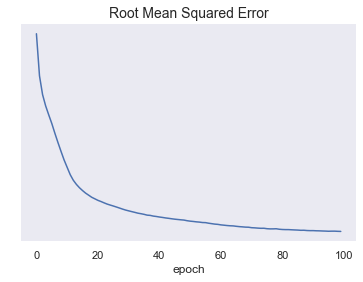

In [34]:
plt.plot(history.history['mean_squared_error'])
sns.despine(left = True, bottom = True)
sns.set_theme(style = "dark")
plt.tick_params(labelleft=False, left=False)
plt.title('Root Mean Squared Error', fontsize = 14)
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.ylabel(' ')
plt.show()

### Model Training

In [43]:
mse_list_d = []

for i in range(100):
    # Split train-test data
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)
    
    # Train and fit model
    model = regression_model()
    print('\n\n\nTraining Model # ' , i+1 , '\n\n') # Print model number being trained
    model.fit(x_train, y_train, validation_split = 0.3, epochs = 100)
    print('\n')
    
    # Prediction and evaluation
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error for Training Model #', i+1 , ' = ', mse)
    
    # Append mse to mse_list
    mse_list_d.append(mse)




Training Model #  1 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 7s 15ms/sample - loss: 0.9685 - mean_squared_error: 0.9685 - val_loss: 0.9164 - val_mean_squared_error: 0.9164
Epoch 2/100
504/504 [==============================] - 0s 516us/sample - loss: 0.9253 - mean_squared_error: 0.9253 - val_loss: 0.8844 - val_mean_squared_error: 0.8844
Epoch 3/100
504/504 [==============================] - 0s 526us/sample - loss: 0.8920 - mean_squared_error: 0.8920 - val_loss: 0.8540 - val_mean_squared_error: 0.8540
Epoch 4/100
504/504 [==============================] - 0s 503us/sample - loss: 0.8618 - mean_squared_error: 0.8618 - val_loss: 0.8225 - val_mean_squared_error: 0.8225
Epoch 5/100
504/504 [==============================] - 0s 508us/sample - loss: 0.8301 - mean_squared_error: 0.8301 - val_loss: 0.7939 - val_mean_squared_error: 0.7939
Epoch 6/100
504/504 [==============================] - 0s 487us/sample - loss: 0.8006 - mean_s

Epoch 98/100
504/504 [==============================] - 0s 451us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.1817 - val_mean_squared_error: 0.1817
Epoch 99/100
504/504 [==============================] - 0s 449us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 100/100
504/504 [==============================] - 0s 446us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.1824 - val_mean_squared_error: 0.1824


Mean Squared Error for Training Model # 1  =  0.16207322031484847



Training Model #  2 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 7s 14ms/sample - loss: 1.0679 - mean_squared_error: 1.0679 - val_loss: 1.1320 - val_mean_squared_error: 1.1320
Epoch 2/100
504/504 [==============================] - 0s 448us/sample - loss: 0.9916 - mean_squared_error: 0.9916 - val_loss: 1.0564 - val_mean_squared_error: 1.0564
Epoch 3/100
504/504 [=

Epoch 46/100
504/504 [==============================] - 0s 444us/sample - loss: 0.2440 - mean_squared_error: 0.2440 - val_loss: 0.2517 - val_mean_squared_error: 0.2517
Epoch 47/100
504/504 [==============================] - 0s 452us/sample - loss: 0.2376 - mean_squared_error: 0.2376 - val_loss: 0.2482 - val_mean_squared_error: 0.2482
Epoch 48/100
504/504 [==============================] - 0s 449us/sample - loss: 0.2323 - mean_squared_error: 0.2323 - val_loss: 0.2408 - val_mean_squared_error: 0.2408
Epoch 49/100
504/504 [==============================] - 0s 446us/sample - loss: 0.2246 - mean_squared_error: 0.2246 - val_loss: 0.2356 - val_mean_squared_error: 0.2356
Epoch 50/100
504/504 [==============================] - 0s 452us/sample - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 51/100
504/504 [==============================] - 0s 449us/sample - loss: 0.2132 - mean_squared_error: 0.2132 - val_loss: 0.2239 - val_mean_squared_error:

Epoch 95/100
504/504 [==============================] - 0s 450us/sample - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 96/100
504/504 [==============================] - 0s 448us/sample - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 97/100
504/504 [==============================] - 0s 448us/sample - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 98/100
504/504 [==============================] - 0s 453us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch 99/100
504/504 [==============================] - 0s 440us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 100/100
504/504 [==============================] - 0s 452us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1296 - val_mean_squared_error

Epoch 43/100
504/504 [==============================] - 0s 453us/sample - loss: 0.2122 - mean_squared_error: 0.2122 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 44/100
504/504 [==============================] - 0s 454us/sample - loss: 0.2080 - mean_squared_error: 0.2080 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 45/100
504/504 [==============================] - 0s 463us/sample - loss: 0.2051 - mean_squared_error: 0.2051 - val_loss: 0.2609 - val_mean_squared_error: 0.2609
Epoch 46/100
504/504 [==============================] - 0s 446us/sample - loss: 0.2011 - mean_squared_error: 0.2011 - val_loss: 0.2594 - val_mean_squared_error: 0.2594
Epoch 47/100
504/504 [==============================] - 0s 452us/sample - loss: 0.1987 - mean_squared_error: 0.1987 - val_loss: 0.2601 - val_mean_squared_error: 0.2601
Epoch 48/100
504/504 [==============================] - 0s 458us/sample - loss: 0.1963 - mean_squared_error: 0.1963 - val_loss: 0.2561 - val_mean_squared_error:

Epoch 92/100
504/504 [==============================] - 0s 441us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.2414 - val_mean_squared_error: 0.2414
Epoch 93/100
504/504 [==============================] - 0s 445us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.2439 - val_mean_squared_error: 0.2439
Epoch 94/100
504/504 [==============================] - 0s 460us/sample - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.2382 - val_mean_squared_error: 0.2382
Epoch 95/100
504/504 [==============================] - 0s 457us/sample - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 96/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.2447 - val_mean_squared_error: 0.2447
Epoch 97/100
504/504 [==============================] - 0s 452us/sample - loss: 0.1065 - mean_squared_error: 0.1065 - val_loss: 0.2421 - val_mean_squared_error:

Epoch 40/100
504/504 [==============================] - 0s 553us/sample - loss: 0.1528 - mean_squared_error: 0.1528 - val_loss: 0.2180 - val_mean_squared_error: 0.2180
Epoch 41/100
504/504 [==============================] - 0s 480us/sample - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 42/100
504/504 [==============================] - 0s 610us/sample - loss: 0.1467 - mean_squared_error: 0.1467 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 43/100
504/504 [==============================] - 0s 820us/sample - loss: 0.1444 - mean_squared_error: 0.1444 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 44/100
504/504 [==============================] - 0s 507us/sample - loss: 0.1413 - mean_squared_error: 0.1413 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 45/100
504/504 [==============================] - 0s 766us/sample - loss: 0.1399 - mean_squared_error: 0.1399 - val_loss: 0.2080 - val_mean_squared_error:

Epoch 89/100
504/504 [==============================] - 0s 467us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.1718 - val_mean_squared_error: 0.1718
Epoch 90/100
504/504 [==============================] - 0s 460us/sample - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1725 - val_mean_squared_error: 0.1725
Epoch 91/100
504/504 [==============================] - 0s 468us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1745 - val_mean_squared_error: 0.1745
Epoch 92/100
504/504 [==============================] - 0s 456us/sample - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.1779 - val_mean_squared_error: 0.1779
Epoch 93/100
504/504 [==============================] - 0s 455us/sample - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1678 - val_mean_squared_error: 0.1678
Epoch 94/100
504/504 [==============================] - 0s 468us/sample - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.1740 - val_mean_squared_error:

Epoch 37/100
504/504 [==============================] - 0s 422us/sample - loss: 0.1717 - mean_squared_error: 0.1717 - val_loss: 0.2847 - val_mean_squared_error: 0.2847
Epoch 38/100
504/504 [==============================] - 0s 440us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.2905 - val_mean_squared_error: 0.2905
Epoch 39/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1637 - mean_squared_error: 0.1637 - val_loss: 0.2938 - val_mean_squared_error: 0.2938
Epoch 40/100
504/504 [==============================] - 0s 460us/sample - loss: 0.1594 - mean_squared_error: 0.1594 - val_loss: 0.2814 - val_mean_squared_error: 0.2814
Epoch 41/100
504/504 [==============================] - 0s 465us/sample - loss: 0.1570 - mean_squared_error: 0.1570 - val_loss: 0.2845 - val_mean_squared_error: 0.2845
Epoch 42/100
504/504 [==============================] - 0s 473us/sample - loss: 0.1538 - mean_squared_error: 0.1538 - val_loss: 0.2799 - val_mean_squared_error:

Epoch 86/100
504/504 [==============================] - 0s 458us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.2627 - val_mean_squared_error: 0.2627
Epoch 87/100
504/504 [==============================] - 0s 470us/sample - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 88/100
504/504 [==============================] - 0s 466us/sample - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 89/100
504/504 [==============================] - 0s 459us/sample - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.2557 - val_mean_squared_error: 0.2557
Epoch 90/100
504/504 [==============================] - 0s 449us/sample - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.2565 - val_mean_squared_error: 0.2565
Epoch 91/100
504/504 [==============================] - 0s 462us/sample - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.2554 - val_mean_squared_error:

Epoch 34/100
504/504 [==============================] - 0s 477us/sample - loss: 0.2122 - mean_squared_error: 0.2122 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 35/100
504/504 [==============================] - 0s 464us/sample - loss: 0.2054 - mean_squared_error: 0.2054 - val_loss: 0.2606 - val_mean_squared_error: 0.2606
Epoch 36/100
504/504 [==============================] - 0s 464us/sample - loss: 0.2006 - mean_squared_error: 0.2006 - val_loss: 0.2625 - val_mean_squared_error: 0.2625
Epoch 37/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1958 - mean_squared_error: 0.1958 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 38/100
504/504 [==============================] - 0s 459us/sample - loss: 0.1914 - mean_squared_error: 0.1914 - val_loss: 0.2516 - val_mean_squared_error: 0.2516
Epoch 39/100
504/504 [==============================] - 0s 465us/sample - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 0.2517 - val_mean_squared_error:

Epoch 83/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.1914 - val_mean_squared_error: 0.1914
Epoch 84/100
504/504 [==============================] - 0s 453us/sample - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.1927 - val_mean_squared_error: 0.1927
Epoch 85/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1087 - mean_squared_error: 0.1087 - val_loss: 0.1914 - val_mean_squared_error: 0.1914
Epoch 86/100
504/504 [==============================] - 0s 458us/sample - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 87/100
504/504 [==============================] - 0s 457us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.1912 - val_mean_squared_error: 0.1912
Epoch 88/100
504/504 [==============================] - 0s 474us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.1915 - val_mean_squared_error:

Epoch 31/100
504/504 [==============================] - 0s 457us/sample - loss: 0.1937 - mean_squared_error: 0.1937 - val_loss: 0.2343 - val_mean_squared_error: 0.2343
Epoch 32/100
504/504 [==============================] - 0s 461us/sample - loss: 0.1929 - mean_squared_error: 0.1929 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 33/100
504/504 [==============================] - 0s 468us/sample - loss: 0.1870 - mean_squared_error: 0.1870 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 34/100
504/504 [==============================] - 0s 470us/sample - loss: 0.1839 - mean_squared_error: 0.1839 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 35/100
504/504 [==============================] - 0s 474us/sample - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 36/100
504/504 [==============================] - 0s 461us/sample - loss: 0.1812 - mean_squared_error: 0.1812 - val_loss: 0.2252 - val_mean_squared_error:

Epoch 80/100
504/504 [==============================] - 0s 476us/sample - loss: 0.1240 - mean_squared_error: 0.1240 - val_loss: 0.1887 - val_mean_squared_error: 0.1887
Epoch 81/100
504/504 [==============================] - 0s 461us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.1876 - val_mean_squared_error: 0.1876
Epoch 82/100
504/504 [==============================] - 0s 460us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.1925 - val_mean_squared_error: 0.1925
Epoch 83/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.1875 - val_mean_squared_error: 0.1875
Epoch 84/100
504/504 [==============================] - 0s 466us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.1849 - val_mean_squared_error: 0.1849
Epoch 85/100
504/504 [==============================] - 0s 455us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.1901 - val_mean_squared_error:

Epoch 28/100
504/504 [==============================] - 0s 482us/sample - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2780 - val_mean_squared_error: 0.2780
Epoch 29/100
504/504 [==============================] - 0s 461us/sample - loss: 0.2625 - mean_squared_error: 0.2625 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 30/100
504/504 [==============================] - 0s 467us/sample - loss: 0.2543 - mean_squared_error: 0.2543 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 31/100
504/504 [==============================] - 0s 466us/sample - loss: 0.2472 - mean_squared_error: 0.2472 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 32/100
504/504 [==============================] - 0s 477us/sample - loss: 0.2413 - mean_squared_error: 0.2413 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 33/100
504/504 [==============================] - 0s 468us/sample - loss: 0.2352 - mean_squared_error: 0.2352 - val_loss: 0.2609 - val_mean_squared_error:

Epoch 77/100
504/504 [==============================] - 0s 466us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 78/100
504/504 [==============================] - 0s 466us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1996 - val_mean_squared_error: 0.1996
Epoch 79/100
504/504 [==============================] - 0s 466us/sample - loss: 0.1188 - mean_squared_error: 0.1188 - val_loss: 0.2000 - val_mean_squared_error: 0.2000
Epoch 80/100
504/504 [==============================] - 0s 463us/sample - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 81/100
504/504 [==============================] - 0s 466us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.1996 - val_mean_squared_error: 0.1996
Epoch 82/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.1983 - val_mean_squared_error:

Epoch 25/100
504/504 [==============================] - 0s 470us/sample - loss: 0.3320 - mean_squared_error: 0.3320 - val_loss: 0.3868 - val_mean_squared_error: 0.3868
Epoch 26/100
504/504 [==============================] - 0s 458us/sample - loss: 0.3189 - mean_squared_error: 0.3189 - val_loss: 0.3766 - val_mean_squared_error: 0.3766
Epoch 27/100
504/504 [==============================] - 0s 470us/sample - loss: 0.3089 - mean_squared_error: 0.3089 - val_loss: 0.3693 - val_mean_squared_error: 0.3693
Epoch 28/100
504/504 [==============================] - 0s 457us/sample - loss: 0.2983 - mean_squared_error: 0.2983 - val_loss: 0.3646 - val_mean_squared_error: 0.3646
Epoch 29/100
504/504 [==============================] - 0s 471us/sample - loss: 0.2878 - mean_squared_error: 0.2878 - val_loss: 0.3557 - val_mean_squared_error: 0.3557
Epoch 30/100
504/504 [==============================] - 0s 466us/sample - loss: 0.2775 - mean_squared_error: 0.2775 - val_loss: 0.3486 - val_mean_squared_error:

Epoch 74/100
504/504 [==============================] - 0s 461us/sample - loss: 0.1203 - mean_squared_error: 0.1203 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 75/100
504/504 [==============================] - 0s 465us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 76/100
504/504 [==============================] - 0s 459us/sample - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 77/100
504/504 [==============================] - 0s 468us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.2204 - val_mean_squared_error: 0.2204
Epoch 78/100
504/504 [==============================] - 0s 467us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 79/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.2201 - val_mean_squared_error:

Epoch 22/100
504/504 [==============================] - 0s 514us/sample - loss: 0.4142 - mean_squared_error: 0.4142 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 23/100
504/504 [==============================] - 0s 425us/sample - loss: 0.3988 - mean_squared_error: 0.3988 - val_loss: 0.4257 - val_mean_squared_error: 0.4257
Epoch 24/100
504/504 [==============================] - 0s 435us/sample - loss: 0.3877 - mean_squared_error: 0.3877 - val_loss: 0.4155 - val_mean_squared_error: 0.4155
Epoch 25/100
504/504 [==============================] - 0s 437us/sample - loss: 0.3741 - mean_squared_error: 0.3741 - val_loss: 0.4068 - val_mean_squared_error: 0.4068
Epoch 26/100
504/504 [==============================] - 0s 451us/sample - loss: 0.3614 - mean_squared_error: 0.3614 - val_loss: 0.3978 - val_mean_squared_error: 0.3978
Epoch 27/100
504/504 [==============================] - 0s 582us/sample - loss: 0.3483 - mean_squared_error: 0.3483 - val_loss: 0.3893 - val_mean_squared_error:

Epoch 71/100
504/504 [==============================] - 0s 477us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.2201 - val_mean_squared_error: 0.2201
Epoch 72/100
504/504 [==============================] - 0s 491us/sample - loss: 0.1476 - mean_squared_error: 0.1476 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 73/100
504/504 [==============================] - 0s 484us/sample - loss: 0.1476 - mean_squared_error: 0.1476 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 74/100
504/504 [==============================] - 0s 501us/sample - loss: 0.1463 - mean_squared_error: 0.1463 - val_loss: 0.2175 - val_mean_squared_error: 0.2175
Epoch 75/100
504/504 [==============================] - 0s 479us/sample - loss: 0.1445 - mean_squared_error: 0.1445 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 76/100
504/504 [==============================] - 0s 488us/sample - loss: 0.1424 - mean_squared_error: 0.1424 - val_loss: 0.2137 - val_mean_squared_error:

Epoch 19/100
504/504 [==============================] - 0s 481us/sample - loss: 0.2745 - mean_squared_error: 0.2745 - val_loss: 0.3678 - val_mean_squared_error: 0.3678
Epoch 20/100
504/504 [==============================] - 0s 470us/sample - loss: 0.2634 - mean_squared_error: 0.2634 - val_loss: 0.3605 - val_mean_squared_error: 0.3605
Epoch 21/100
504/504 [==============================] - 0s 493us/sample - loss: 0.2536 - mean_squared_error: 0.2536 - val_loss: 0.3547 - val_mean_squared_error: 0.3547
Epoch 22/100
504/504 [==============================] - 0s 519us/sample - loss: 0.2450 - mean_squared_error: 0.2450 - val_loss: 0.3487 - val_mean_squared_error: 0.3487
Epoch 23/100
504/504 [==============================] - 0s 479us/sample - loss: 0.2366 - mean_squared_error: 0.2366 - val_loss: 0.3438 - val_mean_squared_error: 0.3438
Epoch 24/100
504/504 [==============================] - 0s 480us/sample - loss: 0.2303 - mean_squared_error: 0.2303 - val_loss: 0.3393 - val_mean_squared_error:

Epoch 68/100
504/504 [==============================] - 0s 478us/sample - loss: 0.1394 - mean_squared_error: 0.1394 - val_loss: 0.2582 - val_mean_squared_error: 0.2582
Epoch 69/100
504/504 [==============================] - 0s 483us/sample - loss: 0.1403 - mean_squared_error: 0.1403 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 70/100
504/504 [==============================] - 0s 484us/sample - loss: 0.1392 - mean_squared_error: 0.1392 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 71/100
504/504 [==============================] - 0s 492us/sample - loss: 0.1382 - mean_squared_error: 0.1382 - val_loss: 0.2549 - val_mean_squared_error: 0.2549
Epoch 72/100
504/504 [==============================] - 0s 490us/sample - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.2590 - val_mean_squared_error: 0.2590
Epoch 73/100
504/504 [==============================] - 0s 481us/sample - loss: 0.1351 - mean_squared_error: 0.1351 - val_loss: 0.2552 - val_mean_squared_error:

Epoch 16/100
504/504 [==============================] - 0s 486us/sample - loss: 0.3280 - mean_squared_error: 0.3280 - val_loss: 0.3059 - val_mean_squared_error: 0.3059
Epoch 17/100
504/504 [==============================] - 0s 485us/sample - loss: 0.3192 - mean_squared_error: 0.3192 - val_loss: 0.2986 - val_mean_squared_error: 0.2986
Epoch 18/100
504/504 [==============================] - 0s 481us/sample - loss: 0.3096 - mean_squared_error: 0.3096 - val_loss: 0.2911 - val_mean_squared_error: 0.2911
Epoch 19/100
504/504 [==============================] - 0s 479us/sample - loss: 0.3022 - mean_squared_error: 0.3022 - val_loss: 0.2835 - val_mean_squared_error: 0.2835
Epoch 20/100
504/504 [==============================] - 0s 486us/sample - loss: 0.2946 - mean_squared_error: 0.2946 - val_loss: 0.2777 - val_mean_squared_error: 0.2777
Epoch 21/100
504/504 [==============================] - 0s 499us/sample - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 0.2707 - val_mean_squared_error:

Epoch 65/100
504/504 [==============================] - 0s 516us/sample - loss: 0.1400 - mean_squared_error: 0.1400 - val_loss: 0.1814 - val_mean_squared_error: 0.1814
Epoch 66/100
504/504 [==============================] - 0s 511us/sample - loss: 0.1377 - mean_squared_error: 0.1377 - val_loss: 0.1770 - val_mean_squared_error: 0.1770
Epoch 67/100
504/504 [==============================] - 0s 505us/sample - loss: 0.1363 - mean_squared_error: 0.1363 - val_loss: 0.1785 - val_mean_squared_error: 0.1785
Epoch 68/100
504/504 [==============================] - 0s 518us/sample - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 69/100
504/504 [==============================] - 0s 531us/sample - loss: 0.1348 - mean_squared_error: 0.1348 - val_loss: 0.1790 - val_mean_squared_error: 0.1790
Epoch 70/100
504/504 [==============================] - 0s 479us/sample - loss: 0.1327 - mean_squared_error: 0.1327 - val_loss: 0.1777 - val_mean_squared_error:

Epoch 13/100
504/504 [==============================] - 0s 490us/sample - loss: 0.3919 - mean_squared_error: 0.3919 - val_loss: 0.3881 - val_mean_squared_error: 0.3881
Epoch 14/100
504/504 [==============================] - 0s 506us/sample - loss: 0.3773 - mean_squared_error: 0.3773 - val_loss: 0.3812 - val_mean_squared_error: 0.3812
Epoch 15/100
504/504 [==============================] - 0s 505us/sample - loss: 0.3640 - mean_squared_error: 0.3640 - val_loss: 0.3712 - val_mean_squared_error: 0.3712
Epoch 16/100
504/504 [==============================] - 0s 505us/sample - loss: 0.3524 - mean_squared_error: 0.3524 - val_loss: 0.3666 - val_mean_squared_error: 0.3666
Epoch 17/100
504/504 [==============================] - 0s 526us/sample - loss: 0.3430 - mean_squared_error: 0.3430 - val_loss: 0.3605 - val_mean_squared_error: 0.3605
Epoch 18/100
504/504 [==============================] - 0s 494us/sample - loss: 0.3307 - mean_squared_error: 0.3307 - val_loss: 0.3528 - val_mean_squared_error:

Epoch 62/100
504/504 [==============================] - 0s 511us/sample - loss: 0.1489 - mean_squared_error: 0.1489 - val_loss: 0.2145 - val_mean_squared_error: 0.2145
Epoch 63/100
504/504 [==============================] - 0s 483us/sample - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.2119 - val_mean_squared_error: 0.2119
Epoch 64/100
504/504 [==============================] - 0s 492us/sample - loss: 0.1458 - mean_squared_error: 0.1458 - val_loss: 0.2115 - val_mean_squared_error: 0.2115
Epoch 65/100
504/504 [==============================] - 0s 483us/sample - loss: 0.1440 - mean_squared_error: 0.1440 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 66/100
504/504 [==============================] - 0s 493us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.2103 - val_mean_squared_error: 0.2103
Epoch 67/100
504/504 [==============================] - 0s 490us/sample - loss: 0.1415 - mean_squared_error: 0.1415 - val_loss: 0.2114 - val_mean_squared_error:

Epoch 10/100
504/504 [==============================] - 0s 517us/sample - loss: 0.6017 - mean_squared_error: 0.6017 - val_loss: 0.5678 - val_mean_squared_error: 0.5678
Epoch 11/100
504/504 [==============================] - 0s 509us/sample - loss: 0.5724 - mean_squared_error: 0.5724 - val_loss: 0.5335 - val_mean_squared_error: 0.5335
Epoch 12/100
504/504 [==============================] - 0s 502us/sample - loss: 0.5430 - mean_squared_error: 0.5430 - val_loss: 0.5027 - val_mean_squared_error: 0.5027
Epoch 13/100
504/504 [==============================] - 0s 490us/sample - loss: 0.5197 - mean_squared_error: 0.5197 - val_loss: 0.4722 - val_mean_squared_error: 0.4722
Epoch 14/100
504/504 [==============================] - 0s 512us/sample - loss: 0.4934 - mean_squared_error: 0.4934 - val_loss: 0.4462 - val_mean_squared_error: 0.4462
Epoch 15/100
504/504 [==============================] - 0s 514us/sample - loss: 0.4717 - mean_squared_error: 0.4717 - val_loss: 0.4177 - val_mean_squared_error:

Epoch 59/100
504/504 [==============================] - 0s 622us/sample - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1878 - val_mean_squared_error: 0.1878
Epoch 60/100
504/504 [==============================] - 0s 505us/sample - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1850 - val_mean_squared_error: 0.1850
Epoch 61/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 62/100
504/504 [==============================] - 0s 510us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.1847 - val_mean_squared_error: 0.1847
Epoch 63/100
504/504 [==============================] - 0s 496us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.1823 - val_mean_squared_error: 0.1823
Epoch 64/100
504/504 [==============================] - 0s 510us/sample - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.1839 - val_mean_squared_error:

Epoch 7/100
504/504 [==============================] - 0s 519us/sample - loss: 0.5579 - mean_squared_error: 0.5579 - val_loss: 0.5404 - val_mean_squared_error: 0.5404
Epoch 8/100
504/504 [==============================] - 0s 540us/sample - loss: 0.5220 - mean_squared_error: 0.5220 - val_loss: 0.5025 - val_mean_squared_error: 0.5025
Epoch 9/100
504/504 [==============================] - 0s 531us/sample - loss: 0.4899 - mean_squared_error: 0.4899 - val_loss: 0.4766 - val_mean_squared_error: 0.4766
Epoch 10/100
504/504 [==============================] - 0s 548us/sample - loss: 0.4668 - mean_squared_error: 0.4668 - val_loss: 0.4546 - val_mean_squared_error: 0.4546
Epoch 11/100
504/504 [==============================] - 0s 561us/sample - loss: 0.4490 - mean_squared_error: 0.4490 - val_loss: 0.4373 - val_mean_squared_error: 0.4373
Epoch 12/100
504/504 [==============================] - 0s 541us/sample - loss: 0.4297 - mean_squared_error: 0.4297 - val_loss: 0.4228 - val_mean_squared_error: 0.

Epoch 56/100
504/504 [==============================] - 0s 498us/sample - loss: 0.1429 - mean_squared_error: 0.1429 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 57/100
504/504 [==============================] - 0s 473us/sample - loss: 0.1404 - mean_squared_error: 0.1404 - val_loss: 0.2017 - val_mean_squared_error: 0.2017
Epoch 58/100
504/504 [==============================] - 0s 483us/sample - loss: 0.1382 - mean_squared_error: 0.1382 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 59/100
504/504 [==============================] - 0s 486us/sample - loss: 0.1359 - mean_squared_error: 0.1359 - val_loss: 0.2015 - val_mean_squared_error: 0.2015
Epoch 60/100
504/504 [==============================] - 0s 484us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 0.2008 - val_mean_squared_error: 0.2008
Epoch 61/100
504/504 [==============================] - 0s 516us/sample - loss: 0.1315 - mean_squared_error: 0.1315 - val_loss: 0.2002 - val_mean_squared_error:

Epoch 4/100
504/504 [==============================] - 0s 499us/sample - loss: 0.8777 - mean_squared_error: 0.8777 - val_loss: 0.9091 - val_mean_squared_error: 0.9091
Epoch 5/100
504/504 [==============================] - 0s 507us/sample - loss: 0.8356 - mean_squared_error: 0.8356 - val_loss: 0.8697 - val_mean_squared_error: 0.8697
Epoch 6/100
504/504 [==============================] - 0s 524us/sample - loss: 0.7950 - mean_squared_error: 0.7950 - val_loss: 0.8341 - val_mean_squared_error: 0.8341
Epoch 7/100
504/504 [==============================] - 0s 488us/sample - loss: 0.7630 - mean_squared_error: 0.7630 - val_loss: 0.7954 - val_mean_squared_error: 0.7954
Epoch 8/100
504/504 [==============================] - 0s 486us/sample - loss: 0.7257 - mean_squared_error: 0.7257 - val_loss: 0.7626 - val_mean_squared_error: 0.7626
Epoch 9/100
504/504 [==============================] - 0s 502us/sample - loss: 0.6917 - mean_squared_error: 0.6917 - val_loss: 0.7301 - val_mean_squared_error: 0.730

Epoch 53/100
504/504 [==============================] - 0s 509us/sample - loss: 0.1470 - mean_squared_error: 0.1470 - val_loss: 0.2537 - val_mean_squared_error: 0.2537
Epoch 54/100
504/504 [==============================] - 0s 504us/sample - loss: 0.1436 - mean_squared_error: 0.1436 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 55/100
504/504 [==============================] - 0s 508us/sample - loss: 0.1407 - mean_squared_error: 0.1407 - val_loss: 0.2496 - val_mean_squared_error: 0.2496
Epoch 56/100
504/504 [==============================] - 0s 493us/sample - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 57/100
504/504 [==============================] - 0s 490us/sample - loss: 0.1364 - mean_squared_error: 0.1364 - val_loss: 0.2531 - val_mean_squared_error: 0.2531
Epoch 58/100
504/504 [==============================] - 0s 516us/sample - loss: 0.1329 - mean_squared_error: 0.1329 - val_loss: 0.2506 - val_mean_squared_error:

Epoch 1/100
504/504 [==============================] - 9s 17ms/sample - loss: 1.3673 - mean_squared_error: 1.3673 - val_loss: 1.2813 - val_mean_squared_error: 1.2813
Epoch 2/100
504/504 [==============================] - 0s 504us/sample - loss: 1.1702 - mean_squared_error: 1.1702 - val_loss: 1.1330 - val_mean_squared_error: 1.1330
Epoch 3/100
504/504 [==============================] - 0s 566us/sample - loss: 1.0420 - mean_squared_error: 1.0420 - val_loss: 1.0306 - val_mean_squared_error: 1.0306
Epoch 4/100
504/504 [==============================] - 0s 497us/sample - loss: 0.9477 - mean_squared_error: 0.9477 - val_loss: 0.9493 - val_mean_squared_error: 0.9493
Epoch 5/100
504/504 [==============================] - 0s 527us/sample - loss: 0.8702 - mean_squared_error: 0.8702 - val_loss: 0.8697 - val_mean_squared_error: 0.8697
Epoch 6/100
504/504 [==============================] - 0s 528us/sample - loss: 0.7936 - mean_squared_error: 0.7936 - val_loss: 0.7935 - val_mean_squared_error: 0.7935

Epoch 50/100
504/504 [==============================] - 0s 489us/sample - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.3014 - val_mean_squared_error: 0.3014
Epoch 51/100
504/504 [==============================] - 0s 492us/sample - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.3060 - val_mean_squared_error: 0.3060
Epoch 52/100
504/504 [==============================] - 0s 499us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - val_loss: 0.3007 - val_mean_squared_error: 0.3007
Epoch 53/100
504/504 [==============================] - 0s 494us/sample - loss: 0.1700 - mean_squared_error: 0.1700 - val_loss: 0.3017 - val_mean_squared_error: 0.3017
Epoch 54/100
504/504 [==============================] - 0s 488us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - val_loss: 0.3011 - val_mean_squared_error: 0.3011
Epoch 55/100
504/504 [==============================] - 0s 478us/sample - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 0.2951 - val_mean_squared_error:

Epoch 99/100
504/504 [==============================] - 0s 492us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.2518 - val_mean_squared_error: 0.2518
Epoch 100/100
504/504 [==============================] - 0s 486us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2544 - val_mean_squared_error: 0.2544


Mean Squared Error for Training Model # 17  =  0.17902231606255872



Training Model #  18 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 8s 17ms/sample - loss: 1.0956 - mean_squared_error: 1.0956 - val_loss: 1.1165 - val_mean_squared_error: 1.1165
Epoch 2/100
504/504 [==============================] - 0s 517us/sample - loss: 1.0408 - mean_squared_error: 1.0408 - val_loss: 1.0744 - val_mean_squared_error: 1.0744
Epoch 3/100
504/504 [==============================] - 0s 501us/sample - loss: 1.0094 - mean_squared_error: 1.0094 - val_loss: 1.0480 - val_mean_squared_error: 1.0480
Epoch 4/100
504/504 [

Epoch 47/100
504/504 [==============================] - 0s 491us/sample - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 48/100
504/504 [==============================] - 0s 490us/sample - loss: 0.1352 - mean_squared_error: 0.1352 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch 49/100
504/504 [==============================] - 0s 495us/sample - loss: 0.1332 - mean_squared_error: 0.1332 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 50/100
504/504 [==============================] - 0s 490us/sample - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1981 - val_mean_squared_error: 0.1981
Epoch 51/100
504/504 [==============================] - 0s 492us/sample - loss: 0.1302 - mean_squared_error: 0.1302 - val_loss: 0.1974 - val_mean_squared_error: 0.1974
Epoch 52/100
504/504 [==============================] - 0s 494us/sample - loss: 0.1298 - mean_squared_error: 0.1298 - val_loss: 0.2005 - val_mean_squared_error:

Epoch 96/100
504/504 [==============================] - 0s 495us/sample - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 97/100
504/504 [==============================] - 0s 490us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.1625 - val_mean_squared_error: 0.1625
Epoch 98/100
504/504 [==============================] - 0s 490us/sample - loss: 0.0885 - mean_squared_error: 0.0885 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 99/100
504/504 [==============================] - 0s 488us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.1635 - val_mean_squared_error: 0.1635
Epoch 100/100
504/504 [==============================] - 0s 490us/sample - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.1669 - val_mean_squared_error: 0.1669


Mean Squared Error for Training Model # 18  =  0.15153708630744603



Training Model #  19 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/5

Epoch 44/100
504/504 [==============================] - 0s 495us/sample - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 0.2128 - val_mean_squared_error: 0.2128
Epoch 45/100
504/504 [==============================] - 0s 490us/sample - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.2105 - val_mean_squared_error: 0.2105
Epoch 46/100
504/504 [==============================] - 0s 485us/sample - loss: 0.1567 - mean_squared_error: 0.1567 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 47/100
504/504 [==============================] - 0s 481us/sample - loss: 0.1528 - mean_squared_error: 0.1528 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 48/100
504/504 [==============================] - 0s 497us/sample - loss: 0.1508 - mean_squared_error: 0.1508 - val_loss: 0.2019 - val_mean_squared_error: 0.2019
Epoch 49/100
504/504 [==============================] - 0s 483us/sample - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.2029 - val_mean_squared_error:

Epoch 93/100
504/504 [==============================] - 0s 483us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.1864 - val_mean_squared_error: 0.1864
Epoch 94/100
504/504 [==============================] - 0s 493us/sample - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.1881 - val_mean_squared_error: 0.1881
Epoch 95/100
504/504 [==============================] - 0s 485us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.1804 - val_mean_squared_error: 0.1804
Epoch 96/100
504/504 [==============================] - 0s 481us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.1846 - val_mean_squared_error: 0.1846
Epoch 97/100
504/504 [==============================] - 0s 513us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1820 - val_mean_squared_error: 0.1820
Epoch 98/100
504/504 [==============================] - 0s 493us/sample - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.1821 - val_mean_squared_error:

Epoch 41/100
504/504 [==============================] - 0s 539us/sample - loss: 0.2669 - mean_squared_error: 0.2669 - val_loss: 0.3095 - val_mean_squared_error: 0.3095
Epoch 42/100
504/504 [==============================] - 0s 568us/sample - loss: 0.2612 - mean_squared_error: 0.2612 - val_loss: 0.3056 - val_mean_squared_error: 0.3056
Epoch 43/100
504/504 [==============================] - 1s 1ms/sample - loss: 0.2548 - mean_squared_error: 0.2548 - val_loss: 0.3012 - val_mean_squared_error: 0.3012
Epoch 44/100
504/504 [==============================] - 0s 712us/sample - loss: 0.2490 - mean_squared_error: 0.2490 - val_loss: 0.2969 - val_mean_squared_error: 0.2969
Epoch 45/100
504/504 [==============================] - 0s 547us/sample - loss: 0.2455 - mean_squared_error: 0.2455 - val_loss: 0.2917 - val_mean_squared_error: 0.2917
Epoch 46/100
504/504 [==============================] - 0s 592us/sample - loss: 0.2388 - mean_squared_error: 0.2388 - val_loss: 0.2880 - val_mean_squared_error: 0

Epoch 90/100
504/504 [==============================] - 0s 521us/sample - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 91/100
504/504 [==============================] - 0s 492us/sample - loss: 0.1267 - mean_squared_error: 0.1267 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 92/100
504/504 [==============================] - 0s 498us/sample - loss: 0.1255 - mean_squared_error: 0.1255 - val_loss: 0.2092 - val_mean_squared_error: 0.2092
Epoch 93/100
504/504 [==============================] - 0s 486us/sample - loss: 0.1249 - mean_squared_error: 0.1249 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 94/100
504/504 [==============================] - 0s 509us/sample - loss: 0.1255 - mean_squared_error: 0.1255 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 95/100
504/504 [==============================] - 0s 498us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.2132 - val_mean_squared_error:

Epoch 38/100
504/504 [==============================] - 0s 519us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.2428 - val_mean_squared_error: 0.2428
Epoch 39/100
504/504 [==============================] - 0s 494us/sample - loss: 0.1819 - mean_squared_error: 0.1819 - val_loss: 0.2417 - val_mean_squared_error: 0.2417
Epoch 40/100
504/504 [==============================] - 0s 503us/sample - loss: 0.1776 - mean_squared_error: 0.1776 - val_loss: 0.2375 - val_mean_squared_error: 0.2375
Epoch 41/100
504/504 [==============================] - 0s 498us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.2321 - val_mean_squared_error: 0.2321
Epoch 42/100
504/504 [==============================] - 0s 506us/sample - loss: 0.1721 - mean_squared_error: 0.1721 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 43/100
504/504 [==============================] - 0s 491us/sample - loss: 0.1661 - mean_squared_error: 0.1661 - val_loss: 0.2261 - val_mean_squared_error:

Epoch 87/100
504/504 [==============================] - 0s 510us/sample - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.1779 - val_mean_squared_error: 0.1779
Epoch 88/100
504/504 [==============================] - 0s 498us/sample - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.1841 - val_mean_squared_error: 0.1841
Epoch 89/100
504/504 [==============================] - 0s 498us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1755 - val_mean_squared_error: 0.1755
Epoch 90/100
504/504 [==============================] - 0s 510us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.1845 - val_mean_squared_error: 0.1845
Epoch 91/100
504/504 [==============================] - 0s 506us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.1770 - val_mean_squared_error: 0.1770
Epoch 92/100
504/504 [==============================] - 0s 505us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.1781 - val_mean_squared_error:

Epoch 35/100
504/504 [==============================] - 0s 460us/sample - loss: 0.2093 - mean_squared_error: 0.2093 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 36/100
504/504 [==============================] - 0s 459us/sample - loss: 0.2044 - mean_squared_error: 0.2044 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 37/100
504/504 [==============================] - 0s 457us/sample - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 38/100
504/504 [==============================] - 0s 464us/sample - loss: 0.1968 - mean_squared_error: 0.1968 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 39/100
504/504 [==============================] - 0s 458us/sample - loss: 0.1939 - mean_squared_error: 0.1939 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 40/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1900 - mean_squared_error: 0.1900 - val_loss: 0.2282 - val_mean_squared_error:

Epoch 84/100
504/504 [==============================] - 0s 463us/sample - loss: 0.1331 - mean_squared_error: 0.1331 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 85/100
504/504 [==============================] - 0s 460us/sample - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.2358 - val_mean_squared_error: 0.2358
Epoch 86/100
504/504 [==============================] - 0s 460us/sample - loss: 0.1316 - mean_squared_error: 0.1316 - val_loss: 0.2307 - val_mean_squared_error: 0.2307
Epoch 87/100
504/504 [==============================] - 0s 461us/sample - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.2351 - val_mean_squared_error: 0.2351
Epoch 88/100
504/504 [==============================] - 0s 461us/sample - loss: 0.1319 - mean_squared_error: 0.1319 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 89/100
504/504 [==============================] - 0s 459us/sample - loss: 0.1289 - mean_squared_error: 0.1289 - val_loss: 0.2328 - val_mean_squared_error:

Epoch 32/100
504/504 [==============================] - 0s 464us/sample - loss: 0.2238 - mean_squared_error: 0.2238 - val_loss: 0.2383 - val_mean_squared_error: 0.2383
Epoch 33/100
504/504 [==============================] - 0s 459us/sample - loss: 0.2154 - mean_squared_error: 0.2154 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 34/100
504/504 [==============================] - 0s 460us/sample - loss: 0.2102 - mean_squared_error: 0.2102 - val_loss: 0.2364 - val_mean_squared_error: 0.2364
Epoch 35/100
504/504 [==============================] - 0s 455us/sample - loss: 0.2053 - mean_squared_error: 0.2053 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 36/100
504/504 [==============================] - 0s 462us/sample - loss: 0.2015 - mean_squared_error: 0.2015 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 37/100
504/504 [==============================] - 0s 459us/sample - loss: 0.1991 - mean_squared_error: 0.1991 - val_loss: 0.2277 - val_mean_squared_error:

Epoch 81/100
504/504 [==============================] - 0s 474us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 82/100
504/504 [==============================] - 0s 464us/sample - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.1920 - val_mean_squared_error: 0.1920
Epoch 83/100
504/504 [==============================] - 0s 467us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.1935 - val_mean_squared_error: 0.1935
Epoch 84/100
504/504 [==============================] - 0s 470us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.1917 - val_mean_squared_error: 0.1917
Epoch 85/100
504/504 [==============================] - 0s 464us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.1940 - val_mean_squared_error: 0.1940
Epoch 86/100
504/504 [==============================] - 0s 457us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.1926 - val_mean_squared_error:

Epoch 29/100
504/504 [==============================] - 0s 480us/sample - loss: 0.2231 - mean_squared_error: 0.2231 - val_loss: 0.2775 - val_mean_squared_error: 0.2775
Epoch 30/100
504/504 [==============================] - 0s 466us/sample - loss: 0.2173 - mean_squared_error: 0.2173 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 31/100
504/504 [==============================] - 0s 472us/sample - loss: 0.2123 - mean_squared_error: 0.2123 - val_loss: 0.2763 - val_mean_squared_error: 0.2763
Epoch 32/100
504/504 [==============================] - 0s 463us/sample - loss: 0.2067 - mean_squared_error: 0.2067 - val_loss: 0.2716 - val_mean_squared_error: 0.2716
Epoch 33/100
504/504 [==============================] - 0s 466us/sample - loss: 0.2024 - mean_squared_error: 0.2024 - val_loss: 0.2701 - val_mean_squared_error: 0.2701
Epoch 34/100
504/504 [==============================] - 0s 470us/sample - loss: 0.1990 - mean_squared_error: 0.1990 - val_loss: 0.2720 - val_mean_squared_error:

Epoch 78/100
504/504 [==============================] - 0s 457us/sample - loss: 0.1432 - mean_squared_error: 0.1432 - val_loss: 0.2396 - val_mean_squared_error: 0.2396
Epoch 79/100
504/504 [==============================] - 0s 456us/sample - loss: 0.1445 - mean_squared_error: 0.1445 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 80/100
504/504 [==============================] - 0s 462us/sample - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.2341 - val_mean_squared_error: 0.2341
Epoch 81/100
504/504 [==============================] - 0s 460us/sample - loss: 0.1413 - mean_squared_error: 0.1413 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 82/100
504/504 [==============================] - 0s 456us/sample - loss: 0.1405 - mean_squared_error: 0.1405 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 83/100
504/504 [==============================] - 0s 458us/sample - loss: 0.1409 - mean_squared_error: 0.1409 - val_loss: 0.2340 - val_mean_squared_error:

Epoch 26/100
504/504 [==============================] - 0s 482us/sample - loss: 0.2499 - mean_squared_error: 0.2499 - val_loss: 0.2733 - val_mean_squared_error: 0.2733
Epoch 27/100
504/504 [==============================] - 0s 482us/sample - loss: 0.2414 - mean_squared_error: 0.2414 - val_loss: 0.2656 - val_mean_squared_error: 0.2656
Epoch 28/100
504/504 [==============================] - 0s 488us/sample - loss: 0.2344 - mean_squared_error: 0.2344 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 29/100
504/504 [==============================] - 0s 498us/sample - loss: 0.2269 - mean_squared_error: 0.2269 - val_loss: 0.2501 - val_mean_squared_error: 0.2501
Epoch 30/100
504/504 [==============================] - 0s 504us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.2479 - val_mean_squared_error: 0.2479
Epoch 31/100
504/504 [==============================] - 0s 495us/sample - loss: 0.2131 - mean_squared_error: 0.2131 - val_loss: 0.2406 - val_mean_squared_error:

Epoch 75/100
504/504 [==============================] - 0s 468us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1670 - val_mean_squared_error: 0.1670
Epoch 76/100
504/504 [==============================] - 0s 470us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1663 - val_mean_squared_error: 0.1663
Epoch 77/100
504/504 [==============================] - 0s 464us/sample - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.1713 - val_mean_squared_error: 0.1713
Epoch 78/100
504/504 [==============================] - 0s 459us/sample - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.1643 - val_mean_squared_error: 0.1643
Epoch 79/100
504/504 [==============================] - 0s 471us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.1680 - val_mean_squared_error: 0.1680
Epoch 80/100
504/504 [==============================] - 0s 465us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.1642 - val_mean_squared_error:

Epoch 23/100
504/504 [==============================] - 0s 476us/sample - loss: 0.2729 - mean_squared_error: 0.2729 - val_loss: 0.3417 - val_mean_squared_error: 0.3417
Epoch 24/100
504/504 [==============================] - 0s 475us/sample - loss: 0.2656 - mean_squared_error: 0.2656 - val_loss: 0.3373 - val_mean_squared_error: 0.3373
Epoch 25/100
504/504 [==============================] - 0s 469us/sample - loss: 0.2592 - mean_squared_error: 0.2592 - val_loss: 0.3352 - val_mean_squared_error: 0.3352
Epoch 26/100
504/504 [==============================] - 0s 465us/sample - loss: 0.2529 - mean_squared_error: 0.2529 - val_loss: 0.3334 - val_mean_squared_error: 0.3334
Epoch 27/100
504/504 [==============================] - 0s 472us/sample - loss: 0.2471 - mean_squared_error: 0.2471 - val_loss: 0.3296 - val_mean_squared_error: 0.3296
Epoch 28/100
504/504 [==============================] - 0s 470us/sample - loss: 0.2401 - mean_squared_error: 0.2401 - val_loss: 0.3260 - val_mean_squared_error:

Epoch 72/100
504/504 [==============================] - 0s 467us/sample - loss: 0.1349 - mean_squared_error: 0.1349 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 73/100
504/504 [==============================] - 0s 486us/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 74/100
504/504 [==============================] - 0s 505us/sample - loss: 0.1325 - mean_squared_error: 0.1325 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 75/100
504/504 [==============================] - 0s 488us/sample - loss: 0.1317 - mean_squared_error: 0.1317 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 76/100
504/504 [==============================] - 0s 485us/sample - loss: 0.1328 - mean_squared_error: 0.1328 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 77/100
504/504 [==============================] - 0s 487us/sample - loss: 0.1302 - mean_squared_error: 0.1302 - val_loss: 0.2268 - val_mean_squared_error:

Epoch 20/100
504/504 [==============================] - 0s 746us/sample - loss: 0.3263 - mean_squared_error: 0.3263 - val_loss: 0.3627 - val_mean_squared_error: 0.3627
Epoch 21/100
504/504 [==============================] - 0s 492us/sample - loss: 0.3098 - mean_squared_error: 0.3098 - val_loss: 0.3403 - val_mean_squared_error: 0.3403
Epoch 22/100
504/504 [==============================] - 1s 1ms/sample - loss: 0.2952 - mean_squared_error: 0.2952 - val_loss: 0.3243 - val_mean_squared_error: 0.3243
Epoch 23/100
504/504 [==============================] - 0s 595us/sample - loss: 0.2805 - mean_squared_error: 0.2805 - val_loss: 0.3143 - val_mean_squared_error: 0.3143
Epoch 24/100
504/504 [==============================] - 0s 771us/sample - loss: 0.2710 - mean_squared_error: 0.2710 - val_loss: 0.3088 - val_mean_squared_error: 0.3088
Epoch 25/100
504/504 [==============================] - 0s 763us/sample - loss: 0.2617 - mean_squared_error: 0.2617 - val_loss: 0.3040 - val_mean_squared_error: 0

Epoch 69/100
504/504 [==============================] - 0s 565us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.2313 - val_mean_squared_error: 0.2313
Epoch 70/100
504/504 [==============================] - 0s 536us/sample - loss: 0.1439 - mean_squared_error: 0.1439 - val_loss: 0.2374 - val_mean_squared_error: 0.2374
Epoch 71/100
504/504 [==============================] - 0s 756us/sample - loss: 0.1450 - mean_squared_error: 0.1450 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 72/100
504/504 [==============================] - 0s 801us/sample - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 73/100
504/504 [==============================] - 0s 558us/sample - loss: 0.1425 - mean_squared_error: 0.1425 - val_loss: 0.2280 - val_mean_squared_error: 0.2280
Epoch 74/100
504/504 [==============================] - 0s 550us/sample - loss: 0.1427 - mean_squared_error: 0.1427 - val_loss: 0.2400 - val_mean_squared_error:

Epoch 17/100
504/504 [==============================] - 0s 530us/sample - loss: 0.4267 - mean_squared_error: 0.4267 - val_loss: 0.4165 - val_mean_squared_error: 0.4165
Epoch 18/100
504/504 [==============================] - 0s 507us/sample - loss: 0.4050 - mean_squared_error: 0.4050 - val_loss: 0.3955 - val_mean_squared_error: 0.3955
Epoch 19/100
504/504 [==============================] - 0s 534us/sample - loss: 0.3837 - mean_squared_error: 0.3837 - val_loss: 0.3767 - val_mean_squared_error: 0.3767
Epoch 20/100
504/504 [==============================] - 0s 516us/sample - loss: 0.3639 - mean_squared_error: 0.3639 - val_loss: 0.3578 - val_mean_squared_error: 0.3578
Epoch 21/100
504/504 [==============================] - 0s 529us/sample - loss: 0.3456 - mean_squared_error: 0.3456 - val_loss: 0.3420 - val_mean_squared_error: 0.3420
Epoch 22/100
504/504 [==============================] - 0s 535us/sample - loss: 0.3277 - mean_squared_error: 0.3277 - val_loss: 0.3248 - val_mean_squared_error:

Epoch 66/100
504/504 [==============================] - 0s 526us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.1718 - val_mean_squared_error: 0.1718
Epoch 67/100
504/504 [==============================] - 0s 499us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.1724 - val_mean_squared_error: 0.1724
Epoch 68/100
504/504 [==============================] - 0s 520us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.1715 - val_mean_squared_error: 0.1715
Epoch 69/100
504/504 [==============================] - 0s 527us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.1707 - val_mean_squared_error: 0.1707
Epoch 70/100
504/504 [==============================] - 0s 516us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.1704 - val_mean_squared_error: 0.1704
Epoch 71/100
504/504 [==============================] - 0s 518us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.1740 - val_mean_squared_error:

Epoch 14/100
504/504 [==============================] - 0s 529us/sample - loss: 0.4648 - mean_squared_error: 0.4648 - val_loss: 0.4369 - val_mean_squared_error: 0.4369
Epoch 15/100
504/504 [==============================] - 0s 499us/sample - loss: 0.4471 - mean_squared_error: 0.4471 - val_loss: 0.4236 - val_mean_squared_error: 0.4236
Epoch 16/100
504/504 [==============================] - 0s 544us/sample - loss: 0.4309 - mean_squared_error: 0.4309 - val_loss: 0.4056 - val_mean_squared_error: 0.4056
Epoch 17/100
504/504 [==============================] - 0s 522us/sample - loss: 0.4159 - mean_squared_error: 0.4159 - val_loss: 0.3944 - val_mean_squared_error: 0.3944
Epoch 18/100
504/504 [==============================] - 0s 519us/sample - loss: 0.4022 - mean_squared_error: 0.4022 - val_loss: 0.3832 - val_mean_squared_error: 0.3832
Epoch 19/100
504/504 [==============================] - 0s 527us/sample - loss: 0.3903 - mean_squared_error: 0.3903 - val_loss: 0.3725 - val_mean_squared_error:

Epoch 63/100
504/504 [==============================] - 0s 536us/sample - loss: 0.1545 - mean_squared_error: 0.1545 - val_loss: 0.1963 - val_mean_squared_error: 0.1963
Epoch 64/100
504/504 [==============================] - 0s 509us/sample - loss: 0.1509 - mean_squared_error: 0.1509 - val_loss: 0.1965 - val_mean_squared_error: 0.1965
Epoch 65/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 66/100
504/504 [==============================] - 0s 526us/sample - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 67/100
504/504 [==============================] - 0s 520us/sample - loss: 0.1473 - mean_squared_error: 0.1473 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 68/100
504/504 [==============================] - 0s 518us/sample - loss: 0.1462 - mean_squared_error: 0.1462 - val_loss: 0.1948 - val_mean_squared_error:

Epoch 11/100
504/504 [==============================] - 0s 538us/sample - loss: 0.4961 - mean_squared_error: 0.4961 - val_loss: 0.4828 - val_mean_squared_error: 0.4828
Epoch 12/100
504/504 [==============================] - 0s 528us/sample - loss: 0.4635 - mean_squared_error: 0.4636 - val_loss: 0.4579 - val_mean_squared_error: 0.4579
Epoch 13/100
504/504 [==============================] - 0s 532us/sample - loss: 0.4408 - mean_squared_error: 0.4408 - val_loss: 0.4403 - val_mean_squared_error: 0.4403
Epoch 14/100
504/504 [==============================] - 0s 519us/sample - loss: 0.4237 - mean_squared_error: 0.4237 - val_loss: 0.4257 - val_mean_squared_error: 0.4257
Epoch 15/100
504/504 [==============================] - 0s 516us/sample - loss: 0.4092 - mean_squared_error: 0.4092 - val_loss: 0.4112 - val_mean_squared_error: 0.4112
Epoch 16/100
504/504 [==============================] - 0s 537us/sample - loss: 0.3969 - mean_squared_error: 0.3969 - val_loss: 0.3997 - val_mean_squared_error:

Epoch 60/100
504/504 [==============================] - 0s 527us/sample - loss: 0.1665 - mean_squared_error: 0.1665 - val_loss: 0.2204 - val_mean_squared_error: 0.2204
Epoch 61/100
504/504 [==============================] - 0s 525us/sample - loss: 0.1643 - mean_squared_error: 0.1643 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 62/100
504/504 [==============================] - 0s 534us/sample - loss: 0.1619 - mean_squared_error: 0.1619 - val_loss: 0.2195 - val_mean_squared_error: 0.2195
Epoch 63/100
504/504 [==============================] - 0s 527us/sample - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 64/100
504/504 [==============================] - 0s 525us/sample - loss: 0.1576 - mean_squared_error: 0.1576 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 65/100
504/504 [==============================] - 0s 515us/sample - loss: 0.1569 - mean_squared_error: 0.1569 - val_loss: 0.2232 - val_mean_squared_error:

Epoch 8/100
504/504 [==============================] - 0s 534us/sample - loss: 0.7052 - mean_squared_error: 0.7052 - val_loss: 0.7373 - val_mean_squared_error: 0.7373
Epoch 9/100
504/504 [==============================] - 0s 527us/sample - loss: 0.6429 - mean_squared_error: 0.6429 - val_loss: 0.6726 - val_mean_squared_error: 0.6726
Epoch 10/100
504/504 [==============================] - 0s 513us/sample - loss: 0.5806 - mean_squared_error: 0.5806 - val_loss: 0.6105 - val_mean_squared_error: 0.6105
Epoch 11/100
504/504 [==============================] - 0s 520us/sample - loss: 0.5278 - mean_squared_error: 0.5278 - val_loss: 0.5512 - val_mean_squared_error: 0.5512
Epoch 12/100
504/504 [==============================] - 0s 519us/sample - loss: 0.4780 - mean_squared_error: 0.4780 - val_loss: 0.5067 - val_mean_squared_error: 0.5067
Epoch 13/100
504/504 [==============================] - 0s 501us/sample - loss: 0.4462 - mean_squared_error: 0.4462 - val_loss: 0.4754 - val_mean_squared_error: 0

Epoch 57/100
504/504 [==============================] - 0s 531us/sample - loss: 0.1813 - mean_squared_error: 0.1813 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 58/100
504/504 [==============================] - 0s 506us/sample - loss: 0.1783 - mean_squared_error: 0.1783 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 59/100
504/504 [==============================] - 0s 503us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.2194 - val_mean_squared_error: 0.2194
Epoch 60/100
504/504 [==============================] - 0s 545us/sample - loss: 0.1742 - mean_squared_error: 0.1742 - val_loss: 0.2205 - val_mean_squared_error: 0.2205
Epoch 61/100
504/504 [==============================] - 0s 522us/sample - loss: 0.1713 - mean_squared_error: 0.1713 - val_loss: 0.2179 - val_mean_squared_error: 0.2179
Epoch 62/100
504/504 [==============================] - 0s 519us/sample - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.2117 - val_mean_squared_error:

Epoch 5/100
504/504 [==============================] - 0s 533us/sample - loss: 0.7952 - mean_squared_error: 0.7952 - val_loss: 0.8057 - val_mean_squared_error: 0.8057
Epoch 6/100
504/504 [==============================] - 0s 535us/sample - loss: 0.7487 - mean_squared_error: 0.7487 - val_loss: 0.7576 - val_mean_squared_error: 0.7576
Epoch 7/100
504/504 [==============================] - 0s 532us/sample - loss: 0.7005 - mean_squared_error: 0.7005 - val_loss: 0.7041 - val_mean_squared_error: 0.7041
Epoch 8/100
504/504 [==============================] - 0s 543us/sample - loss: 0.6482 - mean_squared_error: 0.6482 - val_loss: 0.6493 - val_mean_squared_error: 0.6493
Epoch 9/100
504/504 [==============================] - 0s 531us/sample - loss: 0.5981 - mean_squared_error: 0.5981 - val_loss: 0.5984 - val_mean_squared_error: 0.5984
Epoch 10/100
504/504 [==============================] - 0s 530us/sample - loss: 0.5540 - mean_squared_error: 0.5540 - val_loss: 0.5488 - val_mean_squared_error: 0.54

Epoch 54/100
504/504 [==============================] - 0s 533us/sample - loss: 0.1389 - mean_squared_error: 0.1389 - val_loss: 0.2096 - val_mean_squared_error: 0.2096
Epoch 55/100
504/504 [==============================] - 0s 525us/sample - loss: 0.1372 - mean_squared_error: 0.1372 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 56/100
504/504 [==============================] - 0s 540us/sample - loss: 0.1350 - mean_squared_error: 0.1350 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 57/100
504/504 [==============================] - 0s 544us/sample - loss: 0.1335 - mean_squared_error: 0.1335 - val_loss: 0.2059 - val_mean_squared_error: 0.2059
Epoch 58/100
504/504 [==============================] - 0s 502us/sample - loss: 0.1320 - mean_squared_error: 0.1320 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 59/100
504/504 [==============================] - 0s 550us/sample - loss: 0.1291 - mean_squared_error: 0.1291 - val_loss: 0.2014 - val_mean_squared_error:

Epoch 2/100
504/504 [==============================] - 0s 541us/sample - loss: 0.8591 - mean_squared_error: 0.8591 - val_loss: 0.8679 - val_mean_squared_error: 0.8679
Epoch 3/100
504/504 [==============================] - 0s 534us/sample - loss: 0.7854 - mean_squared_error: 0.7854 - val_loss: 0.8119 - val_mean_squared_error: 0.8119
Epoch 4/100
504/504 [==============================] - 0s 529us/sample - loss: 0.7196 - mean_squared_error: 0.7196 - val_loss: 0.7478 - val_mean_squared_error: 0.7478
Epoch 5/100
504/504 [==============================] - 0s 520us/sample - loss: 0.6503 - mean_squared_error: 0.6503 - val_loss: 0.6877 - val_mean_squared_error: 0.6877
Epoch 6/100
504/504 [==============================] - 0s 537us/sample - loss: 0.5936 - mean_squared_error: 0.5936 - val_loss: 0.6320 - val_mean_squared_error: 0.6320
Epoch 7/100
504/504 [==============================] - 0s 530us/sample - loss: 0.5436 - mean_squared_error: 0.5436 - val_loss: 0.5870 - val_mean_squared_error: 0.587

Epoch 51/100
504/504 [==============================] - 0s 533us/sample - loss: 0.1565 - mean_squared_error: 0.1565 - val_loss: 0.2553 - val_mean_squared_error: 0.2553
Epoch 52/100
504/504 [==============================] - 0s 543us/sample - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 0.2500 - val_mean_squared_error: 0.2500
Epoch 53/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1508 - mean_squared_error: 0.1508 - val_loss: 0.2481 - val_mean_squared_error: 0.2481
Epoch 54/100
504/504 [==============================] - 0s 532us/sample - loss: 0.1485 - mean_squared_error: 0.1485 - val_loss: 0.2471 - val_mean_squared_error: 0.2471
Epoch 55/100
504/504 [==============================] - 0s 547us/sample - loss: 0.1475 - mean_squared_error: 0.1475 - val_loss: 0.2475 - val_mean_squared_error: 0.2475
Epoch 56/100
504/504 [==============================] - 0s 536us/sample - loss: 0.1439 - mean_squared_error: 0.1439 - val_loss: 0.2416 - val_mean_squared_error:

Epoch 100/100
504/504 [==============================] - 0s 536us/sample - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.1837 - val_mean_squared_error: 0.1837


Mean Squared Error for Training Model # 33  =  0.15693359891916359



Training Model #  34 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 9s 17ms/sample - loss: 1.0342 - mean_squared_error: 1.0342 - val_loss: 1.0880 - val_mean_squared_error: 1.0880
Epoch 2/100
504/504 [==============================] - 0s 551us/sample - loss: 0.9913 - mean_squared_error: 0.9913 - val_loss: 1.0487 - val_mean_squared_error: 1.0487
Epoch 3/100
504/504 [==============================] - 0s 534us/sample - loss: 0.9512 - mean_squared_error: 0.9512 - val_loss: 1.0068 - val_mean_squared_error: 1.0068
Epoch 4/100
504/504 [==============================] - 0s 527us/sample - loss: 0.9068 - mean_squared_error: 0.9068 - val_loss: 0.9569 - val_mean_squared_error: 0.9569
Epoch 5/100
504/504 [=

Epoch 48/100
504/504 [==============================] - 0s 536us/sample - loss: 0.1675 - mean_squared_error: 0.1675 - val_loss: 0.2311 - val_mean_squared_error: 0.2311
Epoch 49/100
504/504 [==============================] - 0s 529us/sample - loss: 0.1644 - mean_squared_error: 0.1644 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 50/100
504/504 [==============================] - 0s 530us/sample - loss: 0.1594 - mean_squared_error: 0.1594 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 51/100
504/504 [==============================] - 0s 501us/sample - loss: 0.1565 - mean_squared_error: 0.1565 - val_loss: 0.2214 - val_mean_squared_error: 0.2214
Epoch 52/100
504/504 [==============================] - 0s 547us/sample - loss: 0.1538 - mean_squared_error: 0.1538 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 53/100
504/504 [==============================] - 0s 528us/sample - loss: 0.1519 - mean_squared_error: 0.1519 - val_loss: 0.2143 - val_mean_squared_error:

504/504 [==============================] - 0s 567us/sample - loss: 0.1743 - mean_squared_error: 0.1743 - val_loss: 0.2598 - val_mean_squared_error: 0.2598
Epoch 45/100
504/504 [==============================] - 0s 538us/sample - loss: 0.1755 - mean_squared_error: 0.1755 - val_loss: 0.2599 - val_mean_squared_error: 0.2599
Epoch 46/100
504/504 [==============================] - 0s 545us/sample - loss: 0.1709 - mean_squared_error: 0.1709 - val_loss: 0.2514 - val_mean_squared_error: 0.2514
Epoch 47/100
504/504 [==============================] - 0s 545us/sample - loss: 0.1692 - mean_squared_error: 0.1692 - val_loss: 0.2538 - val_mean_squared_error: 0.2538
Epoch 48/100
504/504 [==============================] - 0s 546us/sample - loss: 0.1670 - mean_squared_error: 0.1670 - val_loss: 0.2516 - val_mean_squared_error: 0.2516
Epoch 49/100
504/504 [==============================] - 0s 548us/sample - loss: 0.1661 - mean_squared_error: 0.1661 - val_loss: 0.2519 - val_mean_squared_error: 0.2519
Epoch

Epoch 93/100
504/504 [==============================] - 0s 531us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2145 - val_mean_squared_error: 0.2145
Epoch 94/100
504/504 [==============================] - 0s 547us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Epoch 95/100
504/504 [==============================] - 0s 548us/sample - loss: 0.1157 - mean_squared_error: 0.1157 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 96/100
504/504 [==============================] - 0s 544us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 97/100
504/504 [==============================] - 0s 543us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 98/100
504/504 [==============================] - 0s 540us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2101 - val_mean_squared_error:

504/504 [==============================] - 0s 619us/sample - loss: 0.2049 - mean_squared_error: 0.2049 - val_loss: 0.2485 - val_mean_squared_error: 0.2485
Epoch 42/100
504/504 [==============================] - 0s 554us/sample - loss: 0.2009 - mean_squared_error: 0.2009 - val_loss: 0.2464 - val_mean_squared_error: 0.2464
Epoch 43/100
504/504 [==============================] - 0s 624us/sample - loss: 0.1957 - mean_squared_error: 0.1957 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 44/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.2446 - val_mean_squared_error: 0.2446
Epoch 45/100
504/504 [==============================] - 0s 602us/sample - loss: 0.1885 - mean_squared_error: 0.1885 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 46/100
504/504 [==============================] - 0s 562us/sample - loss: 0.1858 - mean_squared_error: 0.1858 - val_loss: 0.2432 - val_mean_squared_error: 0.2432
Epoch

504/504 [==============================] - 0s 567us/sample - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.2105 - val_mean_squared_error: 0.2105
Epoch 38/100
504/504 [==============================] - 0s 537us/sample - loss: 0.1472 - mean_squared_error: 0.1472 - val_loss: 0.2097 - val_mean_squared_error: 0.2097
Epoch 39/100
504/504 [==============================] - 0s 553us/sample - loss: 0.1463 - mean_squared_error: 0.1463 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 40/100
504/504 [==============================] - 0s 546us/sample - loss: 0.1425 - mean_squared_error: 0.1425 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 41/100
504/504 [==============================] - 0s 558us/sample - loss: 0.1402 - mean_squared_error: 0.1402 - val_loss: 0.2035 - val_mean_squared_error: 0.2035
Epoch 42/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1392 - mean_squared_error: 0.1392 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch

Epoch 86/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.1702 - val_mean_squared_error: 0.1702
Epoch 87/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.1740 - val_mean_squared_error: 0.1740
Epoch 88/100
504/504 [==============================] - 0s 533us/sample - loss: 0.1026 - mean_squared_error: 0.1026 - val_loss: 0.1708 - val_mean_squared_error: 0.1708
Epoch 89/100
504/504 [==============================] - 0s 542us/sample - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.1704 - val_mean_squared_error: 0.1704
Epoch 90/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 91/100
504/504 [==============================] - 0s 548us/sample - loss: 0.1026 - mean_squared_error: 0.1026 - val_loss: 0.1697 - val_mean_squared_error:

Epoch 34/100
504/504 [==============================] - 0s 547us/sample - loss: 0.2573 - mean_squared_error: 0.2573 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 35/100
504/504 [==============================] - 0s 549us/sample - loss: 0.2524 - mean_squared_error: 0.2524 - val_loss: 0.3065 - val_mean_squared_error: 0.3065
Epoch 36/100
504/504 [==============================] - 0s 559us/sample - loss: 0.2485 - mean_squared_error: 0.2485 - val_loss: 0.3032 - val_mean_squared_error: 0.3032
Epoch 37/100
504/504 [==============================] - 0s 547us/sample - loss: 0.2427 - mean_squared_error: 0.2427 - val_loss: 0.2972 - val_mean_squared_error: 0.2972
Epoch 38/100
504/504 [==============================] - 0s 554us/sample - loss: 0.2347 - mean_squared_error: 0.2347 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 39/100
504/504 [==============================] - 0s 543us/sample - loss: 0.2300 - mean_squared_error: 0.2300 - val_loss: 0.2877 - val_mean_squared_error:

Epoch 83/100
504/504 [==============================] - 0s 561us/sample - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.1692 - val_mean_squared_error: 0.1692
Epoch 84/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.1688 - val_mean_squared_error: 0.1688
Epoch 85/100
504/504 [==============================] - 0s 530us/sample - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 86/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 87/100
504/504 [==============================] - 0s 550us/sample - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1654 - val_mean_squared_error: 0.1654
Epoch 88/100
504/504 [==============================] - 0s 544us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.1666 - val_mean_squared_error:

Epoch 31/100
504/504 [==============================] - 0s 555us/sample - loss: 0.2333 - mean_squared_error: 0.2333 - val_loss: 0.2935 - val_mean_squared_error: 0.2935
Epoch 32/100
504/504 [==============================] - 0s 549us/sample - loss: 0.2282 - mean_squared_error: 0.2282 - val_loss: 0.2866 - val_mean_squared_error: 0.2866
Epoch 33/100
504/504 [==============================] - 0s 561us/sample - loss: 0.2202 - mean_squared_error: 0.2202 - val_loss: 0.2859 - val_mean_squared_error: 0.2859
Epoch 34/100
504/504 [==============================] - 0s 552us/sample - loss: 0.2143 - mean_squared_error: 0.2143 - val_loss: 0.2811 - val_mean_squared_error: 0.2811
Epoch 35/100
504/504 [==============================] - 0s 543us/sample - loss: 0.2078 - mean_squared_error: 0.2078 - val_loss: 0.2769 - val_mean_squared_error: 0.2769
Epoch 36/100
504/504 [==============================] - 0s 552us/sample - loss: 0.2030 - mean_squared_error: 0.2030 - val_loss: 0.2763 - val_mean_squared_error:

Epoch 80/100
504/504 [==============================] - 0s 555us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 81/100
504/504 [==============================] - 0s 552us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 82/100
504/504 [==============================] - 0s 554us/sample - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 83/100
504/504 [==============================] - 0s 557us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 84/100
504/504 [==============================] - 0s 549us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2160 - val_mean_squared_error: 0.2160
Epoch 85/100
504/504 [==============================] - 0s 557us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.2212 - val_mean_squared_error:

Epoch 28/100
504/504 [==============================] - 0s 557us/sample - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 0.2804 - val_mean_squared_error: 0.2804
Epoch 29/100
504/504 [==============================] - 0s 554us/sample - loss: 0.2364 - mean_squared_error: 0.2364 - val_loss: 0.2780 - val_mean_squared_error: 0.2780
Epoch 30/100
504/504 [==============================] - 0s 557us/sample - loss: 0.2319 - mean_squared_error: 0.2319 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 31/100
504/504 [==============================] - 0s 539us/sample - loss: 0.2290 - mean_squared_error: 0.2290 - val_loss: 0.2728 - val_mean_squared_error: 0.2728
Epoch 32/100
504/504 [==============================] - 0s 549us/sample - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.2679 - val_mean_squared_error: 0.2679
Epoch 33/100
504/504 [==============================] - 0s 554us/sample - loss: 0.2186 - mean_squared_error: 0.2186 - val_loss: 0.2653 - val_mean_squared_error:

Epoch 77/100
504/504 [==============================] - 0s 540us/sample - loss: 0.1333 - mean_squared_error: 0.1333 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 78/100
504/504 [==============================] - 0s 548us/sample - loss: 0.1318 - mean_squared_error: 0.1318 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 79/100
504/504 [==============================] - 0s 553us/sample - loss: 0.1297 - mean_squared_error: 0.1297 - val_loss: 0.2072 - val_mean_squared_error: 0.2072
Epoch 80/100
504/504 [==============================] - 0s 554us/sample - loss: 0.1303 - mean_squared_error: 0.1303 - val_loss: 0.2162 - val_mean_squared_error: 0.2162
Epoch 81/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1272 - mean_squared_error: 0.1272 - val_loss: 0.2080 - val_mean_squared_error: 0.2080
Epoch 82/100
504/504 [==============================] - 0s 555us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.2093 - val_mean_squared_error:

Epoch 25/100
504/504 [==============================] - 0s 556us/sample - loss: 0.2699 - mean_squared_error: 0.2699 - val_loss: 0.3158 - val_mean_squared_error: 0.3158
Epoch 26/100
504/504 [==============================] - 0s 552us/sample - loss: 0.2617 - mean_squared_error: 0.2617 - val_loss: 0.3082 - val_mean_squared_error: 0.3082
Epoch 27/100
504/504 [==============================] - 0s 562us/sample - loss: 0.2549 - mean_squared_error: 0.2549 - val_loss: 0.3020 - val_mean_squared_error: 0.3020
Epoch 28/100
504/504 [==============================] - 0s 551us/sample - loss: 0.2483 - mean_squared_error: 0.2483 - val_loss: 0.2962 - val_mean_squared_error: 0.2962
Epoch 29/100
504/504 [==============================] - 0s 555us/sample - loss: 0.2437 - mean_squared_error: 0.2437 - val_loss: 0.2896 - val_mean_squared_error: 0.2896
Epoch 30/100
504/504 [==============================] - 0s 560us/sample - loss: 0.2369 - mean_squared_error: 0.2369 - val_loss: 0.2880 - val_mean_squared_error:

Epoch 74/100
504/504 [==============================] - 0s 552us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 75/100
504/504 [==============================] - 0s 570us/sample - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.2179 - val_mean_squared_error: 0.2179
Epoch 76/100
504/504 [==============================] - 0s 554us/sample - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.2174 - val_mean_squared_error: 0.2174
Epoch 77/100
504/504 [==============================] - 0s 559us/sample - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.2171 - val_mean_squared_error: 0.2171
Epoch 78/100
504/504 [==============================] - 0s 553us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 79/100
504/504 [==============================] - 0s 576us/sample - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.2218 - val_mean_squared_error:

Epoch 22/100
504/504 [==============================] - 0s 564us/sample - loss: 0.3689 - mean_squared_error: 0.3689 - val_loss: 0.3636 - val_mean_squared_error: 0.3636
Epoch 23/100
504/504 [==============================] - 0s 573us/sample - loss: 0.3563 - mean_squared_error: 0.3563 - val_loss: 0.3525 - val_mean_squared_error: 0.3525
Epoch 24/100
504/504 [==============================] - 0s 566us/sample - loss: 0.3427 - mean_squared_error: 0.3427 - val_loss: 0.3411 - val_mean_squared_error: 0.3411
Epoch 25/100
504/504 [==============================] - 0s 565us/sample - loss: 0.3305 - mean_squared_error: 0.3305 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 26/100
504/504 [==============================] - 0s 557us/sample - loss: 0.3208 - mean_squared_error: 0.3208 - val_loss: 0.3223 - val_mean_squared_error: 0.3223
Epoch 27/100
504/504 [==============================] - 0s 546us/sample - loss: 0.3090 - mean_squared_error: 0.3090 - val_loss: 0.3140 - val_mean_squared_error:

Epoch 71/100
504/504 [==============================] - 0s 561us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 72/100
504/504 [==============================] - 0s 561us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.1858 - val_mean_squared_error: 0.1858
Epoch 73/100
504/504 [==============================] - 0s 566us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 74/100
504/504 [==============================] - 0s 563us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.1822 - val_mean_squared_error: 0.1822
Epoch 75/100
504/504 [==============================] - 0s 559us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1827 - val_mean_squared_error: 0.1827
Epoch 76/100
504/504 [==============================] - 0s 568us/sample - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.1798 - val_mean_squared_error:

Epoch 19/100
504/504 [==============================] - 0s 565us/sample - loss: 0.6488 - mean_squared_error: 0.6488 - val_loss: 0.6654 - val_mean_squared_error: 0.6654
Epoch 20/100
504/504 [==============================] - 0s 555us/sample - loss: 0.6140 - mean_squared_error: 0.6140 - val_loss: 0.6267 - val_mean_squared_error: 0.6267
Epoch 21/100
504/504 [==============================] - 0s 563us/sample - loss: 0.5761 - mean_squared_error: 0.5761 - val_loss: 0.5868 - val_mean_squared_error: 0.5868
Epoch 22/100
504/504 [==============================] - 0s 554us/sample - loss: 0.5416 - mean_squared_error: 0.5416 - val_loss: 0.5433 - val_mean_squared_error: 0.5433
Epoch 23/100
504/504 [==============================] - 0s 549us/sample - loss: 0.5051 - mean_squared_error: 0.5051 - val_loss: 0.5040 - val_mean_squared_error: 0.5040
Epoch 24/100
504/504 [==============================] - 0s 578us/sample - loss: 0.4725 - mean_squared_error: 0.4725 - val_loss: 0.4701 - val_mean_squared_error:

Epoch 68/100
504/504 [==============================] - 0s 555us/sample - loss: 0.1318 - mean_squared_error: 0.1318 - val_loss: 0.1784 - val_mean_squared_error: 0.1784
Epoch 69/100
504/504 [==============================] - 0s 549us/sample - loss: 0.1310 - mean_squared_error: 0.1310 - val_loss: 0.1773 - val_mean_squared_error: 0.1773
Epoch 70/100
504/504 [==============================] - 0s 559us/sample - loss: 0.1291 - mean_squared_error: 0.1291 - val_loss: 0.1786 - val_mean_squared_error: 0.1786
Epoch 71/100
504/504 [==============================] - 0s 557us/sample - loss: 0.1287 - mean_squared_error: 0.1287 - val_loss: 0.1754 - val_mean_squared_error: 0.1754
Epoch 72/100
504/504 [==============================] - 0s 556us/sample - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.1767 - val_mean_squared_error: 0.1767
Epoch 73/100
504/504 [==============================] - 0s 558us/sample - loss: 0.1260 - mean_squared_error: 0.1260 - val_loss: 0.1758 - val_mean_squared_error:

Epoch 16/100
504/504 [==============================] - 0s 566us/sample - loss: 0.3733 - mean_squared_error: 0.3733 - val_loss: 0.3425 - val_mean_squared_error: 0.3425
Epoch 17/100
504/504 [==============================] - 0s 565us/sample - loss: 0.3609 - mean_squared_error: 0.3609 - val_loss: 0.3302 - val_mean_squared_error: 0.3302
Epoch 18/100
504/504 [==============================] - 0s 564us/sample - loss: 0.3488 - mean_squared_error: 0.3488 - val_loss: 0.3194 - val_mean_squared_error: 0.3194
Epoch 19/100
504/504 [==============================] - 0s 571us/sample - loss: 0.3366 - mean_squared_error: 0.3366 - val_loss: 0.3105 - val_mean_squared_error: 0.3105
Epoch 20/100
504/504 [==============================] - 0s 567us/sample - loss: 0.3255 - mean_squared_error: 0.3255 - val_loss: 0.2991 - val_mean_squared_error: 0.2991
Epoch 21/100
504/504 [==============================] - 0s 565us/sample - loss: 0.3119 - mean_squared_error: 0.3119 - val_loss: 0.2927 - val_mean_squared_error:

Epoch 65/100
504/504 [==============================] - 0s 561us/sample - loss: 0.1535 - mean_squared_error: 0.1535 - val_loss: 0.2235 - val_mean_squared_error: 0.2235
Epoch 66/100
504/504 [==============================] - 0s 567us/sample - loss: 0.1513 - mean_squared_error: 0.1513 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 67/100
504/504 [==============================] - 0s 552us/sample - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 68/100
504/504 [==============================] - 0s 560us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 69/100
504/504 [==============================] - 0s 559us/sample - loss: 0.1467 - mean_squared_error: 0.1467 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 70/100
504/504 [==============================] - 0s 555us/sample - loss: 0.1478 - mean_squared_error: 0.1478 - val_loss: 0.2202 - val_mean_squared_error:

Epoch 13/100
504/504 [==============================] - 0s 555us/sample - loss: 0.5167 - mean_squared_error: 0.5167 - val_loss: 0.5132 - val_mean_squared_error: 0.5132
Epoch 14/100
504/504 [==============================] - 0s 564us/sample - loss: 0.4970 - mean_squared_error: 0.4970 - val_loss: 0.4923 - val_mean_squared_error: 0.4923
Epoch 15/100
504/504 [==============================] - 0s 566us/sample - loss: 0.4715 - mean_squared_error: 0.4715 - val_loss: 0.4733 - val_mean_squared_error: 0.4733
Epoch 16/100
504/504 [==============================] - 0s 564us/sample - loss: 0.4488 - mean_squared_error: 0.4488 - val_loss: 0.4575 - val_mean_squared_error: 0.4575
Epoch 17/100
504/504 [==============================] - 0s 561us/sample - loss: 0.4309 - mean_squared_error: 0.4309 - val_loss: 0.4387 - val_mean_squared_error: 0.4387
Epoch 18/100
504/504 [==============================] - 0s 572us/sample - loss: 0.4100 - mean_squared_error: 0.4100 - val_loss: 0.4224 - val_mean_squared_error:

Epoch 62/100
504/504 [==============================] - 0s 568us/sample - loss: 0.1521 - mean_squared_error: 0.1521 - val_loss: 0.2238 - val_mean_squared_error: 0.2238
Epoch 63/100
504/504 [==============================] - 0s 549us/sample - loss: 0.1501 - mean_squared_error: 0.1501 - val_loss: 0.2262 - val_mean_squared_error: 0.2262
Epoch 64/100
504/504 [==============================] - 0s 568us/sample - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 65/100
504/504 [==============================] - 0s 561us/sample - loss: 0.1510 - mean_squared_error: 0.1510 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 66/100
504/504 [==============================] - 0s 567us/sample - loss: 0.1518 - mean_squared_error: 0.1518 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 67/100
504/504 [==============================] - 0s 565us/sample - loss: 0.1458 - mean_squared_error: 0.1458 - val_loss: 0.2192 - val_mean_squared_error:

Epoch 10/100
504/504 [==============================] - 0s 607us/sample - loss: 0.5144 - mean_squared_error: 0.5144 - val_loss: 0.5157 - val_mean_squared_error: 0.5157
Epoch 11/100
504/504 [==============================] - 0s 597us/sample - loss: 0.4879 - mean_squared_error: 0.4879 - val_loss: 0.4919 - val_mean_squared_error: 0.4919
Epoch 12/100
504/504 [==============================] - 0s 570us/sample - loss: 0.4605 - mean_squared_error: 0.4605 - val_loss: 0.4677 - val_mean_squared_error: 0.4677
Epoch 13/100
504/504 [==============================] - 0s 573us/sample - loss: 0.4367 - mean_squared_error: 0.4367 - val_loss: 0.4414 - val_mean_squared_error: 0.4414
Epoch 14/100
504/504 [==============================] - 0s 567us/sample - loss: 0.4162 - mean_squared_error: 0.4162 - val_loss: 0.4199 - val_mean_squared_error: 0.4199
Epoch 15/100
504/504 [==============================] - 0s 565us/sample - loss: 0.3949 - mean_squared_error: 0.3949 - val_loss: 0.4016 - val_mean_squared_error:

Epoch 59/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1426 - mean_squared_error: 0.1426 - val_loss: 0.1968 - val_mean_squared_error: 0.1968
Epoch 60/100
504/504 [==============================] - 0s 581us/sample - loss: 0.1422 - mean_squared_error: 0.1422 - val_loss: 0.1969 - val_mean_squared_error: 0.1969
Epoch 61/100
504/504 [==============================] - 0s 566us/sample - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.1944 - val_mean_squared_error: 0.1944
Epoch 62/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1378 - mean_squared_error: 0.1378 - val_loss: 0.1941 - val_mean_squared_error: 0.1941
Epoch 63/100
504/504 [==============================] - 0s 591us/sample - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 64/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.1942 - val_mean_squared_error:

Epoch 7/100
504/504 [==============================] - 0s 564us/sample - loss: 0.7064 - mean_squared_error: 0.7064 - val_loss: 0.6659 - val_mean_squared_error: 0.6659
Epoch 8/100
504/504 [==============================] - 0s 582us/sample - loss: 0.6720 - mean_squared_error: 0.6720 - val_loss: 0.6316 - val_mean_squared_error: 0.6316
Epoch 9/100
504/504 [==============================] - 0s 576us/sample - loss: 0.6360 - mean_squared_error: 0.6360 - val_loss: 0.5986 - val_mean_squared_error: 0.5986
Epoch 10/100
504/504 [==============================] - 0s 580us/sample - loss: 0.6023 - mean_squared_error: 0.6023 - val_loss: 0.5669 - val_mean_squared_error: 0.5669
Epoch 11/100
504/504 [==============================] - 0s 588us/sample - loss: 0.5692 - mean_squared_error: 0.5692 - val_loss: 0.5370 - val_mean_squared_error: 0.5370
Epoch 12/100
504/504 [==============================] - 0s 707us/sample - loss: 0.5361 - mean_squared_error: 0.5361 - val_loss: 0.5101 - val_mean_squared_error: 0.

Epoch 56/100
504/504 [==============================] - 0s 916us/sample - loss: 0.1418 - mean_squared_error: 0.1418 - val_loss: 0.2471 - val_mean_squared_error: 0.2471
Epoch 57/100
504/504 [==============================] - 0s 884us/sample - loss: 0.1386 - mean_squared_error: 0.1386 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 58/100
504/504 [==============================] - 0s 868us/sample - loss: 0.1364 - mean_squared_error: 0.1364 - val_loss: 0.2421 - val_mean_squared_error: 0.2421
Epoch 59/100
504/504 [==============================] - 0s 680us/sample - loss: 0.1330 - mean_squared_error: 0.1330 - val_loss: 0.2424 - val_mean_squared_error: 0.2424
Epoch 60/100
504/504 [==============================] - 0s 625us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.2398 - val_mean_squared_error: 0.2398
Epoch 61/100
504/504 [==============================] - 1s 1ms/sample - loss: 0.1279 - mean_squared_error: 0.1279 - val_loss: 0.2368 - val_mean_squared_error: 0

Epoch 4/100
504/504 [==============================] - 0s 575us/sample - loss: 0.9266 - mean_squared_error: 0.9266 - val_loss: 0.9484 - val_mean_squared_error: 0.9484
Epoch 5/100
504/504 [==============================] - 0s 569us/sample - loss: 0.8926 - mean_squared_error: 0.8926 - val_loss: 0.9149 - val_mean_squared_error: 0.9149
Epoch 6/100
504/504 [==============================] - 0s 567us/sample - loss: 0.8579 - mean_squared_error: 0.8579 - val_loss: 0.8723 - val_mean_squared_error: 0.8723
Epoch 7/100
504/504 [==============================] - 0s 567us/sample - loss: 0.8160 - mean_squared_error: 0.8160 - val_loss: 0.8264 - val_mean_squared_error: 0.8264
Epoch 8/100
504/504 [==============================] - 0s 562us/sample - loss: 0.7704 - mean_squared_error: 0.7704 - val_loss: 0.7749 - val_mean_squared_error: 0.7749
Epoch 9/100
504/504 [==============================] - 0s 569us/sample - loss: 0.7229 - mean_squared_error: 0.7229 - val_loss: 0.7197 - val_mean_squared_error: 0.719

Epoch 53/100
504/504 [==============================] - 0s 565us/sample - loss: 0.1541 - mean_squared_error: 0.1541 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 54/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1521 - mean_squared_error: 0.1521 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 55/100
504/504 [==============================] - 0s 566us/sample - loss: 0.1492 - mean_squared_error: 0.1492 - val_loss: 0.2120 - val_mean_squared_error: 0.2120
Epoch 56/100
504/504 [==============================] - 0s 567us/sample - loss: 0.1478 - mean_squared_error: 0.1478 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 57/100
504/504 [==============================] - 0s 558us/sample - loss: 0.1471 - mean_squared_error: 0.1471 - val_loss: 0.2132 - val_mean_squared_error: 0.2132
Epoch 58/100
504/504 [==============================] - 0s 564us/sample - loss: 0.1448 - mean_squared_error: 0.1448 - val_loss: 0.2120 - val_mean_squared_error:

Epoch 1/100
504/504 [==============================] - 9s 18ms/sample - loss: 1.1985 - mean_squared_error: 1.1985 - val_loss: 1.1443 - val_mean_squared_error: 1.1443
Epoch 2/100
504/504 [==============================] - 0s 570us/sample - loss: 1.0842 - mean_squared_error: 1.0842 - val_loss: 1.0704 - val_mean_squared_error: 1.0704
Epoch 3/100
504/504 [==============================] - 0s 562us/sample - loss: 1.0334 - mean_squared_error: 1.0334 - val_loss: 1.0273 - val_mean_squared_error: 1.0273
Epoch 4/100
504/504 [==============================] - 0s 569us/sample - loss: 0.9996 - mean_squared_error: 0.9996 - val_loss: 0.9887 - val_mean_squared_error: 0.9887
Epoch 5/100
504/504 [==============================] - 0s 563us/sample - loss: 0.9636 - mean_squared_error: 0.9636 - val_loss: 0.9475 - val_mean_squared_error: 0.9475
Epoch 6/100
504/504 [==============================] - 0s 568us/sample - loss: 0.9179 - mean_squared_error: 0.9179 - val_loss: 0.8935 - val_mean_squared_error: 0.8935

Epoch 50/100
504/504 [==============================] - 0s 599us/sample - loss: 0.2011 - mean_squared_error: 0.2011 - val_loss: 0.2326 - val_mean_squared_error: 0.2326
Epoch 51/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1995 - mean_squared_error: 0.1995 - val_loss: 0.2304 - val_mean_squared_error: 0.2304
Epoch 52/100
504/504 [==============================] - 0s 594us/sample - loss: 0.1965 - mean_squared_error: 0.1965 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 53/100
504/504 [==============================] - 0s 604us/sample - loss: 0.1935 - mean_squared_error: 0.1935 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 54/100
504/504 [==============================] - 0s 588us/sample - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 0.2272 - val_mean_squared_error: 0.2272
Epoch 55/100
504/504 [==============================] - 0s 585us/sample - loss: 0.1909 - mean_squared_error: 0.1909 - val_loss: 0.2236 - val_mean_squared_error:

Epoch 99/100
504/504 [==============================] - 0s 629us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.1983 - val_mean_squared_error: 0.1983
Epoch 100/100
504/504 [==============================] - 0s 601us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.1989 - val_mean_squared_error: 0.1989


Mean Squared Error for Training Model # 49  =  0.18226921232005167



Training Model #  50 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 12s 24ms/sample - loss: 1.3666 - mean_squared_error: 1.3666 - val_loss: 1.1776 - val_mean_squared_error: 1.1776
Epoch 2/100
504/504 [==============================] - 0s 908us/sample - loss: 1.1488 - mean_squared_error: 1.1488 - val_loss: 1.0594 - val_mean_squared_error: 1.0594
Epoch 3/100
504/504 [==============================] - 0s 634us/sample - loss: 1.0376 - mean_squared_error: 1.0376 - val_loss: 0.9913 - val_mean_squared_error: 0.9913
Epoch 4/100
504/504 

Epoch 96/100
504/504 [==============================] - 0s 585us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 97/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.1922 - val_mean_squared_error: 0.1922
Epoch 98/100
504/504 [==============================] - 0s 576us/sample - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1914 - val_mean_squared_error: 0.1914
Epoch 99/100
504/504 [==============================] - 0s 582us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1914 - val_mean_squared_error: 0.1914
Epoch 100/100
504/504 [==============================] - 0s 584us/sample - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.1908 - val_mean_squared_error: 0.1908


Mean Squared Error for Training Model # 50  =  0.16917369348220015



Training Model #  51 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/5

Epoch 44/100
504/504 [==============================] - 0s 588us/sample - loss: 0.1605 - mean_squared_error: 0.1605 - val_loss: 0.1777 - val_mean_squared_error: 0.1777
Epoch 45/100
504/504 [==============================] - 0s 589us/sample - loss: 0.1553 - mean_squared_error: 0.1553 - val_loss: 0.1778 - val_mean_squared_error: 0.1778
Epoch 46/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1509 - mean_squared_error: 0.1509 - val_loss: 0.1758 - val_mean_squared_error: 0.1758
Epoch 47/100
504/504 [==============================] - 0s 563us/sample - loss: 0.1481 - mean_squared_error: 0.1481 - val_loss: 0.1734 - val_mean_squared_error: 0.1734
Epoch 48/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1452 - mean_squared_error: 0.1452 - val_loss: 0.1736 - val_mean_squared_error: 0.1736
Epoch 49/100
504/504 [==============================] - 0s 582us/sample - loss: 0.1460 - mean_squared_error: 0.1460 - val_loss: 0.1742 - val_mean_squared_error:

Epoch 93/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.1555 - val_mean_squared_error: 0.1555
Epoch 94/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.1529 - val_mean_squared_error: 0.1529
Epoch 95/100
504/504 [==============================] - 0s 581us/sample - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.1535 - val_mean_squared_error: 0.1535
Epoch 96/100
504/504 [==============================] - 0s 569us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 97/100
504/504 [==============================] - 0s 570us/sample - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 98/100
504/504 [==============================] - 0s 559us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.1553 - val_mean_squared_error:

Epoch 90/100
504/504 [==============================] - 0s 578us/sample - loss: 0.1322 - mean_squared_error: 0.1322 - val_loss: 0.2049 - val_mean_squared_error: 0.2049
Epoch 91/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1291 - mean_squared_error: 0.1291 - val_loss: 0.1989 - val_mean_squared_error: 0.1989
Epoch 92/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1286 - mean_squared_error: 0.1286 - val_loss: 0.2017 - val_mean_squared_error: 0.2017
Epoch 93/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 94/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1267 - mean_squared_error: 0.1267 - val_loss: 0.2006 - val_mean_squared_error: 0.2006
Epoch 95/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 0.1972 - val_mean_squared_error:

Epoch 38/100
504/504 [==============================] - 0s 626us/sample - loss: 0.1959 - mean_squared_error: 0.1959 - val_loss: 0.2888 - val_mean_squared_error: 0.2888
Epoch 39/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1930 - mean_squared_error: 0.1930 - val_loss: 0.2883 - val_mean_squared_error: 0.2883
Epoch 40/100
504/504 [==============================] - 0s 537us/sample - loss: 0.1869 - mean_squared_error: 0.1869 - val_loss: 0.2802 - val_mean_squared_error: 0.2802
Epoch 41/100
504/504 [==============================] - 0s 546us/sample - loss: 0.1854 - mean_squared_error: 0.1854 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 42/100
504/504 [==============================] - 0s 538us/sample - loss: 0.1796 - mean_squared_error: 0.1796 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 43/100
504/504 [==============================] - 0s 729us/sample - loss: 0.1761 - mean_squared_error: 0.1761 - val_loss: 0.2707 - val_mean_squared_error:

Epoch 87/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 88/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 89/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.2380 - val_mean_squared_error: 0.2380
Epoch 90/100
504/504 [==============================] - 0s 574us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.2288 - val_mean_squared_error: 0.2288
Epoch 91/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 92/100
504/504 [==============================] - 0s 575us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.2277 - val_mean_squared_error:

Epoch 35/100
504/504 [==============================] - 0s 585us/sample - loss: 0.2075 - mean_squared_error: 0.2075 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 36/100
504/504 [==============================] - 0s 587us/sample - loss: 0.2013 - mean_squared_error: 0.2013 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 37/100
504/504 [==============================] - 0s 595us/sample - loss: 0.1962 - mean_squared_error: 0.1962 - val_loss: 0.2619 - val_mean_squared_error: 0.2619
Epoch 38/100
504/504 [==============================] - 0s 597us/sample - loss: 0.1916 - mean_squared_error: 0.1916 - val_loss: 0.2546 - val_mean_squared_error: 0.2546
Epoch 39/100
504/504 [==============================] - 0s 579us/sample - loss: 0.1879 - mean_squared_error: 0.1879 - val_loss: 0.2547 - val_mean_squared_error: 0.2547
Epoch 40/100
504/504 [==============================] - 0s 584us/sample - loss: 0.1826 - mean_squared_error: 0.1826 - val_loss: 0.2509 - val_mean_squared_error:

Epoch 84/100
504/504 [==============================] - 0s 590us/sample - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.1903 - val_mean_squared_error: 0.1903
Epoch 85/100
504/504 [==============================] - 0s 587us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.1902 - val_mean_squared_error: 0.1902
Epoch 86/100
504/504 [==============================] - 0s 582us/sample - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.1916 - val_mean_squared_error: 0.1916
Epoch 87/100
504/504 [==============================] - 0s 585us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.1924 - val_mean_squared_error: 0.1924
Epoch 88/100
504/504 [==============================] - 0s 576us/sample - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 89/100
504/504 [==============================] - 0s 585us/sample - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.1897 - val_mean_squared_error:

Epoch 32/100
504/504 [==============================] - 0s 544us/sample - loss: 0.2382 - mean_squared_error: 0.2382 - val_loss: 0.2631 - val_mean_squared_error: 0.2631
Epoch 33/100
504/504 [==============================] - 0s 539us/sample - loss: 0.2342 - mean_squared_error: 0.2342 - val_loss: 0.2566 - val_mean_squared_error: 0.2566
Epoch 34/100
504/504 [==============================] - 0s 542us/sample - loss: 0.2277 - mean_squared_error: 0.2277 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 35/100
504/504 [==============================] - 0s 802us/sample - loss: 0.2219 - mean_squared_error: 0.2219 - val_loss: 0.2478 - val_mean_squared_error: 0.2478
Epoch 36/100
504/504 [==============================] - 0s 598us/sample - loss: 0.2167 - mean_squared_error: 0.2167 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 37/100
504/504 [==============================] - 0s 597us/sample - loss: 0.2117 - mean_squared_error: 0.2117 - val_loss: 0.2383 - val_mean_squared_error:

Epoch 81/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1809 - val_mean_squared_error: 0.1809
Epoch 82/100
504/504 [==============================] - 0s 584us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.1807 - val_mean_squared_error: 0.1807
Epoch 83/100
504/504 [==============================] - 0s 606us/sample - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.1804 - val_mean_squared_error: 0.1804
Epoch 84/100
504/504 [==============================] - 0s 674us/sample - loss: 0.1085 - mean_squared_error: 0.1085 - val_loss: 0.1803 - val_mean_squared_error: 0.1803
Epoch 85/100
504/504 [==============================] - 0s 574us/sample - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.1798 - val_mean_squared_error: 0.1798
Epoch 86/100
504/504 [==============================] - 0s 574us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.1831 - val_mean_squared_error:

Epoch 29/100
504/504 [==============================] - 0s 586us/sample - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 0.3196 - val_mean_squared_error: 0.3196
Epoch 30/100
504/504 [==============================] - 0s 572us/sample - loss: 0.2394 - mean_squared_error: 0.2394 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 31/100
504/504 [==============================] - 0s 572us/sample - loss: 0.2350 - mean_squared_error: 0.2350 - val_loss: 0.3206 - val_mean_squared_error: 0.3206
Epoch 32/100
504/504 [==============================] - 0s 574us/sample - loss: 0.2311 - mean_squared_error: 0.2311 - val_loss: 0.3203 - val_mean_squared_error: 0.3203
Epoch 33/100
504/504 [==============================] - 0s 568us/sample - loss: 0.2270 - mean_squared_error: 0.2270 - val_loss: 0.3160 - val_mean_squared_error: 0.3160
Epoch 34/100
504/504 [==============================] - 0s 575us/sample - loss: 0.2226 - mean_squared_error: 0.2226 - val_loss: 0.3168 - val_mean_squared_error:

Epoch 78/100
504/504 [==============================] - 0s 555us/sample - loss: 0.1357 - mean_squared_error: 0.1357 - val_loss: 0.3012 - val_mean_squared_error: 0.3012
Epoch 79/100
504/504 [==============================] - 0s 533us/sample - loss: 0.1341 - mean_squared_error: 0.1341 - val_loss: 0.3160 - val_mean_squared_error: 0.3160
Epoch 80/100
504/504 [==============================] - 0s 532us/sample - loss: 0.1401 - mean_squared_error: 0.1401 - val_loss: 0.2934 - val_mean_squared_error: 0.2934
Epoch 81/100
504/504 [==============================] - 0s 535us/sample - loss: 0.1319 - mean_squared_error: 0.1319 - val_loss: 0.3005 - val_mean_squared_error: 0.3005
Epoch 82/100
504/504 [==============================] - 0s 539us/sample - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.2958 - val_mean_squared_error: 0.2958
Epoch 83/100
504/504 [==============================] - 0s 535us/sample - loss: 0.1305 - mean_squared_error: 0.1305 - val_loss: 0.2874 - val_mean_squared_error:

Epoch 26/100
504/504 [==============================] - 0s 560us/sample - loss: 0.1927 - mean_squared_error: 0.1927 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 27/100
504/504 [==============================] - 0s 543us/sample - loss: 0.1882 - mean_squared_error: 0.1882 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 28/100
504/504 [==============================] - 0s 531us/sample - loss: 0.1835 - mean_squared_error: 0.1835 - val_loss: 0.2222 - val_mean_squared_error: 0.2222
Epoch 29/100
504/504 [==============================] - 0s 535us/sample - loss: 0.1807 - mean_squared_error: 0.1807 - val_loss: 0.2197 - val_mean_squared_error: 0.2197
Epoch 30/100
504/504 [==============================] - 0s 538us/sample - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 31/100
504/504 [==============================] - 0s 539us/sample - loss: 0.1745 - mean_squared_error: 0.1745 - val_loss: 0.2160 - val_mean_squared_error:

Epoch 75/100
504/504 [==============================] - 0s 540us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.1765 - val_mean_squared_error: 0.1765
Epoch 76/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.1778 - val_mean_squared_error: 0.1778
Epoch 77/100
504/504 [==============================] - 0s 542us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.1752 - val_mean_squared_error: 0.1752
Epoch 78/100
504/504 [==============================] - 0s 543us/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.1772 - val_mean_squared_error: 0.1772
Epoch 79/100
504/504 [==============================] - 0s 628us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - val_loss: 0.1743 - val_mean_squared_error: 0.1743
Epoch 80/100
504/504 [==============================] - 0s 525us/sample - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.1793 - val_mean_squared_error:

Epoch 23/100
504/504 [==============================] - 0s 588us/sample - loss: 0.2649 - mean_squared_error: 0.2649 - val_loss: 0.2983 - val_mean_squared_error: 0.2983
Epoch 24/100
504/504 [==============================] - 0s 590us/sample - loss: 0.2552 - mean_squared_error: 0.2552 - val_loss: 0.2921 - val_mean_squared_error: 0.2921
Epoch 25/100
504/504 [==============================] - 0s 591us/sample - loss: 0.2472 - mean_squared_error: 0.2472 - val_loss: 0.2879 - val_mean_squared_error: 0.2879
Epoch 26/100
504/504 [==============================] - 0s 610us/sample - loss: 0.2384 - mean_squared_error: 0.2384 - val_loss: 0.2823 - val_mean_squared_error: 0.2823
Epoch 27/100
504/504 [==============================] - 0s 599us/sample - loss: 0.2313 - mean_squared_error: 0.2313 - val_loss: 0.2786 - val_mean_squared_error: 0.2786
Epoch 28/100
504/504 [==============================] - 0s 610us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.2723 - val_mean_squared_error:

Epoch 72/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1251 - mean_squared_error: 0.1251 - val_loss: 0.2160 - val_mean_squared_error: 0.2160
Epoch 73/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.2151 - val_mean_squared_error: 0.2151
Epoch 74/100
504/504 [==============================] - 0s 581us/sample - loss: 0.1242 - mean_squared_error: 0.1242 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 75/100
504/504 [==============================] - 0s 582us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 76/100
504/504 [==============================] - 0s 579us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.2125 - val_mean_squared_error: 0.2125
Epoch 77/100
504/504 [==============================] - 0s 575us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2130 - val_mean_squared_error:

Epoch 20/100
504/504 [==============================] - 0s 588us/sample - loss: 0.2794 - mean_squared_error: 0.2794 - val_loss: 0.3224 - val_mean_squared_error: 0.3224
Epoch 21/100
504/504 [==============================] - 0s 580us/sample - loss: 0.2677 - mean_squared_error: 0.2677 - val_loss: 0.3158 - val_mean_squared_error: 0.3158
Epoch 22/100
504/504 [==============================] - 0s 581us/sample - loss: 0.2579 - mean_squared_error: 0.2579 - val_loss: 0.3091 - val_mean_squared_error: 0.3091
Epoch 23/100
504/504 [==============================] - 0s 578us/sample - loss: 0.2495 - mean_squared_error: 0.2495 - val_loss: 0.3043 - val_mean_squared_error: 0.3043
Epoch 24/100
504/504 [==============================] - 0s 592us/sample - loss: 0.2441 - mean_squared_error: 0.2441 - val_loss: 0.2987 - val_mean_squared_error: 0.2987
Epoch 25/100
504/504 [==============================] - 0s 591us/sample - loss: 0.2359 - mean_squared_error: 0.2359 - val_loss: 0.2951 - val_mean_squared_error:

Epoch 69/100
504/504 [==============================] - 0s 594us/sample - loss: 0.1334 - mean_squared_error: 0.1334 - val_loss: 0.2208 - val_mean_squared_error: 0.2208
Epoch 70/100
504/504 [==============================] - 0s 584us/sample - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 71/100
504/504 [==============================] - 0s 602us/sample - loss: 0.1303 - mean_squared_error: 0.1303 - val_loss: 0.2197 - val_mean_squared_error: 0.2197
Epoch 72/100
504/504 [==============================] - 0s 601us/sample - loss: 0.1301 - mean_squared_error: 0.1301 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 73/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 74/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1286 - mean_squared_error: 0.1286 - val_loss: 0.2172 - val_mean_squared_error:

Epoch 17/100
504/504 [==============================] - 0s 600us/sample - loss: 0.3914 - mean_squared_error: 0.3914 - val_loss: 0.3970 - val_mean_squared_error: 0.3970
Epoch 18/100
504/504 [==============================] - 0s 611us/sample - loss: 0.3783 - mean_squared_error: 0.3783 - val_loss: 0.3793 - val_mean_squared_error: 0.3793
Epoch 19/100
504/504 [==============================] - 0s 590us/sample - loss: 0.3644 - mean_squared_error: 0.3644 - val_loss: 0.3685 - val_mean_squared_error: 0.3685
Epoch 20/100
504/504 [==============================] - 0s 599us/sample - loss: 0.3518 - mean_squared_error: 0.3518 - val_loss: 0.3554 - val_mean_squared_error: 0.3554
Epoch 21/100
504/504 [==============================] - 0s 607us/sample - loss: 0.3399 - mean_squared_error: 0.3399 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
Epoch 22/100
504/504 [==============================] - 0s 595us/sample - loss: 0.3277 - mean_squared_error: 0.3277 - val_loss: 0.3359 - val_mean_squared_error:

Epoch 66/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1448 - mean_squared_error: 0.1448 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 67/100
504/504 [==============================] - 0s 591us/sample - loss: 0.1398 - mean_squared_error: 0.1398 - val_loss: 0.2177 - val_mean_squared_error: 0.2177
Epoch 68/100
504/504 [==============================] - 0s 582us/sample - loss: 0.1385 - mean_squared_error: 0.1385 - val_loss: 0.2165 - val_mean_squared_error: 0.2165
Epoch 69/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1389 - mean_squared_error: 0.1389 - val_loss: 0.2165 - val_mean_squared_error: 0.2165
Epoch 70/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1356 - mean_squared_error: 0.1356 - val_loss: 0.2151 - val_mean_squared_error: 0.2151
Epoch 71/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1341 - mean_squared_error: 0.1341 - val_loss: 0.2135 - val_mean_squared_error:

Epoch 14/100
504/504 [==============================] - 0s 582us/sample - loss: 0.5413 - mean_squared_error: 0.5413 - val_loss: 0.4937 - val_mean_squared_error: 0.4937
Epoch 15/100
504/504 [==============================] - 0s 581us/sample - loss: 0.5085 - mean_squared_error: 0.5085 - val_loss: 0.4662 - val_mean_squared_error: 0.4662
Epoch 16/100
504/504 [==============================] - 0s 598us/sample - loss: 0.4814 - mean_squared_error: 0.4814 - val_loss: 0.4434 - val_mean_squared_error: 0.4434
Epoch 17/100
504/504 [==============================] - 0s 605us/sample - loss: 0.4581 - mean_squared_error: 0.4581 - val_loss: 0.4223 - val_mean_squared_error: 0.4223
Epoch 18/100
504/504 [==============================] - 0s 607us/sample - loss: 0.4348 - mean_squared_error: 0.4348 - val_loss: 0.4028 - val_mean_squared_error: 0.4028
Epoch 19/100
504/504 [==============================] - 0s 601us/sample - loss: 0.4158 - mean_squared_error: 0.4158 - val_loss: 0.3871 - val_mean_squared_error:

Epoch 63/100
504/504 [==============================] - 0s 579us/sample - loss: 0.1562 - mean_squared_error: 0.1562 - val_loss: 0.2448 - val_mean_squared_error: 0.2448
Epoch 64/100
504/504 [==============================] - 0s 585us/sample - loss: 0.1543 - mean_squared_error: 0.1543 - val_loss: 0.2456 - val_mean_squared_error: 0.2456
Epoch 65/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1533 - mean_squared_error: 0.1533 - val_loss: 0.2476 - val_mean_squared_error: 0.2476
Epoch 66/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1536 - mean_squared_error: 0.1536 - val_loss: 0.2472 - val_mean_squared_error: 0.2472
Epoch 67/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.2465 - val_mean_squared_error: 0.2465
Epoch 68/100
504/504 [==============================] - 0s 575us/sample - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.2458 - val_mean_squared_error:

Epoch 11/100
504/504 [==============================] - 0s 566us/sample - loss: 0.6391 - mean_squared_error: 0.6391 - val_loss: 0.6511 - val_mean_squared_error: 0.6511
Epoch 12/100
504/504 [==============================] - 0s 540us/sample - loss: 0.6060 - mean_squared_error: 0.6060 - val_loss: 0.6183 - val_mean_squared_error: 0.6183
Epoch 13/100
504/504 [==============================] - 0s 541us/sample - loss: 0.5733 - mean_squared_error: 0.5733 - val_loss: 0.5889 - val_mean_squared_error: 0.5889
Epoch 14/100
504/504 [==============================] - 0s 538us/sample - loss: 0.5450 - mean_squared_error: 0.5450 - val_loss: 0.5627 - val_mean_squared_error: 0.5627
Epoch 15/100
504/504 [==============================] - 0s 547us/sample - loss: 0.5127 - mean_squared_error: 0.5127 - val_loss: 0.5389 - val_mean_squared_error: 0.5389
Epoch 16/100
504/504 [==============================] - 0s 545us/sample - loss: 0.4878 - mean_squared_error: 0.4878 - val_loss: 0.5176 - val_mean_squared_error:

Epoch 60/100
504/504 [==============================] - 0s 553us/sample - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 0.2281 - val_mean_squared_error: 0.2281
Epoch 61/100
504/504 [==============================] - 0s 535us/sample - loss: 0.1740 - mean_squared_error: 0.1740 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 62/100
504/504 [==============================] - 0s 537us/sample - loss: 0.1723 - mean_squared_error: 0.1723 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 63/100
504/504 [==============================] - 0s 536us/sample - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 64/100
504/504 [==============================] - 0s 539us/sample - loss: 0.1673 - mean_squared_error: 0.1673 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 65/100
504/504 [==============================] - 0s 538us/sample - loss: 0.1648 - mean_squared_error: 0.1648 - val_loss: 0.2218 - val_mean_squared_error:

Epoch 8/100
504/504 [==============================] - 0s 572us/sample - loss: 0.9843 - mean_squared_error: 0.9843 - val_loss: 1.0167 - val_mean_squared_error: 1.0167
Epoch 9/100
504/504 [==============================] - 0s 541us/sample - loss: 0.9596 - mean_squared_error: 0.9596 - val_loss: 0.9884 - val_mean_squared_error: 0.9884
Epoch 10/100
504/504 [==============================] - 0s 544us/sample - loss: 0.9292 - mean_squared_error: 0.9292 - val_loss: 0.9576 - val_mean_squared_error: 0.9576
Epoch 11/100
504/504 [==============================] - 0s 544us/sample - loss: 0.8915 - mean_squared_error: 0.8915 - val_loss: 0.9178 - val_mean_squared_error: 0.9178
Epoch 12/100
504/504 [==============================] - 0s 547us/sample - loss: 0.8437 - mean_squared_error: 0.8437 - val_loss: 0.8691 - val_mean_squared_error: 0.8691
Epoch 13/100
504/504 [==============================] - 0s 566us/sample - loss: 0.7914 - mean_squared_error: 0.7914 - val_loss: 0.8146 - val_mean_squared_error: 0

Epoch 57/100
504/504 [==============================] - 0s 546us/sample - loss: 0.2041 - mean_squared_error: 0.2041 - val_loss: 0.2829 - val_mean_squared_error: 0.2829
Epoch 58/100
504/504 [==============================] - 0s 547us/sample - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2800 - val_mean_squared_error: 0.2800
Epoch 59/100
504/504 [==============================] - 0s 537us/sample - loss: 0.1984 - mean_squared_error: 0.1984 - val_loss: 0.2811 - val_mean_squared_error: 0.2811
Epoch 60/100
504/504 [==============================] - 0s 556us/sample - loss: 0.1954 - mean_squared_error: 0.1954 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 61/100
504/504 [==============================] - 0s 550us/sample - loss: 0.1930 - mean_squared_error: 0.1930 - val_loss: 0.2745 - val_mean_squared_error: 0.2745
Epoch 62/100
504/504 [==============================] - 0s 539us/sample - loss: 0.1932 - mean_squared_error: 0.1932 - val_loss: 0.2726 - val_mean_squared_error:

Epoch 5/100
504/504 [==============================] - 0s 567us/sample - loss: 0.9121 - mean_squared_error: 0.9121 - val_loss: 0.9458 - val_mean_squared_error: 0.9458
Epoch 6/100
504/504 [==============================] - 0s 547us/sample - loss: 0.8522 - mean_squared_error: 0.8522 - val_loss: 0.8811 - val_mean_squared_error: 0.8811
Epoch 7/100
504/504 [==============================] - 0s 556us/sample - loss: 0.7792 - mean_squared_error: 0.7792 - val_loss: 0.7935 - val_mean_squared_error: 0.7935
Epoch 8/100
504/504 [==============================] - 0s 550us/sample - loss: 0.6912 - mean_squared_error: 0.6912 - val_loss: 0.7046 - val_mean_squared_error: 0.7046
Epoch 9/100
504/504 [==============================] - 0s 551us/sample - loss: 0.6032 - mean_squared_error: 0.6032 - val_loss: 0.6293 - val_mean_squared_error: 0.6293
Epoch 10/100
504/504 [==============================] - 0s 550us/sample - loss: 0.5338 - mean_squared_error: 0.5338 - val_loss: 0.5713 - val_mean_squared_error: 0.57

Epoch 54/100
504/504 [==============================] - 0s 566us/sample - loss: 0.1482 - mean_squared_error: 0.1482 - val_loss: 0.2797 - val_mean_squared_error: 0.2797
Epoch 55/100
504/504 [==============================] - 0s 550us/sample - loss: 0.1474 - mean_squared_error: 0.1474 - val_loss: 0.2773 - val_mean_squared_error: 0.2773
Epoch 56/100
504/504 [==============================] - 0s 545us/sample - loss: 0.1450 - mean_squared_error: 0.1450 - val_loss: 0.2721 - val_mean_squared_error: 0.2721
Epoch 57/100
504/504 [==============================] - 0s 548us/sample - loss: 0.1425 - mean_squared_error: 0.1425 - val_loss: 0.2720 - val_mean_squared_error: 0.2720
Epoch 58/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.2702 - val_mean_squared_error: 0.2702
Epoch 59/100
504/504 [==============================] - 0s 560us/sample - loss: 0.1399 - mean_squared_error: 0.1399 - val_loss: 0.2712 - val_mean_squared_error:

Epoch 2/100
504/504 [==============================] - 0s 588us/sample - loss: 0.9402 - mean_squared_error: 0.9402 - val_loss: 0.9412 - val_mean_squared_error: 0.9412
Epoch 3/100
504/504 [==============================] - 0s 579us/sample - loss: 0.8637 - mean_squared_error: 0.8637 - val_loss: 0.8750 - val_mean_squared_error: 0.8750
Epoch 4/100
504/504 [==============================] - 0s 589us/sample - loss: 0.8039 - mean_squared_error: 0.8039 - val_loss: 0.8100 - val_mean_squared_error: 0.8100
Epoch 5/100
504/504 [==============================] - 0s 593us/sample - loss: 0.7436 - mean_squared_error: 0.7436 - val_loss: 0.7511 - val_mean_squared_error: 0.7511
Epoch 6/100
504/504 [==============================] - 0s 584us/sample - loss: 0.6836 - mean_squared_error: 0.6836 - val_loss: 0.6876 - val_mean_squared_error: 0.6876
Epoch 7/100
504/504 [==============================] - 0s 593us/sample - loss: 0.6259 - mean_squared_error: 0.6259 - val_loss: 0.6260 - val_mean_squared_error: 0.626

Epoch 51/100
504/504 [==============================] - 0s 571us/sample - loss: 0.1535 - mean_squared_error: 0.1535 - val_loss: 0.2120 - val_mean_squared_error: 0.2120
Epoch 52/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1512 - mean_squared_error: 0.1512 - val_loss: 0.2099 - val_mean_squared_error: 0.2099
Epoch 53/100
504/504 [==============================] - 0s 549us/sample - loss: 0.1499 - mean_squared_error: 0.1499 - val_loss: 0.2073 - val_mean_squared_error: 0.2073
Epoch 54/100
504/504 [==============================] - 0s 546us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.2052 - val_mean_squared_error: 0.2052
Epoch 55/100
504/504 [==============================] - 0s 557us/sample - loss: 0.1454 - mean_squared_error: 0.1454 - val_loss: 0.2027 - val_mean_squared_error: 0.2027
Epoch 56/100
504/504 [==============================] - 0s 550us/sample - loss: 0.1436 - mean_squared_error: 0.1436 - val_loss: 0.2017 - val_mean_squared_error:

Epoch 100/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.1621 - val_mean_squared_error: 0.1621


Mean Squared Error for Training Model # 65  =  0.1792689863937238



Training Model #  66 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 10s 19ms/sample - loss: 1.1316 - mean_squared_error: 1.1316 - val_loss: 1.1280 - val_mean_squared_error: 1.1280
Epoch 2/100
504/504 [==============================] - 0s 588us/sample - loss: 1.0307 - mean_squared_error: 1.0307 - val_loss: 1.0440 - val_mean_squared_error: 1.0440
Epoch 3/100
504/504 [==============================] - 0s 596us/sample - loss: 0.9590 - mean_squared_error: 0.9590 - val_loss: 0.9873 - val_mean_squared_error: 0.9873
Epoch 4/100
504/504 [==============================] - 0s 573us/sample - loss: 0.8967 - mean_squared_error: 0.8967 - val_loss: 0.9412 - val_mean_squared_error: 0.9412
Epoch 5/100
504/504 [=

Epoch 48/100
504/504 [==============================] - 0s 578us/sample - loss: 0.2005 - mean_squared_error: 0.2005 - val_loss: 0.2861 - val_mean_squared_error: 0.2861
Epoch 49/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1975 - mean_squared_error: 0.1975 - val_loss: 0.2882 - val_mean_squared_error: 0.2882
Epoch 50/100
504/504 [==============================] - 0s 550us/sample - loss: 0.1942 - mean_squared_error: 0.1942 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 51/100
504/504 [==============================] - 0s 541us/sample - loss: 0.1888 - mean_squared_error: 0.1888 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 52/100
504/504 [==============================] - 0s 561us/sample - loss: 0.1851 - mean_squared_error: 0.1851 - val_loss: 0.2764 - val_mean_squared_error: 0.2764
Epoch 53/100
504/504 [==============================] - 0s 547us/sample - loss: 0.1824 - mean_squared_error: 0.1824 - val_loss: 0.2677 - val_mean_squared_error:

Epoch 97/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1021 - mean_squared_error: 0.1021 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch 98/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.1998 - val_mean_squared_error: 0.1998
Epoch 99/100
504/504 [==============================] - 0s 553us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.1981 - val_mean_squared_error: 0.1981
Epoch 100/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.2007 - val_mean_squared_error: 0.2007


Mean Squared Error for Training Model # 66  =  0.16575990836598878



Training Model #  67 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 9s 19ms/sample - loss: 1.2340 - mean_squared_error: 1.2340 - val_loss: 1.1671 - val_mean_squared_error: 1.1671
Epoch 2/100
504/504

Epoch 45/100
504/504 [==============================] - 0s 578us/sample - loss: 0.2055 - mean_squared_error: 0.2055 - val_loss: 0.3089 - val_mean_squared_error: 0.3089
Epoch 46/100
504/504 [==============================] - 0s 550us/sample - loss: 0.2028 - mean_squared_error: 0.2028 - val_loss: 0.3074 - val_mean_squared_error: 0.3074
Epoch 47/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1995 - mean_squared_error: 0.1995 - val_loss: 0.2983 - val_mean_squared_error: 0.2983
Epoch 48/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1961 - mean_squared_error: 0.1961 - val_loss: 0.3003 - val_mean_squared_error: 0.3003
Epoch 49/100
504/504 [==============================] - 0s 546us/sample - loss: 0.1932 - mean_squared_error: 0.1932 - val_loss: 0.3004 - val_mean_squared_error: 0.3004
Epoch 50/100
504/504 [==============================] - 0s 570us/sample - loss: 0.1903 - mean_squared_error: 0.1903 - val_loss: 0.2919 - val_mean_squared_error:

Epoch 94/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.2096 - val_mean_squared_error: 0.2096
Epoch 95/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 96/100
504/504 [==============================] - 0s 588us/sample - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 97/100
504/504 [==============================] - 0s 601us/sample - loss: 0.1195 - mean_squared_error: 0.1195 - val_loss: 0.2117 - val_mean_squared_error: 0.2117
Epoch 98/100
504/504 [==============================] - 0s 601us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 99/100
504/504 [==============================] - 0s 593us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.2080 - val_mean_squared_error:

Epoch 42/100
504/504 [==============================] - 0s 570us/sample - loss: 0.3536 - mean_squared_error: 0.3536 - val_loss: 0.3954 - val_mean_squared_error: 0.3954
Epoch 43/100
504/504 [==============================] - 0s 568us/sample - loss: 0.3464 - mean_squared_error: 0.3464 - val_loss: 0.3905 - val_mean_squared_error: 0.3905
Epoch 44/100
504/504 [==============================] - 0s 571us/sample - loss: 0.3392 - mean_squared_error: 0.3392 - val_loss: 0.3843 - val_mean_squared_error: 0.3843
Epoch 45/100
504/504 [==============================] - 0s 552us/sample - loss: 0.3341 - mean_squared_error: 0.3341 - val_loss: 0.3822 - val_mean_squared_error: 0.3822
Epoch 46/100
504/504 [==============================] - 0s 554us/sample - loss: 0.3298 - mean_squared_error: 0.3298 - val_loss: 0.3787 - val_mean_squared_error: 0.3787
Epoch 47/100
504/504 [==============================] - 0s 580us/sample - loss: 0.3242 - mean_squared_error: 0.3242 - val_loss: 0.3749 - val_mean_squared_error:

Epoch 91/100
504/504 [==============================] - 0s 584us/sample - loss: 0.1760 - mean_squared_error: 0.1760 - val_loss: 0.2652 - val_mean_squared_error: 0.2652
Epoch 92/100
504/504 [==============================] - 0s 588us/sample - loss: 0.1741 - mean_squared_error: 0.1741 - val_loss: 0.2642 - val_mean_squared_error: 0.2642
Epoch 93/100
504/504 [==============================] - 0s 593us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - val_loss: 0.2595 - val_mean_squared_error: 0.2595
Epoch 94/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1695 - mean_squared_error: 0.1695 - val_loss: 0.2589 - val_mean_squared_error: 0.2589
Epoch 95/100
504/504 [==============================] - 0s 581us/sample - loss: 0.1663 - mean_squared_error: 0.1663 - val_loss: 0.2558 - val_mean_squared_error: 0.2558
Epoch 96/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.2534 - val_mean_squared_error:

Epoch 39/100
504/504 [==============================] - 0s 579us/sample - loss: 0.1990 - mean_squared_error: 0.1990 - val_loss: 0.2438 - val_mean_squared_error: 0.2438
Epoch 40/100
504/504 [==============================] - 0s 563us/sample - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 41/100
504/504 [==============================] - 0s 551us/sample - loss: 0.1864 - mean_squared_error: 0.1864 - val_loss: 0.2343 - val_mean_squared_error: 0.2343
Epoch 42/100
504/504 [==============================] - 0s 552us/sample - loss: 0.1795 - mean_squared_error: 0.1795 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 43/100
504/504 [==============================] - 0s 571us/sample - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 0.2295 - val_mean_squared_error: 0.2295
Epoch 44/100
504/504 [==============================] - 0s 554us/sample - loss: 0.1691 - mean_squared_error: 0.1691 - val_loss: 0.2282 - val_mean_squared_error:

Epoch 88/100
504/504 [==============================] - 0s 578us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 89/100
504/504 [==============================] - 0s 556us/sample - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 90/100
504/504 [==============================] - 0s 557us/sample - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.2194 - val_mean_squared_error: 0.2194
Epoch 91/100
504/504 [==============================] - 0s 561us/sample - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.2227 - val_mean_squared_error: 0.2227
Epoch 92/100
504/504 [==============================] - 0s 564us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 93/100
504/504 [==============================] - 0s 550us/sample - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.2223 - val_mean_squared_error:

Epoch 36/100
504/504 [==============================] - 0s 575us/sample - loss: 0.2438 - mean_squared_error: 0.2438 - val_loss: 0.3067 - val_mean_squared_error: 0.3067
Epoch 37/100
504/504 [==============================] - 0s 580us/sample - loss: 0.2382 - mean_squared_error: 0.2382 - val_loss: 0.3003 - val_mean_squared_error: 0.3003
Epoch 38/100
504/504 [==============================] - 0s 572us/sample - loss: 0.2346 - mean_squared_error: 0.2346 - val_loss: 0.2932 - val_mean_squared_error: 0.2932
Epoch 39/100
504/504 [==============================] - 0s 564us/sample - loss: 0.2262 - mean_squared_error: 0.2262 - val_loss: 0.2877 - val_mean_squared_error: 0.2877
Epoch 40/100
504/504 [==============================] - 0s 553us/sample - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.2814 - val_mean_squared_error: 0.2814
Epoch 41/100
504/504 [==============================] - 0s 554us/sample - loss: 0.2146 - mean_squared_error: 0.2146 - val_loss: 0.2734 - val_mean_squared_error:

Epoch 85/100
504/504 [==============================] - 0s 620us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.1810 - val_mean_squared_error: 0.1810
Epoch 86/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.1811 - val_mean_squared_error: 0.1811
Epoch 87/100
504/504 [==============================] - 0s 600us/sample - loss: 0.1165 - mean_squared_error: 0.1165 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 88/100
504/504 [==============================] - 0s 598us/sample - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.1799 - val_mean_squared_error: 0.1799
Epoch 89/100
504/504 [==============================] - 0s 585us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.1774 - val_mean_squared_error: 0.1774
Epoch 90/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1144 - mean_squared_error: 0.1144 - val_loss: 0.1800 - val_mean_squared_error:

Epoch 33/100
504/504 [==============================] - 0s 580us/sample - loss: 0.2598 - mean_squared_error: 0.2598 - val_loss: 0.2738 - val_mean_squared_error: 0.2738
Epoch 34/100
504/504 [==============================] - 0s 559us/sample - loss: 0.2527 - mean_squared_error: 0.2527 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 35/100
504/504 [==============================] - 0s 568us/sample - loss: 0.2462 - mean_squared_error: 0.2462 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 36/100
504/504 [==============================] - 0s 579us/sample - loss: 0.2397 - mean_squared_error: 0.2397 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 37/100
504/504 [==============================] - 0s 561us/sample - loss: 0.2333 - mean_squared_error: 0.2333 - val_loss: 0.2518 - val_mean_squared_error: 0.2518
Epoch 38/100
504/504 [==============================] - 0s 561us/sample - loss: 0.2289 - mean_squared_error: 0.2289 - val_loss: 0.2490 - val_mean_squared_error:

Epoch 82/100
504/504 [==============================] - 0s 585us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.2095 - val_mean_squared_error: 0.2095
Epoch 83/100
504/504 [==============================] - 0s 558us/sample - loss: 0.1260 - mean_squared_error: 0.1260 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 84/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 85/100
504/504 [==============================] - 0s 574us/sample - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.2088 - val_mean_squared_error: 0.2088
Epoch 86/100
504/504 [==============================] - 0s 576us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.2133 - val_mean_squared_error: 0.2133
Epoch 87/100
504/504 [==============================] - 0s 563us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.2078 - val_mean_squared_error:

Epoch 30/100
504/504 [==============================] - 0s 584us/sample - loss: 0.2323 - mean_squared_error: 0.2323 - val_loss: 0.3055 - val_mean_squared_error: 0.3055
Epoch 31/100
504/504 [==============================] - 0s 579us/sample - loss: 0.2241 - mean_squared_error: 0.2241 - val_loss: 0.3000 - val_mean_squared_error: 0.3000
Epoch 32/100
504/504 [==============================] - 0s 575us/sample - loss: 0.2151 - mean_squared_error: 0.2151 - val_loss: 0.2983 - val_mean_squared_error: 0.2983
Epoch 33/100
504/504 [==============================] - 0s 573us/sample - loss: 0.2091 - mean_squared_error: 0.2091 - val_loss: 0.2968 - val_mean_squared_error: 0.2968
Epoch 34/100
504/504 [==============================] - 0s 574us/sample - loss: 0.2047 - mean_squared_error: 0.2047 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 35/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1975 - mean_squared_error: 0.1975 - val_loss: 0.2911 - val_mean_squared_error:

Epoch 79/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.2163 - val_mean_squared_error: 0.2163
Epoch 80/100
504/504 [==============================] - 0s 582us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 81/100
504/504 [==============================] - 0s 575us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.2124 - val_mean_squared_error: 0.2124
Epoch 82/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.2166 - val_mean_squared_error: 0.2166
Epoch 83/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.2101 - val_mean_squared_error: 0.2101
Epoch 84/100
504/504 [==============================] - 0s 577us/sample - loss: 0.1184 - mean_squared_error: 0.1184 - val_loss: 0.2111 - val_mean_squared_error:

Epoch 27/100
504/504 [==============================] - 0s 592us/sample - loss: 0.2990 - mean_squared_error: 0.2990 - val_loss: 0.3342 - val_mean_squared_error: 0.3342
Epoch 28/100
504/504 [==============================] - 0s 582us/sample - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 0.3269 - val_mean_squared_error: 0.3269
Epoch 29/100
504/504 [==============================] - 0s 577us/sample - loss: 0.2785 - mean_squared_error: 0.2785 - val_loss: 0.3169 - val_mean_squared_error: 0.3169
Epoch 30/100
504/504 [==============================] - 0s 582us/sample - loss: 0.2683 - mean_squared_error: 0.2683 - val_loss: 0.3051 - val_mean_squared_error: 0.3051
Epoch 31/100
504/504 [==============================] - 0s 581us/sample - loss: 0.2608 - mean_squared_error: 0.2608 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 32/100
504/504 [==============================] - 0s 575us/sample - loss: 0.2527 - mean_squared_error: 0.2527 - val_loss: 0.2901 - val_mean_squared_error:

Epoch 76/100
504/504 [==============================] - 0s 592us/sample - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.2020 - val_mean_squared_error: 0.2020
Epoch 77/100
504/504 [==============================] - 0s 584us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.1971 - val_mean_squared_error: 0.1971
Epoch 78/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.1993 - val_mean_squared_error: 0.1993
Epoch 79/100
504/504 [==============================] - 0s 575us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.2007 - val_mean_squared_error: 0.2007
Epoch 80/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 81/100
504/504 [==============================] - 0s 576us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.1952 - val_mean_squared_error:

Epoch 24/100
504/504 [==============================] - 0s 584us/sample - loss: 0.3691 - mean_squared_error: 0.3691 - val_loss: 0.4045 - val_mean_squared_error: 0.4045
Epoch 25/100
504/504 [==============================] - 0s 583us/sample - loss: 0.3600 - mean_squared_error: 0.3600 - val_loss: 0.3959 - val_mean_squared_error: 0.3959
Epoch 26/100
504/504 [==============================] - 0s 588us/sample - loss: 0.3520 - mean_squared_error: 0.3520 - val_loss: 0.3862 - val_mean_squared_error: 0.3862
Epoch 27/100
504/504 [==============================] - 0s 570us/sample - loss: 0.3428 - mean_squared_error: 0.3428 - val_loss: 0.3790 - val_mean_squared_error: 0.3790
Epoch 28/100
504/504 [==============================] - 0s 577us/sample - loss: 0.3360 - mean_squared_error: 0.3360 - val_loss: 0.3740 - val_mean_squared_error: 0.3740
Epoch 29/100
504/504 [==============================] - 0s 578us/sample - loss: 0.3280 - mean_squared_error: 0.3280 - val_loss: 0.3663 - val_mean_squared_error:

Epoch 73/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1257 - mean_squared_error: 0.1257 - val_loss: 0.1781 - val_mean_squared_error: 0.1781
Epoch 74/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 0.1791 - val_mean_squared_error: 0.1791
Epoch 75/100
504/504 [==============================] - 0s 582us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.1783 - val_mean_squared_error: 0.1783
Epoch 76/100
504/504 [==============================] - 0s 573us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 77/100
504/504 [==============================] - 0s 576us/sample - loss: 0.1246 - mean_squared_error: 0.1246 - val_loss: 0.1759 - val_mean_squared_error: 0.1759
Epoch 78/100
504/504 [==============================] - 0s 578us/sample - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.1750 - val_mean_squared_error:

Epoch 21/100
504/504 [==============================] - 0s 595us/sample - loss: 0.3324 - mean_squared_error: 0.3324 - val_loss: 0.3579 - val_mean_squared_error: 0.3579
Epoch 22/100
504/504 [==============================] - 0s 575us/sample - loss: 0.3241 - mean_squared_error: 0.3241 - val_loss: 0.3488 - val_mean_squared_error: 0.3488
Epoch 23/100
504/504 [==============================] - 0s 583us/sample - loss: 0.3161 - mean_squared_error: 0.3161 - val_loss: 0.3426 - val_mean_squared_error: 0.3426
Epoch 24/100
504/504 [==============================] - 0s 576us/sample - loss: 0.3081 - mean_squared_error: 0.3081 - val_loss: 0.3354 - val_mean_squared_error: 0.3354
Epoch 25/100
504/504 [==============================] - 0s 568us/sample - loss: 0.3010 - mean_squared_error: 0.3010 - val_loss: 0.3282 - val_mean_squared_error: 0.3282
Epoch 26/100
504/504 [==============================] - 0s 578us/sample - loss: 0.2933 - mean_squared_error: 0.2933 - val_loss: 0.3201 - val_mean_squared_error:

Epoch 70/100
504/504 [==============================] - 0s 597us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.1969 - val_mean_squared_error: 0.1969
Epoch 71/100
504/504 [==============================] - 0s 579us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.1953 - val_mean_squared_error: 0.1953
Epoch 72/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.1940 - val_mean_squared_error: 0.1940
Epoch 73/100
504/504 [==============================] - 0s 583us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 74/100
504/504 [==============================] - 0s 578us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.1927 - val_mean_squared_error: 0.1927
Epoch 75/100
504/504 [==============================] - 0s 572us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.1913 - val_mean_squared_error:

Epoch 18/100
504/504 [==============================] - 0s 593us/sample - loss: 0.3800 - mean_squared_error: 0.3800 - val_loss: 0.4321 - val_mean_squared_error: 0.4321
Epoch 19/100
504/504 [==============================] - 0s 574us/sample - loss: 0.3688 - mean_squared_error: 0.3688 - val_loss: 0.4216 - val_mean_squared_error: 0.4216
Epoch 20/100
504/504 [==============================] - 0s 591us/sample - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.4124 - val_mean_squared_error: 0.4124
Epoch 21/100
504/504 [==============================] - 0s 583us/sample - loss: 0.3468 - mean_squared_error: 0.3468 - val_loss: 0.4055 - val_mean_squared_error: 0.4055
Epoch 22/100
504/504 [==============================] - 0s 617us/sample - loss: 0.3370 - mean_squared_error: 0.3370 - val_loss: 0.3976 - val_mean_squared_error: 0.3976
Epoch 23/100
504/504 [==============================] - 0s 627us/sample - loss: 0.3280 - mean_squared_error: 0.3280 - val_loss: 0.3911 - val_mean_squared_error:

Epoch 67/100
504/504 [==============================] - 0s 593us/sample - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 68/100
504/504 [==============================] - 0s 576us/sample - loss: 0.1469 - mean_squared_error: 0.1469 - val_loss: 0.2654 - val_mean_squared_error: 0.2654
Epoch 69/100
504/504 [==============================] - 0s 593us/sample - loss: 0.1463 - mean_squared_error: 0.1463 - val_loss: 0.2674 - val_mean_squared_error: 0.2674
Epoch 70/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1464 - mean_squared_error: 0.1464 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 71/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1466 - mean_squared_error: 0.1466 - val_loss: 0.2586 - val_mean_squared_error: 0.2586
Epoch 72/100
504/504 [==============================] - 0s 574us/sample - loss: 0.1441 - mean_squared_error: 0.1441 - val_loss: 0.2633 - val_mean_squared_error:

Epoch 15/100
504/504 [==============================] - 0s 600us/sample - loss: 0.4765 - mean_squared_error: 0.4765 - val_loss: 0.4731 - val_mean_squared_error: 0.4731
Epoch 16/100
504/504 [==============================] - 0s 591us/sample - loss: 0.4537 - mean_squared_error: 0.4537 - val_loss: 0.4471 - val_mean_squared_error: 0.4471
Epoch 17/100
504/504 [==============================] - 0s 582us/sample - loss: 0.4361 - mean_squared_error: 0.4361 - val_loss: 0.4248 - val_mean_squared_error: 0.4248
Epoch 18/100
504/504 [==============================] - 0s 587us/sample - loss: 0.4152 - mean_squared_error: 0.4152 - val_loss: 0.4115 - val_mean_squared_error: 0.4115
Epoch 19/100
504/504 [==============================] - 0s 582us/sample - loss: 0.3935 - mean_squared_error: 0.3935 - val_loss: 0.3855 - val_mean_squared_error: 0.3855
Epoch 20/100
504/504 [==============================] - 0s 584us/sample - loss: 0.3730 - mean_squared_error: 0.3730 - val_loss: 0.3673 - val_mean_squared_error:

Epoch 64/100
504/504 [==============================] - 0s 580us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 65/100
504/504 [==============================] - 0s 610us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2135 - val_mean_squared_error: 0.2135
Epoch 66/100
504/504 [==============================] - 0s 612us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.2116 - val_mean_squared_error: 0.2116
Epoch 67/100
504/504 [==============================] - 0s 603us/sample - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.2133 - val_mean_squared_error: 0.2133
Epoch 68/100
504/504 [==============================] - 0s 602us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 69/100
504/504 [==============================] - 0s 609us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.2081 - val_mean_squared_error:

Epoch 12/100
504/504 [==============================] - 0s 598us/sample - loss: 0.5418 - mean_squared_error: 0.5418 - val_loss: 0.5290 - val_mean_squared_error: 0.5290
Epoch 13/100
504/504 [==============================] - 0s 584us/sample - loss: 0.5160 - mean_squared_error: 0.5160 - val_loss: 0.4995 - val_mean_squared_error: 0.4995
Epoch 14/100
504/504 [==============================] - 0s 588us/sample - loss: 0.4913 - mean_squared_error: 0.4913 - val_loss: 0.4754 - val_mean_squared_error: 0.4754
Epoch 15/100
504/504 [==============================] - 0s 586us/sample - loss: 0.4669 - mean_squared_error: 0.4669 - val_loss: 0.4509 - val_mean_squared_error: 0.4509
Epoch 16/100
504/504 [==============================] - 0s 588us/sample - loss: 0.4463 - mean_squared_error: 0.4463 - val_loss: 0.4284 - val_mean_squared_error: 0.4284
Epoch 17/100
504/504 [==============================] - 0s 602us/sample - loss: 0.4290 - mean_squared_error: 0.4290 - val_loss: 0.4114 - val_mean_squared_error:

Epoch 61/100
504/504 [==============================] - 0s 602us/sample - loss: 0.1209 - mean_squared_error: 0.1209 - val_loss: 0.1955 - val_mean_squared_error: 0.1955
Epoch 62/100
504/504 [==============================] - 0s 591us/sample - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.1961 - val_mean_squared_error: 0.1961
Epoch 63/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.1937 - val_mean_squared_error: 0.1937
Epoch 64/100
504/504 [==============================] - 0s 593us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.1965 - val_mean_squared_error: 0.1965
Epoch 65/100
504/504 [==============================] - 0s 591us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.1960 - val_mean_squared_error: 0.1960
Epoch 66/100
504/504 [==============================] - 0s 587us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.1918 - val_mean_squared_error:

Epoch 9/100
504/504 [==============================] - 0s 597us/sample - loss: 0.8172 - mean_squared_error: 0.8172 - val_loss: 0.7994 - val_mean_squared_error: 0.7994
Epoch 10/100
504/504 [==============================] - 0s 592us/sample - loss: 0.7753 - mean_squared_error: 0.7753 - val_loss: 0.7531 - val_mean_squared_error: 0.7531
Epoch 11/100
504/504 [==============================] - 0s 591us/sample - loss: 0.7383 - mean_squared_error: 0.7383 - val_loss: 0.7137 - val_mean_squared_error: 0.7137
Epoch 12/100
504/504 [==============================] - 0s 582us/sample - loss: 0.7034 - mean_squared_error: 0.7034 - val_loss: 0.6843 - val_mean_squared_error: 0.6843
Epoch 13/100
504/504 [==============================] - 0s 584us/sample - loss: 0.6756 - mean_squared_error: 0.6756 - val_loss: 0.6524 - val_mean_squared_error: 0.6524
Epoch 14/100
504/504 [==============================] - 0s 590us/sample - loss: 0.6470 - mean_squared_error: 0.6470 - val_loss: 0.6293 - val_mean_squared_error: 

Epoch 58/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1648 - mean_squared_error: 0.1648 - val_loss: 0.1851 - val_mean_squared_error: 0.1851
Epoch 59/100
504/504 [==============================] - 0s 594us/sample - loss: 0.1633 - mean_squared_error: 0.1633 - val_loss: 0.1843 - val_mean_squared_error: 0.1843
Epoch 60/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1611 - mean_squared_error: 0.1611 - val_loss: 0.1860 - val_mean_squared_error: 0.1860
Epoch 61/100
504/504 [==============================] - 0s 591us/sample - loss: 0.1578 - mean_squared_error: 0.1578 - val_loss: 0.1824 - val_mean_squared_error: 0.1824
Epoch 62/100
504/504 [==============================] - 0s 586us/sample - loss: 0.1561 - mean_squared_error: 0.1561 - val_loss: 0.1838 - val_mean_squared_error: 0.1838
Epoch 63/100
504/504 [==============================] - 0s 594us/sample - loss: 0.1569 - mean_squared_error: 0.1569 - val_loss: 0.1835 - val_mean_squared_error:

Epoch 6/100
504/504 [==============================] - 0s 607us/sample - loss: 0.7346 - mean_squared_error: 0.7346 - val_loss: 0.7501 - val_mean_squared_error: 0.7501
Epoch 7/100
504/504 [==============================] - 0s 605us/sample - loss: 0.6900 - mean_squared_error: 0.6900 - val_loss: 0.7068 - val_mean_squared_error: 0.7068
Epoch 8/100
504/504 [==============================] - 0s 598us/sample - loss: 0.6454 - mean_squared_error: 0.6454 - val_loss: 0.6575 - val_mean_squared_error: 0.6575
Epoch 9/100
504/504 [==============================] - 0s 599us/sample - loss: 0.6001 - mean_squared_error: 0.6001 - val_loss: 0.6046 - val_mean_squared_error: 0.6046
Epoch 10/100
504/504 [==============================] - 0s 594us/sample - loss: 0.5525 - mean_squared_error: 0.5525 - val_loss: 0.5533 - val_mean_squared_error: 0.5533
Epoch 11/100
504/504 [==============================] - 0s 589us/sample - loss: 0.5086 - mean_squared_error: 0.5086 - val_loss: 0.5049 - val_mean_squared_error: 0.5

Epoch 55/100
504/504 [==============================] - 0s 601us/sample - loss: 0.1603 - mean_squared_error: 0.1603 - val_loss: 0.2240 - val_mean_squared_error: 0.2240
Epoch 56/100
504/504 [==============================] - 0s 600us/sample - loss: 0.1578 - mean_squared_error: 0.1578 - val_loss: 0.2163 - val_mean_squared_error: 0.2163
Epoch 57/100
504/504 [==============================] - 0s 597us/sample - loss: 0.1565 - mean_squared_error: 0.1565 - val_loss: 0.2164 - val_mean_squared_error: 0.2164
Epoch 58/100
504/504 [==============================] - 0s 590us/sample - loss: 0.1540 - mean_squared_error: 0.1540 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 59/100
504/504 [==============================] - 0s 592us/sample - loss: 0.1529 - mean_squared_error: 0.1529 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 60/100
504/504 [==============================] - 0s 596us/sample - loss: 0.1502 - mean_squared_error: 0.1502 - val_loss: 0.2130 - val_mean_squared_error:

Epoch 3/100
504/504 [==============================] - 0s 601us/sample - loss: 0.7087 - mean_squared_error: 0.7087 - val_loss: 0.6949 - val_mean_squared_error: 0.6949
Epoch 4/100
504/504 [==============================] - 0s 595us/sample - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.6235 - val_mean_squared_error: 0.6235
Epoch 5/100
504/504 [==============================] - 0s 619us/sample - loss: 0.5839 - mean_squared_error: 0.5839 - val_loss: 0.5670 - val_mean_squared_error: 0.5670
Epoch 6/100
504/504 [==============================] - 0s 621us/sample - loss: 0.5415 - mean_squared_error: 0.5415 - val_loss: 0.5214 - val_mean_squared_error: 0.5214
Epoch 7/100
504/504 [==============================] - 0s 627us/sample - loss: 0.5098 - mean_squared_error: 0.5098 - val_loss: 0.4878 - val_mean_squared_error: 0.4878
Epoch 8/100
504/504 [==============================] - 0s 623us/sample - loss: 0.4851 - mean_squared_error: 0.4851 - val_loss: 0.4604 - val_mean_squared_error: 0.460

Epoch 52/100
504/504 [==============================] - 0s 610us/sample - loss: 0.1305 - mean_squared_error: 0.1305 - val_loss: 0.1754 - val_mean_squared_error: 0.1754
Epoch 53/100
504/504 [==============================] - 0s 600us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.1742 - val_mean_squared_error: 0.1742
Epoch 54/100
504/504 [==============================] - 0s 595us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.1761 - val_mean_squared_error: 0.1761
Epoch 55/100
504/504 [==============================] - 0s 592us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.1750 - val_mean_squared_error: 0.1750
Epoch 56/100
504/504 [==============================] - 0s 600us/sample - loss: 0.1256 - mean_squared_error: 0.1256 - val_loss: 0.1750 - val_mean_squared_error: 0.1750
Epoch 57/100
504/504 [==============================] - 0s 600us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1772 - val_mean_squared_error:



Mean Squared Error for Training Model # 81  =  0.15214209265491468



Training Model #  82 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 11s 21ms/sample - loss: 1.1323 - mean_squared_error: 1.1323 - val_loss: 0.9973 - val_mean_squared_error: 0.9973
Epoch 2/100
504/504 [==============================] - 0s 624us/sample - loss: 0.9088 - mean_squared_error: 0.9088 - val_loss: 0.8731 - val_mean_squared_error: 0.8731
Epoch 3/100
504/504 [==============================] - 0s 630us/sample - loss: 0.8023 - mean_squared_error: 0.8023 - val_loss: 0.7703 - val_mean_squared_error: 0.7703
Epoch 4/100
504/504 [==============================] - 0s 632us/sample - loss: 0.7215 - mean_squared_error: 0.7215 - val_loss: 0.6946 - val_mean_squared_error: 0.6946
Epoch 5/100
504/504 [==============================] - 0s 625us/sample - loss: 0.6686 - mean_squared_error: 0.6686 - val_loss: 0.6338 - val_mean_squared_error: 0.6338
Epoch 6/100
504/504 [==

Epoch 49/100
504/504 [==============================] - 0s 609us/sample - loss: 0.1781 - mean_squared_error: 0.1781 - val_loss: 0.1862 - val_mean_squared_error: 0.1862
Epoch 50/100
504/504 [==============================] - 0s 594us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.1805 - val_mean_squared_error: 0.1805
Epoch 51/100
504/504 [==============================] - 0s 625us/sample - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 0.1797 - val_mean_squared_error: 0.1797
Epoch 52/100
504/504 [==============================] - 0s 633us/sample - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.1802 - val_mean_squared_error: 0.1802
Epoch 53/100
504/504 [==============================] - 0s 617us/sample - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.1800 - val_mean_squared_error: 0.1800
Epoch 54/100
504/504 [==============================] - 0s 629us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.1737 - val_mean_squared_error:

Epoch 98/100
504/504 [==============================] - 0s 608us/sample - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 99/100
504/504 [==============================] - 0s 597us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 100/100
504/504 [==============================] - 0s 607us/sample - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1357 - val_mean_squared_error: 0.1357


Mean Squared Error for Training Model # 82  =  0.13377803495294793



Training Model #  83 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 11s 21ms/sample - loss: 1.1705 - mean_squared_error: 1.1705 - val_loss: 1.2291 - val_mean_squared_error: 1.2291
Epoch 2/100
504/504 [==============================] - 0s 634us/sample - loss: 1.0720 - mean_squared_error: 1.0720 - val_loss: 1.1442 - val_mean_squared_error: 1.1442
Epoch 3/100
504/504

Epoch 46/100
504/504 [==============================] - 0s 613us/sample - loss: 0.1805 - mean_squared_error: 0.1805 - val_loss: 0.2244 - val_mean_squared_error: 0.2244
Epoch 47/100
504/504 [==============================] - 0s 604us/sample - loss: 0.1775 - mean_squared_error: 0.1775 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 48/100
504/504 [==============================] - 0s 612us/sample - loss: 0.1767 - mean_squared_error: 0.1767 - val_loss: 0.2208 - val_mean_squared_error: 0.2208
Epoch 49/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1741 - mean_squared_error: 0.1741 - val_loss: 0.2213 - val_mean_squared_error: 0.2213
Epoch 50/100
504/504 [==============================] - 0s 597us/sample - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.2165 - val_mean_squared_error: 0.2165
Epoch 51/100
504/504 [==============================] - 0s 608us/sample - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 0.2170 - val_mean_squared_error:

Epoch 95/100
504/504 [==============================] - 0s 605us/sample - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1774 - val_mean_squared_error: 0.1774
Epoch 96/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.1754 - val_mean_squared_error: 0.1754
Epoch 97/100
504/504 [==============================] - 0s 608us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1759 - val_mean_squared_error: 0.1759
Epoch 98/100
504/504 [==============================] - 0s 597us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1758 - val_mean_squared_error: 0.1758
Epoch 99/100
504/504 [==============================] - 0s 602us/sample - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.1772 - val_mean_squared_error: 0.1772
Epoch 100/100
504/504 [==============================] - 0s 599us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1752 - val_mean_squared_error

Epoch 43/100
504/504 [==============================] - 0s 611us/sample - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.2597 - val_mean_squared_error: 0.2597
Epoch 44/100
504/504 [==============================] - 0s 621us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.2570 - val_mean_squared_error: 0.2570
Epoch 45/100
504/504 [==============================] - 0s 622us/sample - loss: 0.1698 - mean_squared_error: 0.1698 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 46/100
504/504 [==============================] - 0s 624us/sample - loss: 0.1665 - mean_squared_error: 0.1665 - val_loss: 0.2549 - val_mean_squared_error: 0.2549
Epoch 47/100
504/504 [==============================] - 0s 630us/sample - loss: 0.1649 - mean_squared_error: 0.1649 - val_loss: 0.2529 - val_mean_squared_error: 0.2529
Epoch 48/100
504/504 [==============================] - 0s 623us/sample - loss: 0.1608 - mean_squared_error: 0.1608 - val_loss: 0.2514 - val_mean_squared_error:

Epoch 92/100
504/504 [==============================] - 0s 595us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.2249 - val_mean_squared_error: 0.2249
Epoch 93/100
504/504 [==============================] - 0s 600us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.2236 - val_mean_squared_error: 0.2236
Epoch 94/100
504/504 [==============================] - 0s 608us/sample - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 95/100
504/504 [==============================] - 0s 592us/sample - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 96/100
504/504 [==============================] - 0s 603us/sample - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.2263 - val_mean_squared_error: 0.2263
Epoch 97/100
504/504 [==============================] - 0s 611us/sample - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.2234 - val_mean_squared_error:

Epoch 40/100
504/504 [==============================] - 0s 634us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.2564 - val_mean_squared_error: 0.2564
Epoch 41/100
504/504 [==============================] - 0s 625us/sample - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 0.2518 - val_mean_squared_error: 0.2518
Epoch 42/100
504/504 [==============================] - 0s 623us/sample - loss: 0.2169 - mean_squared_error: 0.2169 - val_loss: 0.2458 - val_mean_squared_error: 0.2458
Epoch 43/100
504/504 [==============================] - 0s 626us/sample - loss: 0.2093 - mean_squared_error: 0.2093 - val_loss: 0.2360 - val_mean_squared_error: 0.2360
Epoch 44/100
504/504 [==============================] - 0s 634us/sample - loss: 0.2042 - mean_squared_error: 0.2042 - val_loss: 0.2292 - val_mean_squared_error: 0.2292
Epoch 45/100
504/504 [==============================] - 0s 629us/sample - loss: 0.1985 - mean_squared_error: 0.1985 - val_loss: 0.2255 - val_mean_squared_error:

Epoch 89/100
504/504 [==============================] - 0s 611us/sample - loss: 0.1351 - mean_squared_error: 0.1351 - val_loss: 0.1869 - val_mean_squared_error: 0.1869
Epoch 90/100
504/504 [==============================] - 0s 618us/sample - loss: 0.1349 - mean_squared_error: 0.1349 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 91/100
504/504 [==============================] - 0s 608us/sample - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.1874 - val_mean_squared_error: 0.1874
Epoch 92/100
504/504 [==============================] - 0s 612us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 0.1831 - val_mean_squared_error: 0.1831
Epoch 93/100
504/504 [==============================] - 0s 612us/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.1867 - val_mean_squared_error: 0.1867
Epoch 94/100
504/504 [==============================] - 0s 612us/sample - loss: 0.1328 - mean_squared_error: 0.1328 - val_loss: 0.1828 - val_mean_squared_error:

Epoch 37/100
504/504 [==============================] - 0s 609us/sample - loss: 0.2592 - mean_squared_error: 0.2592 - val_loss: 0.3942 - val_mean_squared_error: 0.3942
Epoch 38/100
504/504 [==============================] - 0s 602us/sample - loss: 0.2532 - mean_squared_error: 0.2532 - val_loss: 0.3994 - val_mean_squared_error: 0.3994
Epoch 39/100
504/504 [==============================] - 0s 604us/sample - loss: 0.2483 - mean_squared_error: 0.2483 - val_loss: 0.3953 - val_mean_squared_error: 0.3953
Epoch 40/100
504/504 [==============================] - 0s 602us/sample - loss: 0.2403 - mean_squared_error: 0.2403 - val_loss: 0.3826 - val_mean_squared_error: 0.3826
Epoch 41/100
504/504 [==============================] - 0s 614us/sample - loss: 0.2332 - mean_squared_error: 0.2332 - val_loss: 0.3736 - val_mean_squared_error: 0.3736
Epoch 42/100
504/504 [==============================] - 0s 604us/sample - loss: 0.2266 - mean_squared_error: 0.2266 - val_loss: 0.3714 - val_mean_squared_error:

Epoch 86/100
504/504 [==============================] - 0s 614us/sample - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.2943 - val_mean_squared_error: 0.2943
Epoch 87/100
504/504 [==============================] - 0s 604us/sample - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 0.2970 - val_mean_squared_error: 0.2970
Epoch 88/100
504/504 [==============================] - 0s 612us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.2942 - val_mean_squared_error: 0.2942
Epoch 89/100
504/504 [==============================] - 0s 618us/sample - loss: 0.1269 - mean_squared_error: 0.1269 - val_loss: 0.2943 - val_mean_squared_error: 0.2943
Epoch 90/100
504/504 [==============================] - 0s 609us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.2898 - val_mean_squared_error: 0.2898
Epoch 91/100
504/504 [==============================] - 0s 625us/sample - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.2905 - val_mean_squared_error:

Epoch 34/100
504/504 [==============================] - 0s 615us/sample - loss: 0.1891 - mean_squared_error: 0.1891 - val_loss: 0.1854 - val_mean_squared_error: 0.1854
Epoch 35/100
504/504 [==============================] - 0s 617us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.1870 - val_mean_squared_error: 0.1870
Epoch 36/100
504/504 [==============================] - 0s 600us/sample - loss: 0.1837 - mean_squared_error: 0.1837 - val_loss: 0.1895 - val_mean_squared_error: 0.1895
Epoch 37/100
504/504 [==============================] - 0s 634us/sample - loss: 0.1811 - mean_squared_error: 0.1811 - val_loss: 0.1835 - val_mean_squared_error: 0.1835
Epoch 38/100
504/504 [==============================] - 0s 610us/sample - loss: 0.1801 - mean_squared_error: 0.1801 - val_loss: 0.1822 - val_mean_squared_error: 0.1822
Epoch 39/100
504/504 [==============================] - 0s 608us/sample - loss: 0.1782 - mean_squared_error: 0.1782 - val_loss: 0.1796 - val_mean_squared_error:

Epoch 83/100
504/504 [==============================] - 0s 617us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.1540 - val_mean_squared_error: 0.1540
Epoch 84/100
504/504 [==============================] - 0s 603us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.1594 - val_mean_squared_error: 0.1594
Epoch 85/100
504/504 [==============================] - 0s 615us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.1550 - val_mean_squared_error: 0.1550
Epoch 86/100
504/504 [==============================] - 0s 621us/sample - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.1554 - val_mean_squared_error: 0.1554
Epoch 87/100
504/504 [==============================] - 0s 606us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.1529 - val_mean_squared_error: 0.1529
Epoch 88/100
504/504 [==============================] - 0s 606us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.1567 - val_mean_squared_error:

Epoch 31/100
504/504 [==============================] - 0s 625us/sample - loss: 0.2224 - mean_squared_error: 0.2224 - val_loss: 0.2849 - val_mean_squared_error: 0.2849
Epoch 32/100
504/504 [==============================] - 0s 611us/sample - loss: 0.2182 - mean_squared_error: 0.2182 - val_loss: 0.2811 - val_mean_squared_error: 0.2811
Epoch 33/100
504/504 [==============================] - 0s 603us/sample - loss: 0.2149 - mean_squared_error: 0.2149 - val_loss: 0.2808 - val_mean_squared_error: 0.2808
Epoch 34/100
504/504 [==============================] - 0s 617us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - val_loss: 0.2763 - val_mean_squared_error: 0.2763
Epoch 35/100
504/504 [==============================] - 0s 620us/sample - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 36/100
504/504 [==============================] - 0s 612us/sample - loss: 0.2032 - mean_squared_error: 0.2032 - val_loss: 0.2720 - val_mean_squared_error:

Epoch 80/100
504/504 [==============================] - 0s 616us/sample - loss: 0.1238 - mean_squared_error: 0.1238 - val_loss: 0.2054 - val_mean_squared_error: 0.2054
Epoch 81/100
504/504 [==============================] - 0s 613us/sample - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 82/100
504/504 [==============================] - 0s 610us/sample - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 83/100
504/504 [==============================] - 0s 619us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.2039 - val_mean_squared_error: 0.2039
Epoch 84/100
504/504 [==============================] - 0s 617us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.2030 - val_mean_squared_error: 0.2030
Epoch 85/100
504/504 [==============================] - 0s 614us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.2050 - val_mean_squared_error:

Epoch 28/100
504/504 [==============================] - 0s 627us/sample - loss: 0.2414 - mean_squared_error: 0.2414 - val_loss: 0.2861 - val_mean_squared_error: 0.2861
Epoch 29/100
504/504 [==============================] - 0s 610us/sample - loss: 0.2303 - mean_squared_error: 0.2303 - val_loss: 0.2837 - val_mean_squared_error: 0.2837
Epoch 30/100
504/504 [==============================] - 0s 618us/sample - loss: 0.2246 - mean_squared_error: 0.2246 - val_loss: 0.2819 - val_mean_squared_error: 0.2819
Epoch 31/100
504/504 [==============================] - 0s 621us/sample - loss: 0.2176 - mean_squared_error: 0.2176 - val_loss: 0.2803 - val_mean_squared_error: 0.2803
Epoch 32/100
504/504 [==============================] - 0s 609us/sample - loss: 0.2114 - mean_squared_error: 0.2114 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 33/100
504/504 [==============================] - 0s 608us/sample - loss: 0.2073 - mean_squared_error: 0.2073 - val_loss: 0.2727 - val_mean_squared_error:

Epoch 77/100
504/504 [==============================] - 0s 615us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.2382 - val_mean_squared_error: 0.2382
Epoch 78/100
504/504 [==============================] - 0s 618us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.2377 - val_mean_squared_error: 0.2377
Epoch 79/100
504/504 [==============================] - 0s 606us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.2383 - val_mean_squared_error: 0.2383
Epoch 80/100
504/504 [==============================] - 0s 620us/sample - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.2453 - val_mean_squared_error: 0.2453
Epoch 81/100
504/504 [==============================] - 0s 604us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.2365 - val_mean_squared_error: 0.2365
Epoch 82/100
504/504 [==============================] - 0s 637us/sample - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.2392 - val_mean_squared_error:

Epoch 25/100
504/504 [==============================] - 0s 646us/sample - loss: 0.2593 - mean_squared_error: 0.2593 - val_loss: 0.3503 - val_mean_squared_error: 0.3503
Epoch 26/100
504/504 [==============================] - 0s 612us/sample - loss: 0.2528 - mean_squared_error: 0.2528 - val_loss: 0.3481 - val_mean_squared_error: 0.3481
Epoch 27/100
504/504 [==============================] - 0s 620us/sample - loss: 0.2472 - mean_squared_error: 0.2472 - val_loss: 0.3458 - val_mean_squared_error: 0.3458
Epoch 28/100
504/504 [==============================] - 0s 621us/sample - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 0.3396 - val_mean_squared_error: 0.3396
Epoch 29/100
504/504 [==============================] - 0s 623us/sample - loss: 0.2377 - mean_squared_error: 0.2377 - val_loss: 0.3381 - val_mean_squared_error: 0.3381
Epoch 30/100
504/504 [==============================] - 0s 620us/sample - loss: 0.2328 - mean_squared_error: 0.2328 - val_loss: 0.3324 - val_mean_squared_error:

Epoch 74/100
504/504 [==============================] - 0s 634us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 0.2547 - val_mean_squared_error: 0.2547
Epoch 75/100
504/504 [==============================] - 0s 617us/sample - loss: 0.1361 - mean_squared_error: 0.1361 - val_loss: 0.2560 - val_mean_squared_error: 0.2560
Epoch 76/100
504/504 [==============================] - 0s 623us/sample - loss: 0.1341 - mean_squared_error: 0.1341 - val_loss: 0.2540 - val_mean_squared_error: 0.2540
Epoch 77/100
504/504 [==============================] - 0s 643us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.2556 - val_mean_squared_error: 0.2556
Epoch 78/100
504/504 [==============================] - 0s 632us/sample - loss: 0.1316 - mean_squared_error: 0.1316 - val_loss: 0.2530 - val_mean_squared_error: 0.2530
Epoch 79/100
504/504 [==============================] - 0s 635us/sample - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 0.2551 - val_mean_squared_error:

Epoch 22/100
504/504 [==============================] - 0s 627us/sample - loss: 0.3545 - mean_squared_error: 0.3545 - val_loss: 0.3893 - val_mean_squared_error: 0.3893
Epoch 23/100
504/504 [==============================] - 0s 627us/sample - loss: 0.3463 - mean_squared_error: 0.3463 - val_loss: 0.3823 - val_mean_squared_error: 0.3823
Epoch 24/100
504/504 [==============================] - 0s 633us/sample - loss: 0.3382 - mean_squared_error: 0.3382 - val_loss: 0.3752 - val_mean_squared_error: 0.3752
Epoch 25/100
504/504 [==============================] - 0s 639us/sample - loss: 0.3317 - mean_squared_error: 0.3317 - val_loss: 0.3702 - val_mean_squared_error: 0.3702
Epoch 26/100
504/504 [==============================] - 0s 640us/sample - loss: 0.3251 - mean_squared_error: 0.3251 - val_loss: 0.3606 - val_mean_squared_error: 0.3606
Epoch 27/100
504/504 [==============================] - 0s 613us/sample - loss: 0.3187 - mean_squared_error: 0.3187 - val_loss: 0.3567 - val_mean_squared_error:

Epoch 71/100
504/504 [==============================] - 0s 626us/sample - loss: 0.1264 - mean_squared_error: 0.1264 - val_loss: 0.1773 - val_mean_squared_error: 0.1773
Epoch 72/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1251 - mean_squared_error: 0.1251 - val_loss: 0.1765 - val_mean_squared_error: 0.1765
Epoch 73/100
504/504 [==============================] - 0s 624us/sample - loss: 0.1248 - mean_squared_error: 0.1248 - val_loss: 0.1734 - val_mean_squared_error: 0.1734
Epoch 74/100
504/504 [==============================] - 0s 632us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.1747 - val_mean_squared_error: 0.1747
Epoch 75/100
504/504 [==============================] - 0s 629us/sample - loss: 0.1228 - mean_squared_error: 0.1228 - val_loss: 0.1743 - val_mean_squared_error: 0.1743
Epoch 76/100
504/504 [==============================] - 0s 629us/sample - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1705 - val_mean_squared_error:

Epoch 19/100
504/504 [==============================] - 0s 640us/sample - loss: 0.3546 - mean_squared_error: 0.3546 - val_loss: 0.3477 - val_mean_squared_error: 0.3477
Epoch 20/100
504/504 [==============================] - 0s 630us/sample - loss: 0.3479 - mean_squared_error: 0.3479 - val_loss: 0.3424 - val_mean_squared_error: 0.3424
Epoch 21/100
504/504 [==============================] - 0s 623us/sample - loss: 0.3413 - mean_squared_error: 0.3413 - val_loss: 0.3371 - val_mean_squared_error: 0.3371
Epoch 22/100
504/504 [==============================] - 0s 619us/sample - loss: 0.3347 - mean_squared_error: 0.3347 - val_loss: 0.3325 - val_mean_squared_error: 0.3325
Epoch 23/100
504/504 [==============================] - 0s 634us/sample - loss: 0.3291 - mean_squared_error: 0.3291 - val_loss: 0.3285 - val_mean_squared_error: 0.3285
Epoch 24/100
504/504 [==============================] - 0s 632us/sample - loss: 0.3231 - mean_squared_error: 0.3231 - val_loss: 0.3250 - val_mean_squared_error:

Epoch 68/100
504/504 [==============================] - 0s 641us/sample - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.1683 - val_mean_squared_error: 0.1683
Epoch 69/100
504/504 [==============================] - 0s 624us/sample - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.1623 - val_mean_squared_error: 0.1623
Epoch 70/100
504/504 [==============================] - 0s 631us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.1639 - val_mean_squared_error: 0.1639
Epoch 71/100
504/504 [==============================] - 0s 627us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.1633 - val_mean_squared_error: 0.1633
Epoch 72/100
504/504 [==============================] - 0s 623us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.1622 - val_mean_squared_error: 0.1622
Epoch 73/100
504/504 [==============================] - 0s 617us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.1616 - val_mean_squared_error:

Epoch 16/100
504/504 [==============================] - 0s 643us/sample - loss: 0.3891 - mean_squared_error: 0.3891 - val_loss: 0.4446 - val_mean_squared_error: 0.4446
Epoch 17/100
504/504 [==============================] - 0s 629us/sample - loss: 0.3667 - mean_squared_error: 0.3667 - val_loss: 0.4299 - val_mean_squared_error: 0.4299
Epoch 18/100
504/504 [==============================] - 0s 631us/sample - loss: 0.3484 - mean_squared_error: 0.3484 - val_loss: 0.4134 - val_mean_squared_error: 0.4134
Epoch 19/100
504/504 [==============================] - 0s 634us/sample - loss: 0.3356 - mean_squared_error: 0.3356 - val_loss: 0.4012 - val_mean_squared_error: 0.4012
Epoch 20/100
504/504 [==============================] - 0s 636us/sample - loss: 0.3234 - mean_squared_error: 0.3234 - val_loss: 0.3938 - val_mean_squared_error: 0.3938
Epoch 21/100
504/504 [==============================] - 0s 633us/sample - loss: 0.3136 - mean_squared_error: 0.3136 - val_loss: 0.3834 - val_mean_squared_error:

Epoch 65/100
504/504 [==============================] - 0s 636us/sample - loss: 0.1432 - mean_squared_error: 0.1432 - val_loss: 0.2465 - val_mean_squared_error: 0.2465
Epoch 66/100
504/504 [==============================] - 0s 627us/sample - loss: 0.1403 - mean_squared_error: 0.1403 - val_loss: 0.2463 - val_mean_squared_error: 0.2463
Epoch 67/100
504/504 [==============================] - 0s 629us/sample - loss: 0.1401 - mean_squared_error: 0.1401 - val_loss: 0.2481 - val_mean_squared_error: 0.2481
Epoch 68/100
504/504 [==============================] - 0s 648us/sample - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.2453 - val_mean_squared_error: 0.2453
Epoch 69/100
504/504 [==============================] - 0s 649us/sample - loss: 0.1367 - mean_squared_error: 0.1367 - val_loss: 0.2434 - val_mean_squared_error: 0.2434
Epoch 70/100
504/504 [==============================] - 0s 635us/sample - loss: 0.1356 - mean_squared_error: 0.1356 - val_loss: 0.2384 - val_mean_squared_error:

Epoch 13/100
504/504 [==============================] - 0s 646us/sample - loss: 0.6174 - mean_squared_error: 0.6174 - val_loss: 0.6466 - val_mean_squared_error: 0.6466
Epoch 14/100
504/504 [==============================] - 0s 634us/sample - loss: 0.5597 - mean_squared_error: 0.5597 - val_loss: 0.5640 - val_mean_squared_error: 0.5640
Epoch 15/100
504/504 [==============================] - 0s 634us/sample - loss: 0.5026 - mean_squared_error: 0.5026 - val_loss: 0.4894 - val_mean_squared_error: 0.4894
Epoch 16/100
504/504 [==============================] - 0s 628us/sample - loss: 0.4646 - mean_squared_error: 0.4646 - val_loss: 0.4444 - val_mean_squared_error: 0.4444
Epoch 17/100
504/504 [==============================] - 0s 626us/sample - loss: 0.4313 - mean_squared_error: 0.4313 - val_loss: 0.4186 - val_mean_squared_error: 0.4186
Epoch 18/100
504/504 [==============================] - 0s 638us/sample - loss: 0.4147 - mean_squared_error: 0.4147 - val_loss: 0.4119 - val_mean_squared_error:

Epoch 62/100
504/504 [==============================] - 0s 626us/sample - loss: 0.1538 - mean_squared_error: 0.1538 - val_loss: 0.2774 - val_mean_squared_error: 0.2774
Epoch 63/100
504/504 [==============================] - 0s 729us/sample - loss: 0.1531 - mean_squared_error: 0.1531 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 64/100
504/504 [==============================] - 0s 614us/sample - loss: 0.1514 - mean_squared_error: 0.1514 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 65/100
504/504 [==============================] - 0s 638us/sample - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 66/100
504/504 [==============================] - 0s 651us/sample - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 67/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1472 - mean_squared_error: 0.1472 - val_loss: 0.2709 - val_mean_squared_error:

Epoch 10/100
504/504 [==============================] - 0s 640us/sample - loss: 0.4418 - mean_squared_error: 0.4418 - val_loss: 0.4606 - val_mean_squared_error: 0.4606
Epoch 11/100
504/504 [==============================] - 0s 630us/sample - loss: 0.4083 - mean_squared_error: 0.4083 - val_loss: 0.4274 - val_mean_squared_error: 0.4274
Epoch 12/100
504/504 [==============================] - 0s 638us/sample - loss: 0.3835 - mean_squared_error: 0.3835 - val_loss: 0.4035 - val_mean_squared_error: 0.4035
Epoch 13/100
504/504 [==============================] - 0s 630us/sample - loss: 0.3632 - mean_squared_error: 0.3632 - val_loss: 0.3869 - val_mean_squared_error: 0.3869
Epoch 14/100
504/504 [==============================] - 0s 640us/sample - loss: 0.3468 - mean_squared_error: 0.3468 - val_loss: 0.3716 - val_mean_squared_error: 0.3716
Epoch 15/100
504/504 [==============================] - 0s 641us/sample - loss: 0.3299 - mean_squared_error: 0.3299 - val_loss: 0.3619 - val_mean_squared_error:

Epoch 59/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 60/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.2039 - val_mean_squared_error: 0.2039
Epoch 61/100
504/504 [==============================] - 0s 641us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 62/100
504/504 [==============================] - 0s 642us/sample - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.2002 - val_mean_squared_error: 0.2002
Epoch 63/100
504/504 [==============================] - 0s 628us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2006 - val_mean_squared_error: 0.2006
Epoch 64/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.1987 - val_mean_squared_error:

Epoch 7/100
504/504 [==============================] - 0s 653us/sample - loss: 0.8393 - mean_squared_error: 0.8393 - val_loss: 0.8791 - val_mean_squared_error: 0.8791
Epoch 8/100
504/504 [==============================] - 0s 635us/sample - loss: 0.7959 - mean_squared_error: 0.7959 - val_loss: 0.8384 - val_mean_squared_error: 0.8384
Epoch 9/100
504/504 [==============================] - 0s 630us/sample - loss: 0.7498 - mean_squared_error: 0.7498 - val_loss: 0.7906 - val_mean_squared_error: 0.7906
Epoch 10/100
504/504 [==============================] - 0s 645us/sample - loss: 0.7071 - mean_squared_error: 0.7071 - val_loss: 0.7413 - val_mean_squared_error: 0.7413
Epoch 11/100
504/504 [==============================] - 0s 648us/sample - loss: 0.6633 - mean_squared_error: 0.6633 - val_loss: 0.6934 - val_mean_squared_error: 0.6934
Epoch 12/100
504/504 [==============================] - 0s 646us/sample - loss: 0.6212 - mean_squared_error: 0.6212 - val_loss: 0.6467 - val_mean_squared_error: 0.

Epoch 56/100
504/504 [==============================] - 0s 645us/sample - loss: 0.1456 - mean_squared_error: 0.1456 - val_loss: 0.1828 - val_mean_squared_error: 0.1828
Epoch 57/100
504/504 [==============================] - 0s 639us/sample - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.1829 - val_mean_squared_error: 0.1829
Epoch 58/100
504/504 [==============================] - 0s 642us/sample - loss: 0.1422 - mean_squared_error: 0.1422 - val_loss: 0.1819 - val_mean_squared_error: 0.1819
Epoch 59/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1419 - mean_squared_error: 0.1419 - val_loss: 0.1803 - val_mean_squared_error: 0.1803
Epoch 60/100
504/504 [==============================] - 0s 640us/sample - loss: 0.1411 - mean_squared_error: 0.1411 - val_loss: 0.1796 - val_mean_squared_error: 0.1796
Epoch 61/100
504/504 [==============================] - 0s 646us/sample - loss: 0.1394 - mean_squared_error: 0.1394 - val_loss: 0.1779 - val_mean_squared_error:

Epoch 4/100
504/504 [==============================] - 0s 659us/sample - loss: 1.0032 - mean_squared_error: 1.0032 - val_loss: 0.9735 - val_mean_squared_error: 0.9735
Epoch 5/100
504/504 [==============================] - 0s 667us/sample - loss: 0.9377 - mean_squared_error: 0.9377 - val_loss: 0.9152 - val_mean_squared_error: 0.9152
Epoch 6/100
504/504 [==============================] - 0s 655us/sample - loss: 0.8814 - mean_squared_error: 0.8814 - val_loss: 0.8598 - val_mean_squared_error: 0.8598
Epoch 7/100
504/504 [==============================] - 0s 656us/sample - loss: 0.8275 - mean_squared_error: 0.8275 - val_loss: 0.8028 - val_mean_squared_error: 0.8028
Epoch 8/100
504/504 [==============================] - 0s 664us/sample - loss: 0.7723 - mean_squared_error: 0.7723 - val_loss: 0.7537 - val_mean_squared_error: 0.7537
Epoch 9/100
504/504 [==============================] - 0s 652us/sample - loss: 0.7191 - mean_squared_error: 0.7191 - val_loss: 0.6976 - val_mean_squared_error: 0.697

Epoch 53/100
504/504 [==============================] - 0s 646us/sample - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 54/100
504/504 [==============================] - 0s 627us/sample - loss: 0.1686 - mean_squared_error: 0.1686 - val_loss: 0.2595 - val_mean_squared_error: 0.2595
Epoch 55/100
504/504 [==============================] - 0s 638us/sample - loss: 0.1662 - mean_squared_error: 0.1662 - val_loss: 0.2594 - val_mean_squared_error: 0.2594
Epoch 56/100
504/504 [==============================] - 0s 632us/sample - loss: 0.1644 - mean_squared_error: 0.1644 - val_loss: 0.2575 - val_mean_squared_error: 0.2575
Epoch 57/100
504/504 [==============================] - 0s 635us/sample - loss: 0.1631 - mean_squared_error: 0.1631 - val_loss: 0.2547 - val_mean_squared_error: 0.2547
Epoch 58/100
504/504 [==============================] - 0s 630us/sample - loss: 0.1614 - mean_squared_error: 0.1614 - val_loss: 0.2541 - val_mean_squared_error:

Epoch 1/100
504/504 [==============================] - 11s 22ms/sample - loss: 1.0941 - mean_squared_error: 1.0941 - val_loss: 1.0049 - val_mean_squared_error: 1.0049
Epoch 2/100
504/504 [==============================] - 0s 664us/sample - loss: 0.9465 - mean_squared_error: 0.9465 - val_loss: 0.9051 - val_mean_squared_error: 0.9051
Epoch 3/100
504/504 [==============================] - 0s 651us/sample - loss: 0.8804 - mean_squared_error: 0.8804 - val_loss: 0.8348 - val_mean_squared_error: 0.8348
Epoch 4/100
504/504 [==============================] - 0s 663us/sample - loss: 0.8255 - mean_squared_error: 0.8255 - val_loss: 0.7798 - val_mean_squared_error: 0.7798
Epoch 5/100
504/504 [==============================] - 0s 657us/sample - loss: 0.7748 - mean_squared_error: 0.7748 - val_loss: 0.7285 - val_mean_squared_error: 0.7285
Epoch 6/100
504/504 [==============================] - 0s 649us/sample - loss: 0.7239 - mean_squared_error: 0.7239 - val_loss: 0.6814 - val_mean_squared_error: 0.681

Epoch 50/100
504/504 [==============================] - 0s 642us/sample - loss: 0.1438 - mean_squared_error: 0.1438 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 51/100
504/504 [==============================] - 0s 641us/sample - loss: 0.1395 - mean_squared_error: 0.1395 - val_loss: 0.1974 - val_mean_squared_error: 0.1974
Epoch 52/100
504/504 [==============================] - 0s 632us/sample - loss: 0.1380 - mean_squared_error: 0.1380 - val_loss: 0.1935 - val_mean_squared_error: 0.1935
Epoch 53/100
504/504 [==============================] - 0s 641us/sample - loss: 0.1360 - mean_squared_error: 0.1360 - val_loss: 0.1934 - val_mean_squared_error: 0.1934
Epoch 54/100
504/504 [==============================] - 0s 645us/sample - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.1971 - val_mean_squared_error: 0.1971
Epoch 55/100
504/504 [==============================] - 0s 638us/sample - loss: 0.1343 - mean_squared_error: 0.1343 - val_loss: 0.1895 - val_mean_squared_error:

Epoch 99/100
504/504 [==============================] - 0s 656us/sample - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1782 - val_mean_squared_error: 0.1782
Epoch 100/100
504/504 [==============================] - 0s 655us/sample - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.1779 - val_mean_squared_error: 0.1779


Mean Squared Error for Training Model # 98  =  0.14509956779695327



Training Model #  99 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/504 [==============================] - 11s 22ms/sample - loss: 1.1379 - mean_squared_error: 1.1379 - val_loss: 0.9640 - val_mean_squared_error: 0.9640
Epoch 2/100
504/504 [==============================] - 0s 661us/sample - loss: 0.8546 - mean_squared_error: 0.8546 - val_loss: 0.7656 - val_mean_squared_error: 0.7656
Epoch 3/100
504/504 [==============================] - 0s 675us/sample - loss: 0.6755 - mean_squared_error: 0.6755 - val_loss: 0.6447 - val_mean_squared_error: 0.6447
Epoch 4/100
504/504 

Epoch 47/100
504/504 [==============================] - 0s 652us/sample - loss: 0.1600 - mean_squared_error: 0.1600 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 48/100
504/504 [==============================] - 0s 637us/sample - loss: 0.1586 - mean_squared_error: 0.1586 - val_loss: 0.1814 - val_mean_squared_error: 0.1814
Epoch 49/100
504/504 [==============================] - 0s 651us/sample - loss: 0.1556 - mean_squared_error: 0.1556 - val_loss: 0.1798 - val_mean_squared_error: 0.1798
Epoch 50/100
504/504 [==============================] - 0s 664us/sample - loss: 0.1542 - mean_squared_error: 0.1542 - val_loss: 0.1806 - val_mean_squared_error: 0.1806
Epoch 51/100
504/504 [==============================] - 0s 648us/sample - loss: 0.1512 - mean_squared_error: 0.1512 - val_loss: 0.1773 - val_mean_squared_error: 0.1773
Epoch 52/100
504/504 [==============================] - 0s 644us/sample - loss: 0.1504 - mean_squared_error: 0.1504 - val_loss: 0.1789 - val_mean_squared_error:

Epoch 96/100
504/504 [==============================] - 0s 644us/sample - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.1674 - val_mean_squared_error: 0.1674
Epoch 97/100
504/504 [==============================] - 0s 638us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.1697 - val_mean_squared_error: 0.1697
Epoch 98/100
504/504 [==============================] - 0s 640us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.1687 - val_mean_squared_error: 0.1687
Epoch 99/100
504/504 [==============================] - 0s 641us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.1685 - val_mean_squared_error: 0.1685
Epoch 100/100
504/504 [==============================] - 0s 643us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.1735 - val_mean_squared_error: 0.1735


Mean Squared Error for Training Model # 99  =  0.14107488660351497



Training Model #  100 


Train on 504 samples, validate on 217 samples
Epoch 1/100
504/

Epoch 44/100
504/504 [==============================] - 0s 648us/sample - loss: 0.2732 - mean_squared_error: 0.2732 - val_loss: 0.2919 - val_mean_squared_error: 0.2919
Epoch 45/100
504/504 [==============================] - 0s 651us/sample - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.2870 - val_mean_squared_error: 0.2870
Epoch 46/100
504/504 [==============================] - 0s 634us/sample - loss: 0.2652 - mean_squared_error: 0.2652 - val_loss: 0.2843 - val_mean_squared_error: 0.2843
Epoch 47/100
504/504 [==============================] - 0s 632us/sample - loss: 0.2624 - mean_squared_error: 0.2624 - val_loss: 0.2792 - val_mean_squared_error: 0.2792
Epoch 48/100
504/504 [==============================] - 0s 642us/sample - loss: 0.2587 - mean_squared_error: 0.2587 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 49/100
504/504 [==============================] - 0s 653us/sample - loss: 0.2538 - mean_squared_error: 0.2538 - val_loss: 0.2710 - val_mean_squared_error:

Epoch 93/100
504/504 [==============================] - 0s 656us/sample - loss: 0.1328 - mean_squared_error: 0.1328 - val_loss: 0.1800 - val_mean_squared_error: 0.1800
Epoch 94/100
504/504 [==============================] - 0s 637us/sample - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 95/100
504/504 [==============================] - 0s 645us/sample - loss: 0.1302 - mean_squared_error: 0.1302 - val_loss: 0.1838 - val_mean_squared_error: 0.1838
Epoch 96/100
504/504 [==============================] - 0s 645us/sample - loss: 0.1285 - mean_squared_error: 0.1285 - val_loss: 0.1838 - val_mean_squared_error: 0.1838
Epoch 97/100
504/504 [==============================] - 0s 638us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.1775 - val_mean_squared_error: 0.1775
Epoch 98/100
504/504 [==============================] - 0s 636us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.1791 - val_mean_squared_error:

In [44]:
# Calculate Mean of the MSE
mean_d = stats.mean(mse_list_d)

# Calculate Standard Deviation of the MSE
std_d = stats.stdev(mse_list_d)

print('\n\nMean of the MSE of 50 Models : ' , str(mean_d))
print('Standard Deviation of MSE of 50 Models : ' , str(std_d))



Mean of the MSE of 50 Models :  0.16760154359895196
Standard Deviation of MSE of 50 Models :  0.017535924327853322


___

## Model Comparison

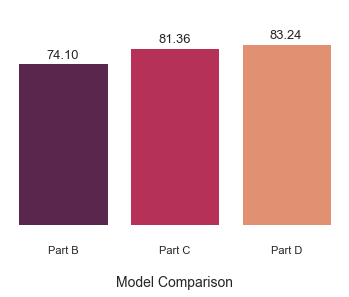

In [45]:
x_axis = ['\nPart B', '\nPart C', '\nPart D']
y_axis = [100*(1-mean_b), 100*(1-mean_c), 100*(1-mean_d)]

plots = sns.barplot(x = x_axis, y = y_axis, palette = "rocket")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha = 'center', va = 'center', size = 13, xytext=(0, 8), textcoords='offset points')
sns.despine(left = True, bottom = True)
sns.set_theme(style = "white")
plt.tick_params(labelleft=False, left=False)
plt.ylim([0, 100])
plt.xlabel("\nModel Comparison", fontsize = 14)
plt.show()

___